# Introduction

The following sections provide analysis and results for different aspects of the data.

### Dataset

In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual file path
file_path = 'IBIS_Sexdiffs_data_5_19_forKevin.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

### Features

In [ ]:
# Extract column names
column_names = df.columns.tolist()

# Convert the dictionary to a DataFrame
column_names_df = pd.DataFrame(column_names, columns=['Column_Name'])

# # Safe column_names as csv file
# csv_filename = "df_column_names.csv"
# column_names_df.to_csv(csv_filename, index=False)

#### Unique features independent of age

In [ ]:
import pandas as pd

# Define DataFrame
df_columns = column_names_df.copy()

# Filter rows with more than one "_" in their values and start with specified prefixes
prefixes = ["V06", "V12", "V24","V24ADOS"]
filtered_rows = df_columns[df_columns['Column_Name'].str.count('_') > 1]
filtered_rows = filtered_rows[filtered_rows['Column_Name'].str.startswith(tuple(prefixes))]

# Split values in each row using the first "_" as separator
split_values = filtered_rows['Column_Name'].str.split('_', n=1, expand=True)

# Rename columns
split_values.columns = ['Age', 'Feature']

# Concatenate the remaining rows with only one "_" in their values
remaining_rows = df_columns[df_columns['Column_Name'].str.count('_').isin([0, 1])]
remaining_rows['Age'] = None
remaining_rows['Feature'] = remaining_rows['Column_Name']

# Concatenate the split values with the remaining rows
features = pd.concat([split_values, remaining_rows[['Age', 'Feature']]])

# Reset index
features.reset_index(drop=True, inplace=True)

features

C:\Users\elena\AppData\Local\Temp\ipykernel_26024\2914414334.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remaining_rows['Age'] = None
C:\Users\elena\AppData\Local\Temp\ipykernel_26024\2914414334.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remaining_rows['Feature'] = remaining_rows['Column_Name']


Age                                       Feature
0     V24                                      Dx_Dummy
1     V06  aosi_q10_coordination_of_eye_gaze_and_action
2     V12  aosi_q10_coordination_of_eye_gaze_and_action
3     V06                           aosi_q11_reactivity
4     V12                           aosi_q11_reactivity
..    ...                                           ...
140  None                            V24ADOSM2Comb_SIJB
141  None                          V24ADOSM2Comb_RepBeh
142  None                         V24ADOSM2Comb_Overact
143  None                          V24ADOSM2Comb_AggBeh
144  None                             V24ADOSM2Comb_Anx

[145 rows x 2 columns]

In [ ]:
unique_features = pd.DataFrame(features["Feature"].unique(), columns=["Unique_Feature"])

# # Safe column_names as csv file
# unique_features.to_csv("df_IBIS_Sexdiffs_data_5_19_forKevin_unique_features.csv", index=False)

unique_features

Unique_Feature
0                                        Dx_Dummy
1    aosi_q10_coordination_of_eye_gaze_and_action
2                             aosi_q11_reactivity
3                        aosi_q14_social_interest
4                            aosi_q15_transitions
..                                            ...
100                            V24ADOSM2Comb_SIJB
101                          V24ADOSM2Comb_RepBeh
102                         V24ADOSM2Comb_Overact
103                          V24ADOSM2Comb_AggBeh
104                             V24ADOSM2Comb_Anx

[105 rows x 1 columns]

#### Age

In [ ]:
unique_age = pd.DataFrame(features["Age"].unique(), columns=["Unique_Age"])
unique_age

Unique_Age
0        V24
1        V06
2        V12
3       None

### EDA

In [ ]:
# import sweetviz as sv

# # EDA report
# EDAreport_df = sv.analyze(df, pairwise_analysis='off')
# EDAreport_df.show_html("EDAreport_df.html")

### Cleaning dataset

#### Removing features with >50% missing values

In [ ]:
import pandas as pd
import numpy as np

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Identify columns with more than 50% missing values to be deleted
columns_to_delete = missing_percentage[missing_percentage > 50].index.tolist()
num_columns_to_delete = missing_percentage[missing_percentage > 50].count()
perc_columns_to_delete = round(100*num_columns_to_delete/len(df.columns), 2)
print(f"Number of columns to delete: {num_columns_to_delete} or {perc_columns_to_delete}%")

# Identify columns with less than or equal to 50% missing values to keep
columns_to_keep = missing_percentage[missing_percentage <= 50].index
num_columns_to_keep = missing_percentage[missing_percentage <= 50].count()
perc_columns_to_keep = round(100*num_columns_to_keep/len(df.columns), 2)
print(f"Number of columns to keep: {num_columns_to_keep} or {perc_columns_to_delete}%")

# Keep only the columns with less than or equal to 50% missing values
df_cleaned = df[columns_to_keep]

Number of columns to delete: 38 or 25.85%
Number of columns to keep: 109 or 25.85%


In [ ]:
# Print the list of deleted features
print("Deleted features:", columns_to_delete)

Deleted features: ['AOSI_VARIABLES', 'MULLEN_SCORES', 'V24_ADOS_VARIABLES', 'V24ADOSM1Comb_ASOEx', 'V24ADOSM1Comb_ASOP', 'V24ADOSM1Comb_QSR', 'V24ADOSM1Comb_Engage', 'V24ADOSM1Comb_QRapp', 'V24ADOSM2Comb_OLSpLa', 'V24ADOSM2Comb_Inton', 'V24ADOSM2Comb_Echo', 'V24ADOSM2Comb_Stereo', 'V24ADOSM2Comb_Convo', 'V24ADOSM2Comb_Point', 'V24ADOSM2Comb_Gest', 'V24ADOSM2Comb_EC', 'V24ADOSM2Comb_Face', 'V24ADOSM2Comb_ShEnj', 'V24ADOSM2Comb_RespName', 'V24ADOSM2Comb_Show', 'V24ADOSM2Comb_SIJA', 'V24ADOSM2Comb_RJA', 'V24ADOSM2Comb_QSO', 'V24ADOSM2Comb_ASOEx', 'V24ADOSM2Comb_ASOP', 'V24ADOSM2Comb_QSR', 'V24ADOSM2Comb_ARSOC', 'V24ADOSM2Comb_QRapp', 'V24ADOSM2Comb_FuncPlay', 'V24ADOSM2Comb_Imagin', 'V24ADOSM2Comb_SensInt', 'V24ADOSM2Comb_HFMann', 'V24ADOSM2Comb_SIJB', 'V24ADOSM2Comb_RepBeh', 'V24ADOSM2Comb_Overact', 'V24ADOSM2Comb_AggBeh', 'V24ADOSM2Comb_Anx', 'ADOS_AOSI_COMPOSITES']


#### Features with <50% missing values


Number of remaining features with <50% missing values: 109 or 25.85%


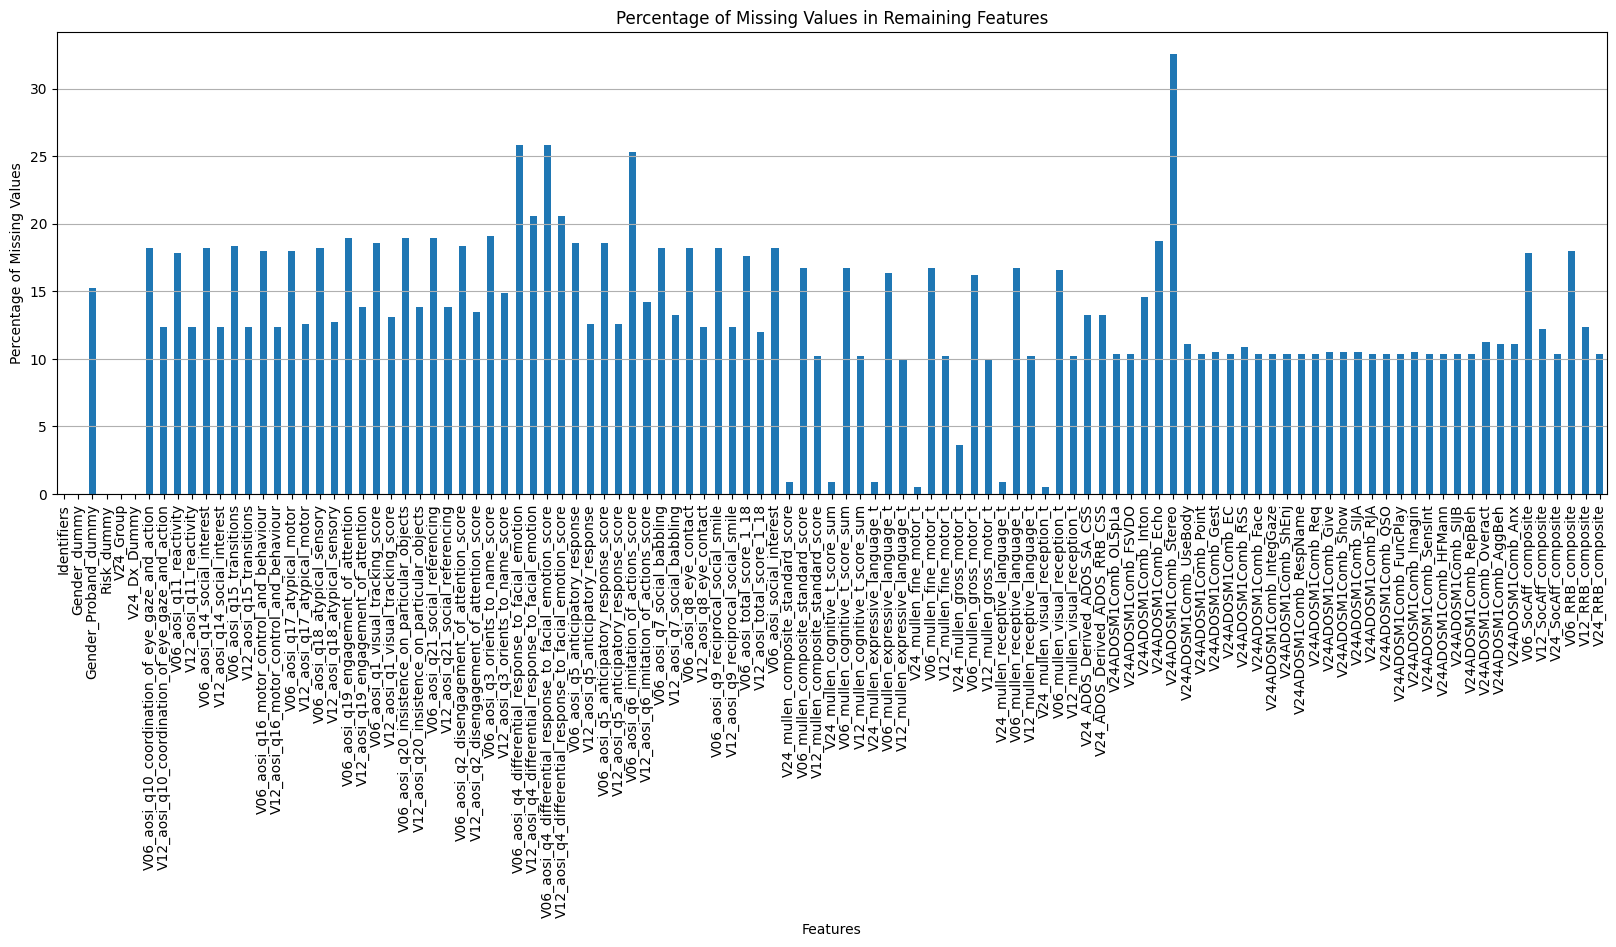

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Print the percentage of missing values for the remaining features
remaining_columns_to_keep = missing_percentage[columns_to_keep]
# print("\nPercentage of missing values for remaining features:")
# print(remaining_columns_to_keep)

print(f"\nNumber of remaining features with <50% missing values: {num_columns_to_keep} or {perc_columns_to_delete}%")


# Plotting
plt.figure(figsize=(20, 6))
remaining_columns_to_keep.plot(kind='bar')
plt.title('Percentage of Missing Values in Remaining Features')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()


##### Features with >15% (and <50%) missing values


Percentage of missing values for features with >=15% missing values:
Gender_Proband_dummy                                         15.272727
V06_aosi_q10_coordination_of_eye_gaze_and_action             18.181818
V06_aosi_q11_reactivity                                      17.818182
V06_aosi_q14_social_interest                                 18.181818
V06_aosi_q15_transitions                                     18.363636
V06_aosi_q16_motor_control_and_behaviour                     18.000000
V06_aosi_q17_atypical_motor                                  18.000000
V06_aosi_q18_atypical_sensory                                18.181818
V06_aosi_q19_engagement_of_attention                         18.909091
V06_aosi_q1_visual_tracking_score                            18.545455
V06_aosi_q20_insistence_on_particular_objects                18.909091
V06_aosi_q21_social_referencing                              18.909091
V06_aosi_q2_disengagement_of_attention_score                 18.363636
V06_aos

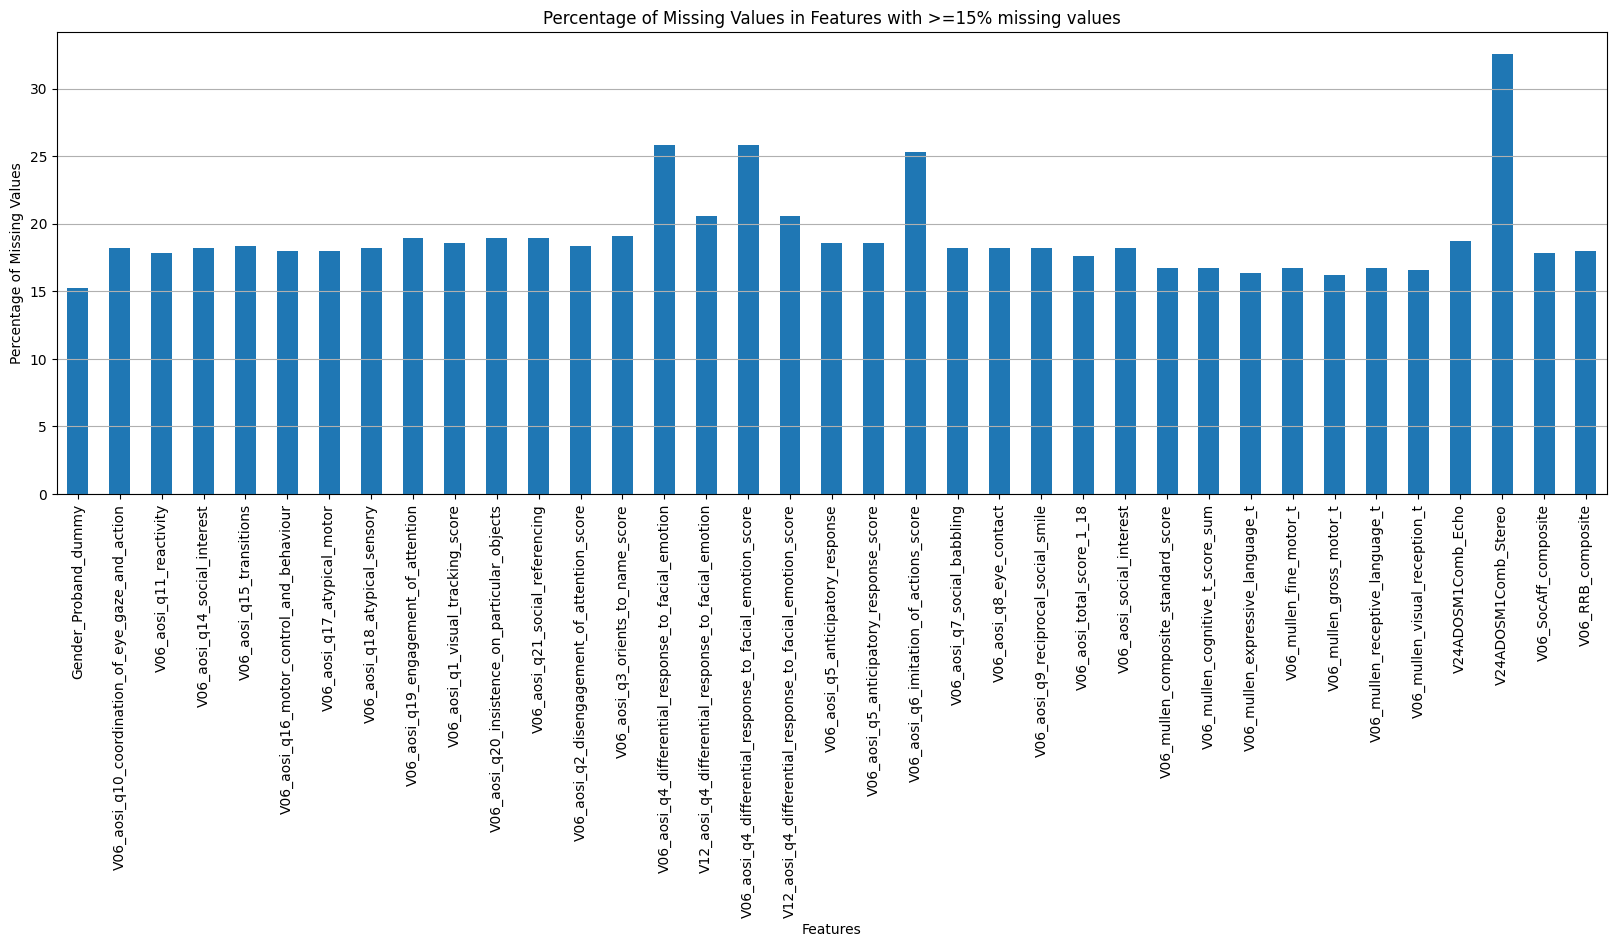

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Filter the remaining columns to those with more than 15% missing values for the graph
columns_in_range_more_15 = missing_percentage[(missing_percentage >= 15) & (missing_percentage <= 50)]

# Print the percentage of missing values for features within the specified range
print("\nPercentage of missing values for features with >=15% missing values:")
print(columns_in_range_more_15)

num_columns_in_range_more_15 = columns_in_range_more_15.count()
perc_columns_in_range_more_15 = round(100*num_columns_in_range_more_15/num_columns_to_keep, 2)
print(f"\nNumber of features with >15% missing values: {num_columns_in_range_more_15} or {perc_columns_in_range_more_15}%")

# Plotting only the features with more than 10% missing values
plt.figure(figsize=(20, 6))
columns_in_range_more_15.plot(kind='bar')
plt.title('Percentage of Missing Values in Features with >=15% missing values')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()


##### Features with 10% to 15% (and <50%) missing values


Percentage of missing values for features with 10% to 15%:
V12_aosi_q10_coordination_of_eye_gaze_and_action    12.363636
V12_aosi_q11_reactivity                             12.363636
V12_aosi_q14_social_interest                        12.363636
V12_aosi_q15_transitions                            12.363636
V12_aosi_q16_motor_control_and_behaviour            12.363636
V12_aosi_q17_atypical_motor                         12.545455
V12_aosi_q18_atypical_sensory                       12.727273
V12_aosi_q19_engagement_of_attention                13.818182
V12_aosi_q1_visual_tracking_score                   13.090909
V12_aosi_q20_insistence_on_particular_objects       13.818182
V12_aosi_q21_social_referencing                     13.818182
V12_aosi_q2_disengagement_of_attention_score        13.454545
V12_aosi_q3_orients_to_name_score                   14.909091
V12_aosi_q5_anticipatory_response                   12.545455
V12_aosi_q5_anticipatory_response_score             12.545455
V12_aosi_q

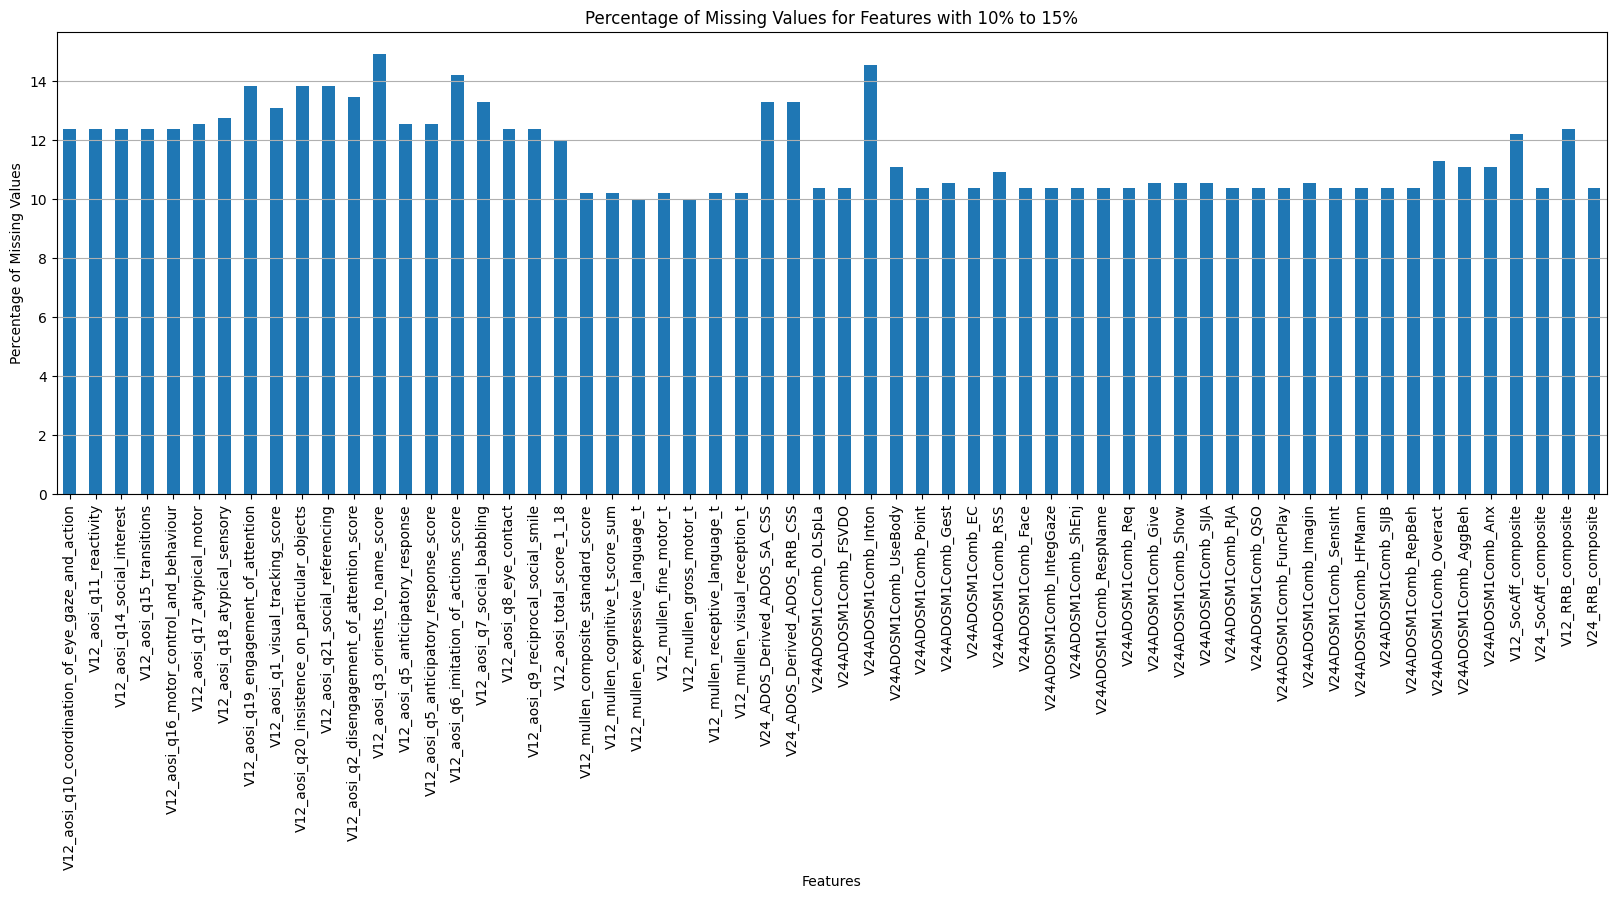

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter to find columns with missing values between 10% and 15%
columns_in_range_10_15 = missing_percentage[(missing_percentage >= 10) & (missing_percentage < 15)]

# Print the percentage of missing values for features within the specified range
print("\nPercentage of missing values for features with 10% to 15%:")
print(columns_in_range_10_15)

num_columns_in_range_10_15 = columns_in_range_10_15.count()
perc_columns_in_range_10_15 = round(100*num_columns_in_range_10_15/num_columns_to_keep, 2)
print(f"\nNumber of features with 10% to 15%: {num_columns_in_range_10_15} or {perc_columns_in_range_10_15}%")

# Plotting only the features with missing values between 10% and 15%
plt.figure(figsize=(20, 6))
columns_in_range_10_15.plot(kind='bar')
plt.title('Percentage of Missing Values for Features with 10% to 15%')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

##### Features with <10% (and <50%) missing values


Percentage of missing values for features with <10% missing values:
Identifiers                            0.000000
Gender_dummy                           0.000000
Risk_dummy                             0.000000
V24_Group                              0.000000
V24_Dx_Dummy                           0.000000
V24_mullen_composite_standard_score    0.909091
V24_mullen_cognitive_t_score_sum       0.909091
V24_mullen_expressive_language_t       0.909091
V24_mullen_fine_motor_t                0.545455
V24_mullen_gross_motor_t               3.636364
V24_mullen_receptive_language_t        0.909091
V24_mullen_visual_reception_t          0.545455
dtype: float64

Number of features with <10% missing values: 12 or 11.01%


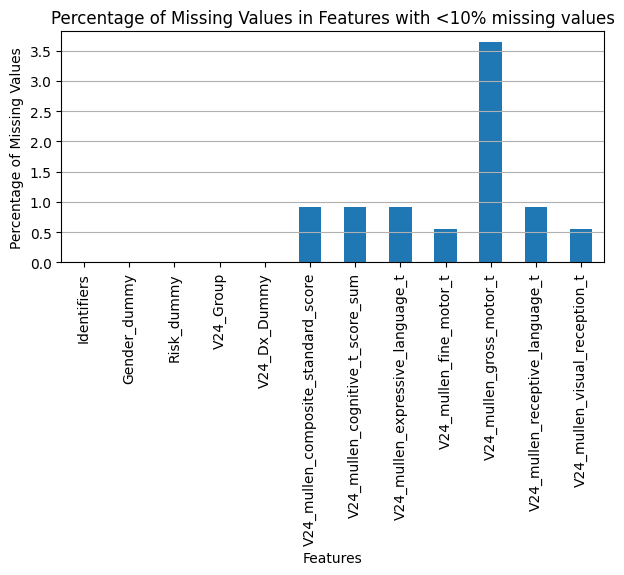

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter the remaining columns to those with more than 15% missing values for the graph
columns_in_range_less_10 = missing_percentage[(missing_percentage < 10) & (missing_percentage <= 50)]

# Print the percentage of missing values for features within the specified range
print("\nPercentage of missing values for features with <10% missing values:")
print(columns_in_range_less_10)

num_columns_in_range_less_10 = columns_in_range_less_10.count()
perc_columns_in_range_less_10 = round(100*num_columns_in_range_less_10/num_columns_to_keep, 2)
print(f"\nNumber of features with <10% missing values: {num_columns_in_range_less_10} or {perc_columns_in_range_less_10}%")

# Plotting only the features with less than 10% missing values
plt.figure(figsize=(7, 3))
columns_in_range_less_10.plot(kind='bar')
plt.title('Percentage of Missing Values in Features with <10% missing values')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()


##### Features with missing values - Summary

In [ ]:
# Creating a DataFrame with column names and corresponding counts/percentages
miss_df = pd.DataFrame()
miss_df["columns"] = ["columns with >50% missing values (to delete)", "columns with <50% missing values (to keep)",
                      "columns with >15% (and <50%) missing values", "columns with 10% to 15% missing values", "columns with <10% missing values"]
miss_df["number of columns"] = [num_columns_to_delete, num_columns_to_keep,
                                num_columns_in_range_more_15, num_columns_in_range_10_15, num_columns_in_range_less_10]
miss_df["percent"] = [perc_columns_to_delete, perc_columns_to_keep,
                      perc_columns_in_range_more_15, perc_columns_in_range_10_15, perc_columns_in_range_less_10]

miss_df

columns  number of columns  percent
0  columns with >50% missing values (to delete)                 38    25.85
1    columns with <50% missing values (to keep)                109    74.15
2   columns with >15% (and <50%) missing values                 37    33.94
3        columns with 10% to 15% missing values                 60    55.05
4              columns with <10% missing values                 12    11.01

##### Alignment of features with missing values

In [ ]:
import pandas as pd
import numpy as np

miss_list = [(columns_in_range_more_15, 'columns_in_range_more_15'),
             (columns_in_range_10_15, 'columns_in_range_10_15'),
             (columns_in_range_less_10, 'columns_in_range_less_10')]

for series, custom_name in miss_list:
    # Check if missing values in these columns are in the same rows
    missing_comparison = df[series.index.tolist()].isna()

    # To exclusively check for alignment in NaNs, and not just full non-NaN rows:
    rows_with_nan_aligned = missing_comparison.any(axis=1) & missing_comparison.all(axis=1)

    print(f"\nNumber of rows where NaNs align across {custom_name}: {rows_with_nan_aligned.sum()}")
    print(f"Rows where NaNs align across {custom_name}: {rows_with_nan_aligned[rows_with_nan_aligned].index.tolist()}")
    # df[rows_with_nan_aligned]
    print("\n----------------------------------")


Number of rows where NaNs align across columns_in_range_more_15: 1
Rows where NaNs align across columns_in_range_more_15: [90]

----------------------------------

Number of rows where NaNs align across columns_in_range_10_15: 1
Rows where NaNs align across columns_in_range_10_15: [548]

----------------------------------

Number of rows where NaNs align across columns_in_range_less_10: 0
Rows where NaNs align across columns_in_range_less_10: []

----------------------------------


#### Datasets with limited missing values

##### Dataset with <50% missing values

In [ ]:
import pandas as pd

# Filter the remaining columns to those with more than 50% missing values for the graph
column_names_less_50 = columns_to_keep = missing_percentage[missing_percentage < 50].index
# column_names_less_50

# Create a new DataFrame containing only the columns in "column_names_less_50"
DF_less_50 = df[column_names_less_50]

# Save the new DataFrame to a CSV file named "DF_less_50.csv" in the same folder
DF_less_50.to_csv("DF_less_50.csv", index=False)

DF_less_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Columns: 109 entries, Identifiers to V24_RRB_composite
dtypes: float64(108), object(1)
memory usage: 468.5+ KB


##### Dataset with <15% (and <50%) missing values

In [ ]:
import pandas as pd

# Filter the remaining columns to those with more than 15% missing values for the graph
column_names_less_15 = columns_to_keep = missing_percentage[missing_percentage < 15].index
# column_names_less_15

# Create a new DataFrame containing only the columns in "column_names_less_15"
DF_less_15 = df[column_names_less_15]

# Save the new DataFrame to a CSV file named "DF_less_15.csv" in the same folder
DF_less_15.to_csv("DF_less_15.csv", index=False)

DF_less_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 72 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Identifiers                                       550 non-null    object 
 1   Gender_dummy                                      550 non-null    float64
 2   Risk_dummy                                        550 non-null    float64
 3   V24_Group                                         550 non-null    float64
 4   V24_Dx_Dummy                                      550 non-null    float64
 5   V12_aosi_q10_coordination_of_eye_gaze_and_action  482 non-null    float64
 6   V12_aosi_q11_reactivity                           482 non-null    float64
 7   V12_aosi_q14_social_interest                      482 non-null    float64
 8   V12_aosi_q15_transitions                          482 non-null    float64
 9   V12_aosi_q16_motor_co

##### Dataset with <10% (and <50%) missing values

In [ ]:
import pandas as pd

# Filter the remaining columns to those with more than 10% missing values for the graph
column_names_less_10 = columns_to_keep = missing_percentage[missing_percentage < 10].index
# column_names_less_10

# Create a new DataFrame containing only the columns in "column_names_less_10"
DF_less_10 = df[column_names_less_10]

# Save the new DataFrame to a CSV file named "DF_less_10.csv" in the same folder
DF_less_10.to_csv("DF_less_10.csv", index=False)

DF_less_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Identifiers                          550 non-null    object 
 1   Gender_dummy                         550 non-null    float64
 2   Risk_dummy                           550 non-null    float64
 3   V24_Group                            550 non-null    float64
 4   V24_Dx_Dummy                         550 non-null    float64
 5   V24_mullen_composite_standard_score  545 non-null    float64
 6   V24_mullen_cognitive_t_score_sum     545 non-null    float64
 7   V24_mullen_expressive_language_t     545 non-null    float64
 8   V24_mullen_fine_motor_t              547 non-null    float64
 9   V24_mullen_gross_motor_t             530 non-null    float64
 10  V24_mullen_receptive_language_t      545 non-null    float64
 11  V24_mullen_visual_reception_t   

# Modeling datasets with <10% missing values

### Read dataset

In [ ]:
import pandas as pd

# Replace 'file_path.csv' with the actual file path of your CSV file
file_path_10 = 'DF_less_10.csv'

# Read the CSV file into a DataFrame
df_less_10 = pd.read_csv(file_path_10)

In [ ]:
print("Columns in DF with <10% missing values: ", df_less_10.columns)
print(" ")

Columns in DF with <10% missing values:  Index(['Identifiers', 'Gender_dummy', 'Risk_dummy', 'V24_Group',
       'V24_Dx_Dummy', 'V24_mullen_composite_standard_score',
       'V24_mullen_cognitive_t_score_sum', 'V24_mullen_expressive_language_t',
       'V24_mullen_fine_motor_t', 'V24_mullen_gross_motor_t',
       'V24_mullen_receptive_language_t', 'V24_mullen_visual_reception_t'],
      dtype='object')
 


In [ ]:
# Drop column "Identifiers"
df_less_10 = df_less_10.drop(columns=["Identifiers"], axis='columns')

### Create EDA reports

In [ ]:
import sweetviz as sv

# EDA report (<10%)
EDAreport_df_less_10 = sv.analyze(df_less_10, pairwise_analysis='on')
EDAreport_df_less_10.show_html("EDAreport_df_less_10.html")

                                             |          | [  0%]   00:00 -> (? left)

Report EDAreport_df_less_10.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Correlation Matrix

In [ ]:
# Correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, df_name, target_correlation_value, target_feature):
    # Calculate correlation matrix
    correlation_matrix = df.corr()

    # Features with correlation greater than the target_correlation_value with the target feature
    target_correlation = correlation_matrix[target_feature]
    relevant_features = target_correlation[abs(target_correlation) > target_correlation_value].index.tolist()

    # Printing relevant features
    print(f"Dataset: {df_name}, \nFeatures with >{target_correlation_value} correlation with the target feature:")
    print(relevant_features)

    # Plotting correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()


Dataset: with <10% missing values, 
Features with >0.25 correlation with the target feature:
['Risk_dummy', 'V24_Group', 'V24_Dx_Dummy', 'V24_mullen_composite_standard_score', 'V24_mullen_cognitive_t_score_sum', 'V24_mullen_expressive_language_t', 'V24_mullen_fine_motor_t', 'V24_mullen_gross_motor_t', 'V24_mullen_receptive_language_t', 'V24_mullen_visual_reception_t']


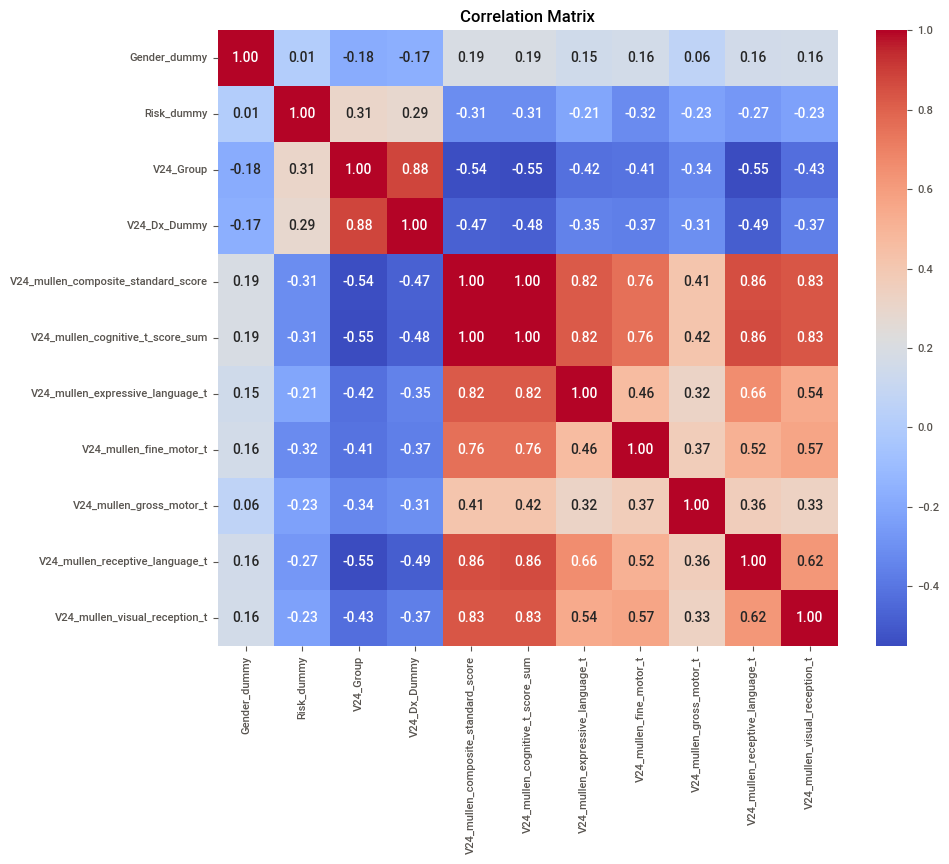

In [ ]:
# Correlation matrix of different datasets
plot_correlation_matrix(df_less_10, "with <10% missing values", 0.25, 'V24_Dx_Dummy')

### Split dataset

In [ ]:
from sklearn.model_selection import train_test_split

def split_dataframe(df):
    # Target Feature
    y = df['V24_Dx_Dummy']
    print("y_shape: ", y.shape)
    print(" ")

    # Feature columns
    X = df.drop(columns=['V24_Dx_Dummy'], axis='columns')
    print("X_shape: ", X.shape)
    print(" ")

    # Train and Test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [ ]:
# Split datasets
X_10_train, X_10_test, y_10_train, y_10_test = split_dataframe(df_less_10)

y_shape:  (550,)
 
X_shape:  (550, 10)
 


### Handling missing values

#### Imputing missing values


1. **KNNImputer**:
    - **Principle**: KNNImputer imputes missing values using the k-Nearest Neighbors approach. For each sample with missing values, it computes the mean value from its nearest neighbors in the training set.
    - **Pros**:
        - Utilizes local context by considering similar samples.
        - Works well for continuous and categorical features.
    - **Cons**:
        - Computationally expensive for large datasets.
        - Sensitive to the choice of `k`.

2. **Regression-Based Imputation - IterativeImputer**:
    - **Principle**: IterativeImputer models each feature with missing values as a function of other features. It alternates between imputing one feature at a time using regression models.
    - **Pros**:
        - Considers interactions between features.
        - Handles both numeric and categorical data.
    - **Cons**:
        - Convergence may not be guaranteed.
        - Requires specifying an estimator (e.g., BayesianRidge or other regressors).

3. **SVD - SoftImputer**:
    - **Principle**: SoftImputer uses nuclear-norm regularization to estimate missing values. It iteratively imputes using soft-thresholded singular value decomposition (SVD).
    - **Pros**:
        - Handles large matrices efficiently.
        - Considers global structure.
    - **Cons**:
        - Experimental and may change.
        - Theoretical convergence guarantees are limited.




Sources:

(1) sklearn.impute.SimpleImputer — scikit-learn 1.4.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html.

(2) sklearn.impute.KNNImputer — scikit-learn 1.4.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html.

(3) sklearn.impute.IterativeImputer — scikit-learn 1.4.1 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html.

(4) Iterative Imputation for Missing Values in Machine Learning. https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/.

(5) 6.4. Imputation of missing values — scikit-learn 1.4.1 documentation. https://scikit-learn.org/stable/modules/impute.html.

(6) Hot-deck imputation | R - DataCamp. https://campus.datacamp.com/courses/handling-missing-data-with-imputations-in-r/donor-based-imputation?ex=5.

(7) softImpute : impute missing values for a matrix via nuclear-norm.... https://rdrr.io/cran/softImpute/man/softImpute.html.

(8) softImpute: Matrix Completion via Iterative Soft-Thresholded SVD. https://cran.r-project.org/web//packages/softImpute/softImpute.pdf.

(9) (PDF) Hot Deck Methods for Imputing Missing Data - ResearchGate. https://www.researchgate.net/publication/265507954_Hot_Deck_Methods_for_Imputing_Missing_Data.

(10) A Review of Hot Deck Imputation for Survey Non-response. https://onlinelibrary.wiley.com/doi/full/10.1111/j.1751-5823.2010.00103.x.

(11) A Review of Hot Deck Imputation for Survey Non-response. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3130338/.

(12) Imputing Missing Values With the New KNNImputer and IterativeImputer .... https://medium.com/@blant.jesse/imputing-missing-values-with-the-new-knnimputer-and-iterativeimputer-methods-110270738c4.

(13) Python | Imputation using the KNNimputer() - GeeksforGeeks. https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/.

(14) KNNImputer - sklearn. https://sklearn.vercel.app/docs/classes/KNNImputer.

(15) KNNImputer | Way To Impute Missing Values - Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/.

(16) softImpute: Matrix Completion via Iterative Soft-Thresholded SVD. https://rdrr.io/cran/softImpute/.

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from fancyimpute import SoftImpute  # For SVD imputation

# Datasets with missing values and their original names
train_data_dict = {'X_10_train': X_10_train}
test_data_dict = {'X_10_test': X_10_test}

# Imputation techniques
imput_list = [
    ('KNN2', KNNImputer(n_neighbors=2)),
    ('KNN5', KNNImputer(n_neighbors=5)),
    ('KNN10', KNNImputer(n_neighbors=10)),
    ('Regression-Based Imputation', IterativeImputer(max_iter=15, random_state=42)),
    ('SVD', SoftImpute())  # SVD imputation
]

# Dictionary to store imputed datasets
imputed_train_datasets = {}
imputed_test_datasets = {}

# List to store new dataset names
new_train_dataset_names = []
new_test_dataset_names = []

# Apply imputation techniques to the train and test datasets simultaneously
for (train_name, train_data), (test_name, test_data) in zip(train_data_dict.items(), test_data_dict.items()):
    for imput_name, imputer in imput_list:
        # Impute train data
        if imput_name in ['SVD']:
            imputed_train_data = imputer.fit_transform(train_data.values)
        else:
            imputed_train_data = imputer.fit_transform(train_data)

        # Convert numpy array back to DataFrame
        imputed_train_df = pd.DataFrame(imputed_train_data, columns=train_data.columns)

        # Store the imputed DataFrame in the dictionary
        imputed_train_datasets[(train_name, imput_name)] = imputed_train_df

        # Save the imputed DataFrame to CSV
        new_train_dataset_name = f"imputed_{train_name}_{imput_name}.csv"
        imputed_train_df.to_csv(new_train_dataset_name, index=False)
        new_train_dataset_names.append(new_train_dataset_name)

        # Impute test data
        if imput_name in ['SVD']:
            imputed_test_data = imputer.fit_transform(test_data.values)
        else:
            imputed_test_data = imputer.transform(test_data)

        # Convert numpy array back to DataFrame
        imputed_test_df = pd.DataFrame(imputed_test_data, columns=test_data.columns)

        # Store the imputed DataFrame in the dictionary
        imputed_test_datasets[(test_name, imput_name)] = imputed_test_df

        # Save the imputed DataFrame to CSV
        new_test_dataset_name = f"imputed_{test_name}_{imput_name}.csv"
        imputed_test_df.to_csv(new_test_dataset_name, index=False)
        new_test_dataset_names.append(new_test_dataset_name)


# Print list of all new TRAIN dataset names
print("\nList of all new TRAIN dataset names:")
for name in new_train_dataset_names:
    print(name)

# Print list of all new TEST dataset names
print("\nList of all new TEST dataset names:")
for name in new_test_dataset_names:
    print(name)


[SoftImpute] Max Singular Value of X_init = 5397.240875
[SoftImpute] Iter 1: observed MAE=2.575940 rank=5
[SoftImpute] Iter 2: observed MAE=2.600046 rank=5
[SoftImpute] Iter 3: observed MAE=2.620195 rank=5
[SoftImpute] Iter 4: observed MAE=2.629474 rank=5
[SoftImpute] Iter 5: observed MAE=2.633222 rank=5
[SoftImpute] Iter 6: observed MAE=2.635146 rank=5
[SoftImpute] Iter 7: observed MAE=2.636410 rank=5
[SoftImpute] Iter 8: observed MAE=2.637388 rank=5
[SoftImpute] Iter 9: observed MAE=2.638186 rank=5
[SoftImpute] Iter 10: observed MAE=2.638846 rank=5
[SoftImpute] Iter 11: observed MAE=2.639386 rank=5
[SoftImpute] Iter 12: observed MAE=2.639823 rank=5
[SoftImpute] Iter 13: observed MAE=2.640167 rank=5
[SoftImpute] Iter 14: observed MAE=2.640437 rank=5
[SoftImpute] Iter 15: observed MAE=2.640645 rank=5
[SoftImpute] Iter 16: observed MAE=2.640801 rank=5
[SoftImpute] Iter 17: observed MAE=2.640913 rank=5
[SoftImpute] Iter 18: observed MAE=2.640992 rank=5
[SoftImpute] Iter 19: observed MAE=

In [ ]:
import pandas as pd

# List of imputed dataset names
imput_train_dataset_names = [
                            "imputed_X_10_train_KNN2.csv",
                            "imputed_X_10_train_KNN5.csv",
                            "imputed_X_10_train_KNN10.csv",
                            "imputed_X_10_train_Regression-Based Imputation.csv",
                            "imputed_X_10_train_SVD.csv",
]

imput_test_dataset_names = [
                            "imputed_X_10_test_KNN2.csv",
                            "imputed_X_10_test_KNN5.csv",
                            "imputed_X_10_test_KNN10.csv",
                            "imputed_X_10_test_Regression-Based Imputation.csv",
                            "imputed_X_10_test_SVD.csv",
]


# Dictionary to store DataFrames
imputed_train_datasets = {}
imputed_test_datasets = {}

# Read all files and store DataFrames in the dictionary
for filename in imput_train_dataset_names:
    df_name = filename.split('.')[0]  # Extract DataFrame name from filename
    df = pd.read_csv(filename)
    imputed_train_datasets[df_name] = df

# Read all files and store DataFrames in the dictionary
for filename in imput_test_dataset_names:
    df_name = filename.split('.')[0]  # Extract DataFrame name from filename
    df = pd.read_csv(filename)
    imputed_test_datasets[df_name] = df


In [ ]:
# Accessing the TRAIN DataFrames
imp_X_10_train_KNN2 = imputed_train_datasets["imputed_X_10_train_KNN2"]
imp_X_10_train_KNN5 = imputed_train_datasets["imputed_X_10_train_KNN5"]
imp_X_10_train_KNN10 = imputed_train_datasets["imputed_X_10_train_KNN10"]
imp_X_10_train_RegressionBasedImputation = imputed_train_datasets["imputed_X_10_train_Regression-Based Imputation"]
imp_X_10_train_SVD = imputed_train_datasets["imputed_X_10_train_SVD"]

# Accessing the TEST DataFrames
imp_X_10_test_KNN2 = imputed_test_datasets["imputed_X_10_test_KNN2"]
imp_X_10_test_KNN5 = imputed_test_datasets["imputed_X_10_test_KNN5"]
imp_X_10_test_KNN10 = imputed_test_datasets["imputed_X_10_test_KNN10"]
imp_X_10_test_RegressionBasedImputation = imputed_test_datasets["imputed_X_10_test_Regression-Based Imputation"]
imp_X_10_test_SVD = imputed_test_datasets["imputed_X_10_test_SVD"]

In [ ]:
# Datasets list
X_train_list = [
                imp_X_10_train_KNN2, imp_X_10_train_KNN5, imp_X_10_train_KNN10,
                imp_X_10_train_RegressionBasedImputation, imp_X_10_train_SVD,
                ]

y_train_list = [
                y_10_train, y_10_train, y_10_train,
                y_10_train, y_10_train,
                ]

X_test_list = [
                imp_X_10_test_KNN2, imp_X_10_test_KNN5, imp_X_10_test_KNN10,
                imp_X_10_test_RegressionBasedImputation, imp_X_10_test_SVD,
                ]

y_test_list = [
                y_10_test, y_10_test, y_10_test,
                y_10_test, y_10_test,
                ]


### Balancing dataset

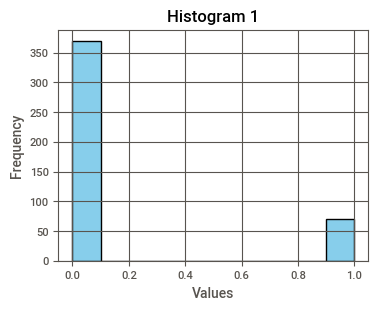

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example list of dataframes
list_of_dfs = [y_10_train]

# Plotting histograms for each dataframe in the list
for i, df in enumerate(list_of_dfs):
    plt.figure(figsize=(4, 3))
    plt.hist(df, bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram {i+1}')
    plt.grid(True)
    plt.show()


#### Synthehtic data generation to overcome imbalanced target feature

SMOTE:
Synthetic Minority Over-sampling Technique for Nominal and Continuous - for datasets with numerical and categorical features.

In [ ]:
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

def oversampling(algorithm, X_train, X_test, y_train, y_test):
    # Apply oversample algorithm to the training data
    oversample = algorithm(random_state=42)
    X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)
    X_train_oversampled_shape = X_train_oversampled.shape
    y_train_oversampled_shape = y_train_oversampled.shape

    # # Create and display a bar plot for class distribution
    # y_train_oversample.value_counts(normalize=True).plot.bar(title='Class Distribution After oversampling')
    # plt.show()

    # Dummy Classifier on dataset
    dummy_classifier = DummyClassifier()
    dummy_classifier.fit(X_train_oversampled, y_train_oversampled)
    y_pred_Dummy_oversample = dummy_classifier.predict(X_test)

    # Calculate and print the accuracy score
    score_Dummy_oversample = dummy_classifier.score(X_test, y_test)

    print(f"{name}_{algorithm.__name__}")
    print("X_train oversampled shape", X_train_oversampled_shape)
    print("y_train oversampled shape", y_train_oversampled_shape)
    print("DummyClassifier score: ", score_Dummy_oversample)
    print(" ")

    # return X_train_oversampled_shape, y_train_oversampled_shape, y_pred_Dummy_oversample, score_Dummy_oversample, X_train_oversampled, y_train_oversampled
    return X_train_oversampled, y_train_oversampled, X_train_oversampled.shape, y_train_oversampled.shape


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN


# List of oversampling algorithms to test
oversampling_algorithms = [SMOTE]

# Dictionary of train/test datasets
datasets = {
    "data_10_KNN2": {'X_train': imp_X_10_train_KNN2, 'y_train': y_10_train, 'X_test': imp_X_10_test_KNN2, 'y_test': y_10_test},
    "data_10_KNN5": {'X_train': imp_X_10_train_KNN5, 'y_train': y_10_train, 'X_test': imp_X_10_test_KNN5, 'y_test': y_10_test},
    "data_10_KNN10": {'X_train': imp_X_10_train_KNN10, 'y_train': y_10_train, 'X_test': imp_X_10_test_KNN10, 'y_test': y_10_test},
    "data_10_RegressionBasedImputation": {'X_train': imp_X_10_train_RegressionBasedImputation, 'y_train': y_10_train, 'X_test': imp_X_10_test_RegressionBasedImputation, 'y_test': y_10_test},
    "data_10_SVD": {'X_train': imp_X_10_train_SVD, 'y_train': y_10_train, 'X_test': imp_X_10_test_SVD, 'y_test': y_10_test},
}

# Create a dictionary to store the oversampled datasets
oversampled_datasets = {}

# Run oversampling for each algorithm and dataset
for algorithm in oversampling_algorithms:
    print(f"Running Oversampling for Algorithm: {algorithm.__name__}")
    for name, data in datasets.items():
        X_train_oversampled, y_train_oversampled, _, _ = oversampling(algorithm, data['X_train'], data['X_test'], data['y_train'], data['y_test'])
        dataset_name = f"{name}_{algorithm.__name__}_oversampled"
        oversampled_datasets[dataset_name] = (X_train_oversampled, y_train_oversampled)



Running Oversampling for Algorithm: SMOTE
data_10_KNN2_SMOTE
X_train oversampled shape (740, 10)
y_train oversampled shape (740,)
DummyClassifier score:  0.8363636363636363
 
data_10_KNN5_SMOTE
X_train oversampled shape (740, 10)
y_train oversampled shape (740,)
DummyClassifier score:  0.8363636363636363
 
data_10_KNN10_SMOTE
X_train oversampled shape (740, 10)
y_train oversampled shape (740,)
DummyClassifier score:  0.8363636363636363
 
data_10_RegressionBasedImputation_SMOTE
X_train oversampled shape (740, 10)
y_train oversampled shape (740,)
DummyClassifier score:  0.8363636363636363
 
data_10_SVD_SMOTE
X_train oversampled shape (740, 10)
y_train oversampled shape (740,)
DummyClassifier score:  0.8363636363636363
 


## Modeling

### Training datasets

In [ ]:
# Recall all oversampled datasets
X_train_list = []
y_train_list = []

for name, data in datasets.items():
    for algorithm in oversampling_algorithms:
        dataset_name = f"{name}_{algorithm.__name__}_oversampled"
        X_train, y_train = oversampled_datasets[dataset_name]
        X_train_list.append(X_train)
        y_train_list.append(y_train)



### Test datasets

In [ ]:
# Test datasets lists
X_test_list = [imp_X_10_test_KNN2, imp_X_10_test_KNN5, imp_X_10_test_KNN10,
               imp_X_10_test_RegressionBasedImputation, imp_X_10_test_SVD,
                ]


y_test_list = [ y_10_test, y_10_test, y_10_test, y_10_test, y_10_test, y_10_test,
                y_10_test, y_10_test, y_10_test, y_10_test,
                ]

In [ ]:
import numpy as np

# Convert datasets into arrays
def array_process_datasets(dataset_list):
    X_train_list = []
    y_train_list = []
    X_test_list = []
    y_test_list = []

    for dataset in dataset_list:
        # Convert to NumPy arrays if they are not already
        X_train = np.array(dataset['X_train'])
        y_train = np.array(dataset['y_train'])
        X_test = np.array(dataset['X_test'])
        y_test = np.array(dataset['y_test'])

        X_train_list.append(X_train)
        y_train_list.append(y_train)
        X_test_list.append(X_test)
        y_test_list.append(y_test)

    return X_train_list, y_train_list, X_test_list, y_test_list

In [ ]:
# Array datasts:
array_dataset_list = [
    {'X_train': X_train_list[0], 'y_train': y_train_list[0], 'X_test': imp_X_10_test_KNN2, 'y_test': y_10_test},
    {'X_train': X_train_list[1], 'y_train': y_train_list[1], 'X_test': imp_X_10_test_KNN5, 'y_test': y_10_test},
    {'X_train': X_train_list[2], 'y_train': y_train_list[2], 'X_test': imp_X_10_test_KNN10, 'y_test': y_10_test},
    {'X_train': X_train_list[3], 'y_train': y_train_list[3], 'X_test': imp_X_10_test_RegressionBasedImputation, 'y_test': y_10_test},
    {'X_train': X_train_list[4], 'y_train': y_train_list[4], 'X_test': imp_X_10_test_SVD, 'y_test': y_10_test},
]

X_train_list, y_train_list, X_test_list, y_test_list = array_process_datasets(array_dataset_list)


In [ ]:
# Datasets Name lists

modeling_data_list = [
                        "10_KNN2_SMOTE",
                        "10_KNN5_SMOTE",
                        "10_KNN10_SMOTE",
                        "10_RegressionBasedImputation_SMOTE",
                        "10_SVD_SMOTE",
]


### Dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

def Dummy_model(modeling_data, X_train, y_train, X_test, y_test):
    dummy = DummyClassifier(strategy= "most_frequent", random_state = 0)
    score_Dummy = []
    for i in range(0,len(X_train)):
        dummy = dummy.fit(X_train[i], y_train[i])
        score_dummy = dummy.score(X_train[i], y_train[i])
        score_Dummy.append(score_dummy)
        y_pred_Dummy = dummy.predict(X_test[i])
    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Dummy score'] = score_Dummy
    return Summary

In [ ]:
Dummy_summary = Dummy_model(modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Dummy_summary

dataset  Dummy score
0                       10_KNN2_SMOTE          0.5
1                       10_KNN5_SMOTE          0.5
2                      10_KNN10_SMOTE          0.5
3  10_RegressionBasedImputation_SMOTE          0.5
4                        10_SVD_SMOTE          0.5

### KNN classifier

Max KNN scores is 0.8545454545454545 for k_neighbors: 294



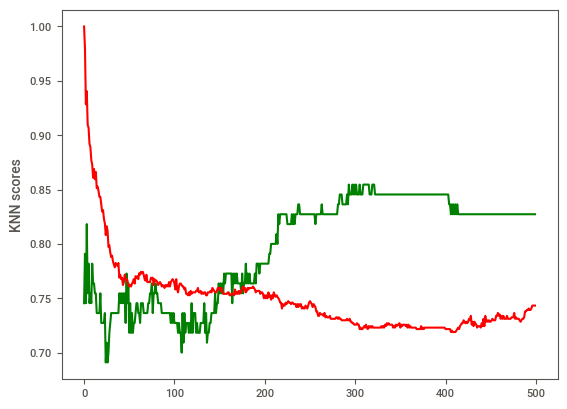

In [ ]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Train the model for various depths - FOR loop
score_KNN_le = []
score_KNN_train_le = []
for k in range(1,501):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn_model.fit(X_train_list[4], y_train_list[4])
    y_pred_KNN_ = knn_model.predict(imp_X_10_test_SVD)
    #Evaluate the model (Accuracy)
    score_knn = metrics.accuracy_score(y_10_test, y_pred_KNN_)
    score_KNN_le.append(score_knn)
    #Check accuracy on train data (NOT VALID!)
    score_knn_train = metrics.accuracy_score(y_train_list[4], knn_model.predict(X_train_list[4]))
    score_KNN_train_le.append(score_knn_train)
    KNN_dict = {k+1:v for k,v in enumerate(score_KNN_le)}
    opt_n_neighbors = max(KNN_dict, key=KNN_dict.get)

print(f"Max KNN scores is {max(score_KNN_le)} for k_neighbors: {opt_n_neighbors}")
print()

plt.plot(score_KNN_le, color="g", label='Acc. on test')
plt.plot(score_KNN_train_le, color="r", label='Acc. on train')
plt.ylabel('KNN scores');

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def KNN_model(dataset_list, N_neighbors, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=N_neighbors)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []

    plt.figure(figsize=(15, 10))

    for i in range(0, len(X_train)):
        # Fit model
        KNN = knn.fit(X_train[i], y_train[i])
        y_pred = KNN.predict(X_test[i])
        y_prob = KNN.predict_proba(X_test[i])[:, 1]  # Get probability scores for the positive class

        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], KNN.predict(np.ascontiguousarray(X_train[i])))

        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')

        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)

        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(KNN, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    Summary = pd.DataFrame()
    Summary['dataset'] = dataset_list
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc

    return Summary, knn


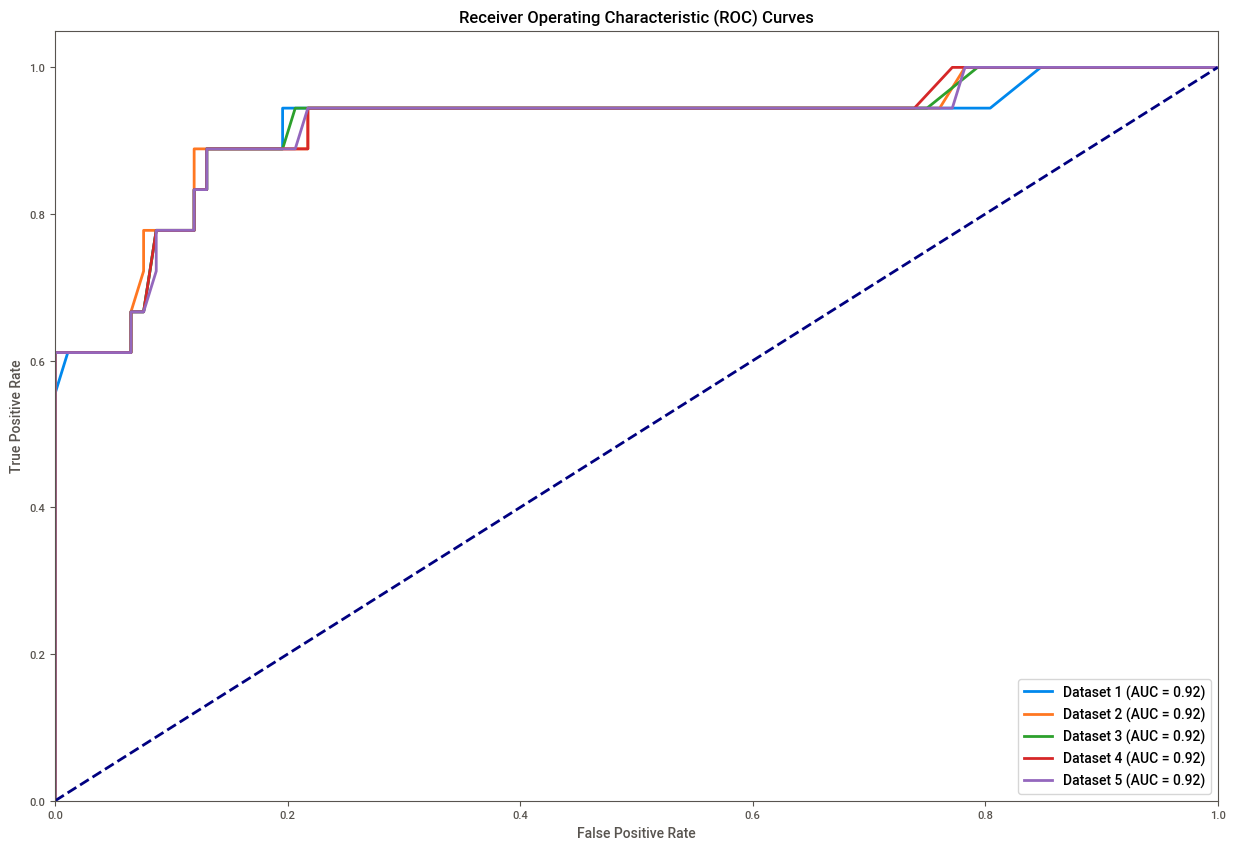

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.818182           0.732432   
1                       10_KNN5_SMOTE          0.854545           0.732432   
2                      10_KNN10_SMOTE          0.845455           0.728378   
3  10_RegressionBasedImputation_SMOTE          0.809091           0.729730   
4                        10_SVD_SMOTE          0.854545           0.729730   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.732432           0.846618     0.973684     0.470588  0.804348   
1     0.731081           0.868357     0.975000     0.533333  0.847826   
2     0.725676           0.862923     0.974684     0.516129  0.836957   
3     0.725676           0.863527     0.986301     0.459459  0.782609   
4     0.729730           0.868357     0.975000     0.533333  0.847826   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.888889  [0.8809523809523809, 0.6153846153846153]  0.818182     0.837496   
1  0.888889  [0.9069767441860466, 0.6666666666666667]  0.854545     0.867653   
2  0.888889  [0.9005847953216375, 0.6530612244897959]  0.845455     0.860081   
3  0.944444  [0.8727272727272728, 0.6181818181818182]  0.809091     0.831074   
4  0.888889  [0.9069767441860466, 0.6666666666666667]  0.854545     0.867653   

    ROC AUC  
0  0.916365  
1  0.919988  
2  0.919384  
3  0.919384  
4  0.918176

In [ ]:
N = opt_n_neighbors

KNN_summarry, knn = KNN_model(modeling_data_list, N, X_train_list, y_train_list, X_test_list, y_test_list)
KNN_summarry

### DecisionTree Classifier

In [ ]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def train_decision_tree(X_train, y_train, X_test, y_test):
    score_DT = []
    score_DT_train = []

    for dt in range(1, 50):
        dt_model = tree.DecisionTreeClassifier(max_depth=dt, random_state=0)
        dt_model.fit(X_train, y_train)

        # Evaluate the model (Accuracy)
        y_pred_test = dt_model.predict(X_test)
        score_tree_test = accuracy_score(y_test, y_pred_test)
        score_DT.append(score_tree_test)

        # Check accuracy on train data (NOT VALID!)
        y_pred_train = dt_model.predict(X_train)
        score_tree_train = accuracy_score(y_train, y_pred_train)
        score_DT_train.append(score_tree_train)

    DT_dict = {dt+1:v for dt,v in enumerate(score_DT)}
    opt_depth = max(DT_dict, key=DT_dict.get)

    # print(f"Max Decision tree classifier scores is {max(score_DT)} for tree depth = {opt_depth}")
    # print()

    # plt.plot(score_DT, color="g", label='Acc. on test')
    # plt.plot(score_DT_train, color="r", label='Acc. on train')
    # plt.ylabel('Decision tree classifier scores')
    # plt.legend()
    # plt.show()

    return max(score_DT), opt_depth


In [ ]:
# Array datasts:
datasets = {
    "10_KNN2_SMOTE": {'X_train': X_train_list[0], 'y_train': y_train_list[0], 'X_test': imp_X_10_test_KNN2, 'y_test': y_10_test},
    "10_KNN5_SMOTE": {'X_train': X_train_list[1], 'y_train': y_train_list[1], 'X_test': imp_X_10_test_KNN5, 'y_test': y_10_test},
    "10_KNN10_SMOTE": {'X_train': X_train_list[2], 'y_train': y_train_list[2], 'X_test': imp_X_10_test_KNN10, 'y_test': y_10_test},
    "10_RegressionBasedImputation_SMOTE": {'X_train': X_train_list[3], 'y_train': y_train_list[3], 'X_test': imp_X_10_test_RegressionBasedImputation, 'y_test': y_10_test},
    "10_SVD_SMOTE": {'X_train': X_train_list[4], 'y_train': y_train_list[4], 'X_test': imp_X_10_test_SVD, 'y_test': y_10_test},
}

In [ ]:

# Decision tree clasifier optimal score and depth
max_scores = {}
opt_depths = {}

for name, data in datasets.items():
    print(f"Processing dataset: {name}")
    max_score, opt_depth = train_decision_tree(data['X_train'], data['y_train'], data['X_test'], data['y_test'])
    max_scores[name] = max_score
    opt_depths[name] = opt_depth

# Access max scores and optimal depths for each dataset
print("Max scores:", max_scores)
print("Optimal depths:", opt_depths)

Processing dataset: 10_KNN2_SMOTE
Processing dataset: 10_KNN5_SMOTE
Processing dataset: 10_KNN10_SMOTE
Processing dataset: 10_RegressionBasedImputation_SMOTE
Processing dataset: 10_SVD_SMOTE
Max scores: {'10_KNN2_SMOTE': 1.0, '10_KNN5_SMOTE': 1.0, '10_KNN10_SMOTE': 1.0, '10_RegressionBasedImputation_SMOTE': 1.0, '10_SVD_SMOTE': 1.0}
Optimal depths: {'10_KNN2_SMOTE': 1, '10_KNN5_SMOTE': 1, '10_KNN10_SMOTE': 1, '10_RegressionBasedImputation_SMOTE': 1, '10_SVD_SMOTE': 1}


In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

def DecisionTree_model(Depth, modeling_data, X_train, y_train, X_test, y_test):
    dt = DecisionTreeClassifier(max_depth=Depth, random_state=0)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []
    for i in range(0,len(X_train)):
        # Fit model
        DT = dt.fit(X_train[i], y_train[i])
        y_pred = DT.predict(X_test[i])
        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], DT.predict(X_train[i]))
        #Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')
        #ROC curve
        fpr, tpr, threshold = metrics.roc_curve(y_test[i], y_pred)
        roc_auc_ = metrics.auc(fpr, tpr)
        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)
        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(DT, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())
    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc
    return Summary, dt


In [ ]:
# Accessing the Maximum score and Optimal depth values
opt_depth = opt_depths.get("10_KNN_SMOTETomek")

D = opt_depth

DT_summarry, dt = DecisionTree_model(D, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
DT_summarry

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE               1.0                1.0   
1                       10_KNN5_SMOTE               1.0                1.0   
2                      10_KNN10_SMOTE               1.0                1.0   
3  10_RegressionBasedImputation_SMOTE               1.0                1.0   
4                        10_SVD_SMOTE               1.0                1.0   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0          1.0                1.0          1.0          1.0       1.0   
1          1.0                1.0          1.0          1.0       1.0   
2          1.0                1.0          1.0          1.0       1.0   
3          1.0                1.0          1.0          1.0       1.0   
4          1.0                1.0          1.0          1.0       1.0   

   Recall 1 F1 score 0, 1  F1 micro  F1 weighted  ROC AUC  
0       1.0    [1.0, 1.0]       1.0          1.0      1.0  
1       1.0    [1.0, 1.0]       1.0          1.0      1.0  
2       1.0    [1.0, 1.0]       1.0          1.0      1.0  
3       1.0    [1.0, 1.0]       1.0          1.0      1.0  
4       1.0    [1.0, 1.0]       1.0          1.0      1.0

### SVC Classifier

Max SVC scores is 0.9454545454545454 for C = 10, kernel = rbf and gamma = 0.001



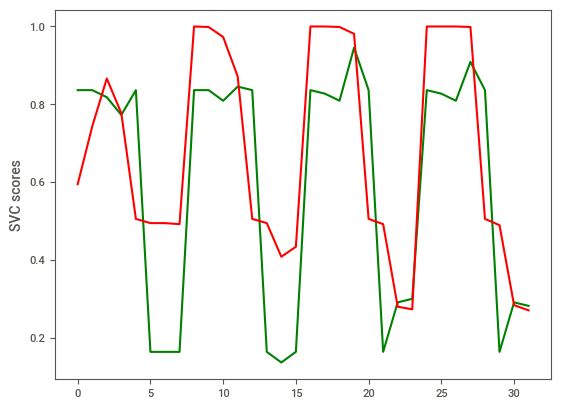

In [ ]:
import itertools

from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Train the model for various depths - FOR loop
parameters = []
c_krn_g = [(0.1, 1, 10, 100), ('rbf', 'sigmoid'), (1, 0.1, 0.01, 0.001)]
for i in itertools.product(*c_krn_g):
         parameters.append(i)


score_SVC_le = []
score_SVC_train_le = []
for c in [0.1, 1, 10, 100]:
    for krn in ['rbf', 'sigmoid']:
        for g in [1, 0.1, 0.01, 0.001]:
            svc_model_le = SVC(C=c, kernel =krn, gamma=g, random_state=0)
            svc_model_le = svc_model_le.fit(X_train_list[4], y_train_list[4])
            y_pred_svc_le = svc_model_le.predict(imp_X_10_test_SVD)
            #Evaluate the model (Accuracy)
            score_svc = accuracy_score(y_10_test, y_pred_svc_le)
            score_SVC_le.append(score_svc)
            #Check accuracy on train data
            score_svc_train = accuracy_score(y_train_list[4], svc_model_le.predict(X_train_list[4]))
            score_SVC_train_le.append(score_svc_train)
            SVC_dict = {c+1:v for c,v in enumerate(score_SVC_le)}
            opt_parameters = max(SVC_dict, key=SVC_dict.get)
            opt_C = parameters[opt_parameters-1][0]
            opt_kernel = parameters[opt_parameters-1][1]
            opt_gamma = parameters[opt_parameters-1][2]

print(f"Max SVC scores is {max(score_SVC_le)} for C = {opt_C}, kernel = {opt_kernel} and gamma = {opt_gamma}")
print()

plt.plot(score_SVC_le, color="g", label='Acc. on test')
plt.plot(score_SVC_train_le, color="r", label='Acc. on train')
plt.ylabel('SVC scores');

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def SVC_model(dataset_list, c, Kernel, Gamma, X_train, y_train, X_test, y_test):
    svc = SVC(C=c, kernel=Kernel, gamma=Gamma, probability=True, random_state=0)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []

    plt.figure(figsize=(15, 10))

    for i in range(len(X_train)):
        # Fit model
        SVC_model = svc.fit(X_train[i], y_train[i])
        y_pred = SVC_model.predict(X_test[i])
        y_prob = SVC_model.predict_proba(X_test[i])[:, 1]  # Get probability scores for the positive class

        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], SVC_model.predict(X_train[i]))

        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')

        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)

        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(SVC_model, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    Summary = pd.DataFrame()
    Summary['dataset'] = dataset_list
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc

    return Summary, svc


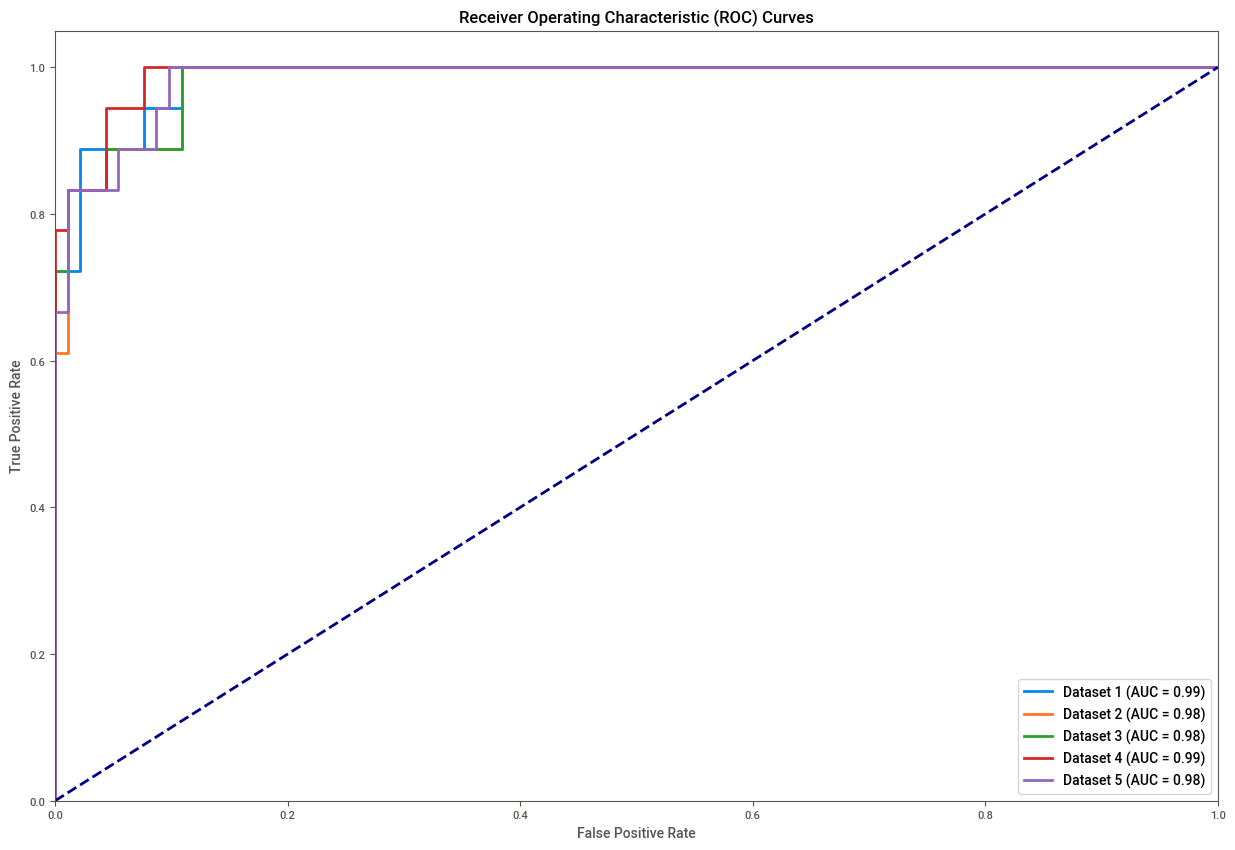

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.954545           0.978378   
1                       10_KNN5_SMOTE          0.945455           0.983784   
2                      10_KNN10_SMOTE          0.936364           0.982432   
3  10_RegressionBasedImputation_SMOTE          0.954545           0.979730   
4                        10_SVD_SMOTE          0.945455           0.981081   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.951351           0.928140     0.978022     0.842105  0.967391   
1     0.951351           0.900362     0.967391     0.833333  0.967391   
2     0.950000           0.894928     0.967033     0.789474  0.956522   
3     0.951351           0.950483     0.988764     0.809524  0.956522   
4     0.945946           0.900362     0.967391     0.833333  0.967391   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.888889  [0.9726775956284153, 0.8648648648648649]  0.954545     0.955036   
1  0.833333   [0.967391304347826, 0.8333333333333334]  0.945455     0.945455   
2  0.833333  [0.9617486338797815, 0.8108108108108109]  0.936364     0.937050   
3  0.944444  [0.9723756906077348, 0.8717948717948718]  0.954545     0.955917   
4  0.833333   [0.967391304347826, 0.8333333333333334]  0.945455     0.945455   

    ROC AUC  
0  0.986111  
1  0.983092  
2  0.984300  
3  0.990338  
4  0.984903

In [ ]:
Dataset_list, C, Kernel, Gamma = modeling_data_list, opt_C, opt_kernel, opt_gamma

SVC_summarry, svc = SVC_model(Dataset_list, C, Kernel, Gamma, X_train_list, y_train_list, X_test_list, y_test_list)
SVC_summarry

### Bagging Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings("ignore")

def BaggingClassifier_model(estimator, modeling_data, X_train, y_train, X_test, y_test):
    bag = BaggingClassifier(base_estimator=estimator, n_estimators=10, random_state=0)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []

    plt.figure(figsize=(15, 10))

    for i in range(len(X_train)):
        # Fit model
        BAG = bag.fit(X_train[i], y_train[i])
        y_pred = BAG.predict(X_test[i])
        y_prob = BAG.predict_proba(X_test[i])[:, 1]  # Get probability scores for the positive class

        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], BAG.predict(X_train[i]))

        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')

        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)

        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(BAG, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc

    return Summary, bag


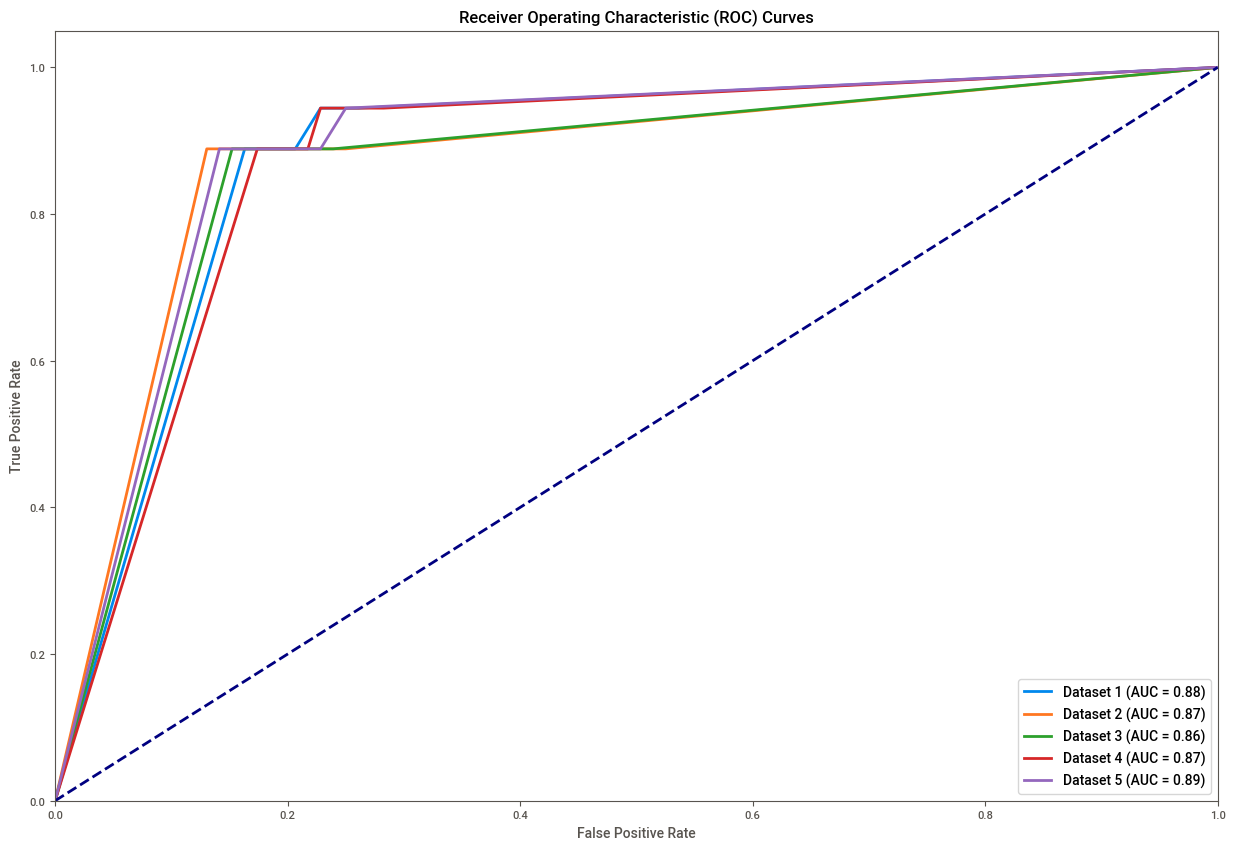

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.800000           0.752703   
1                       10_KNN5_SMOTE          0.836364           0.766216   
2                      10_KNN10_SMOTE          0.836364           0.772973   
3  10_RegressionBasedImputation_SMOTE          0.800000           0.755405   
4                        10_SVD_SMOTE          0.827273           0.759459   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.748649           0.858092     0.986111     0.447368  0.771739   
1     0.764865           0.857488     0.974359     0.500000  0.826087   
2     0.770270           0.857488     0.974359     0.500000  0.826087   
3     0.756757           0.858092     0.986111     0.447368  0.771739   
4     0.764865           0.852053     0.974026     0.484848  0.815217   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.944444  [0.8658536585365854, 0.6071428571428572]  0.800000     0.823519   
1  0.888889                [0.8941176470588235, 0.64]  0.836364     0.852535   
2  0.888889                [0.8941176470588235, 0.64]  0.836364     0.852535   
3  0.944444  [0.8658536585365854, 0.6071428571428572]  0.800000     0.823519   
4  0.888889  [0.8875739644970413, 0.6274509803921569]  0.827273     0.845008   

    ROC AUC  
0  0.880435  
1  0.872585  
2  0.863527  
3  0.874698  
4  0.889191

In [ ]:
from sklearn.svm import SVC

Estimator = SVC(random_state=0)

Bagging_summarry, bag = BaggingClassifier_model(Estimator, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Bagging_summarry

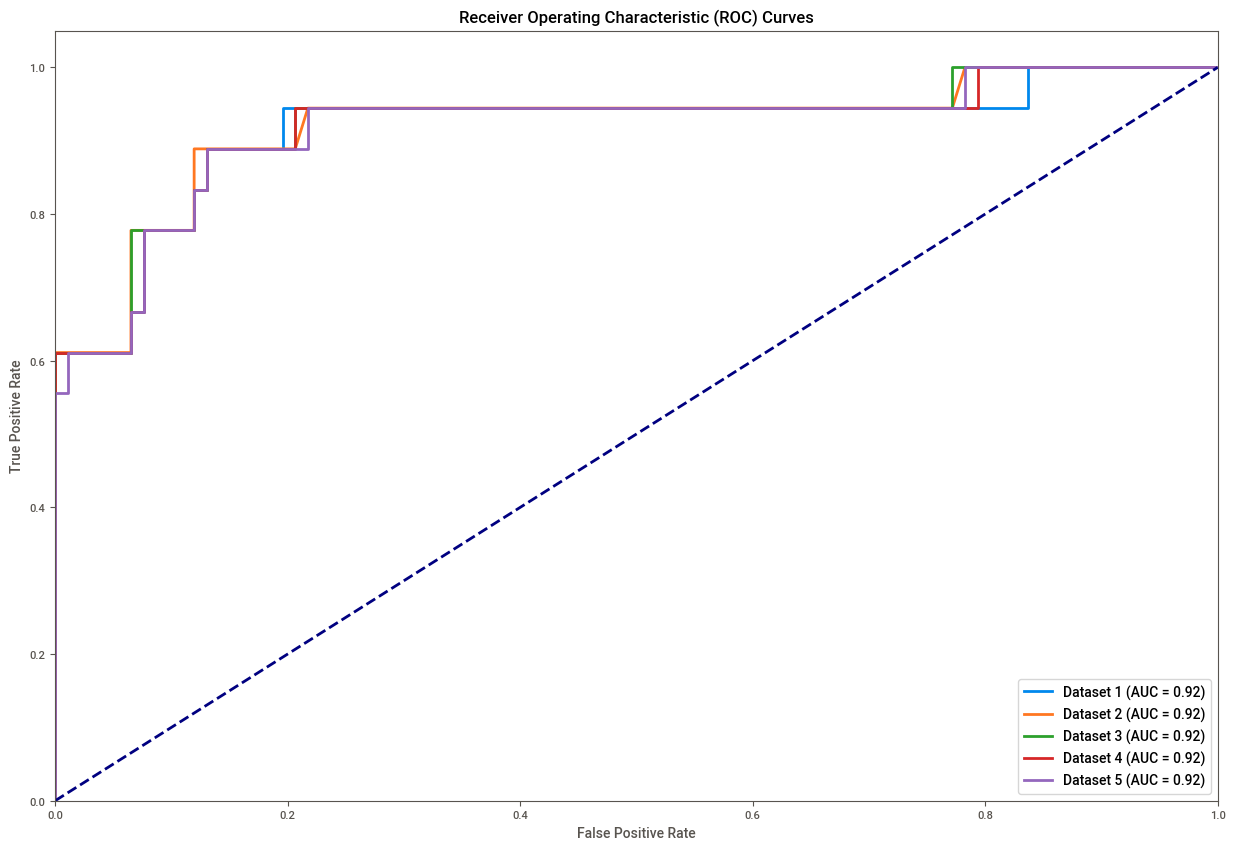

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.836364           0.724324   
1                       10_KNN5_SMOTE          0.854545           0.733784   
2                      10_KNN10_SMOTE          0.854545           0.731081   
3  10_RegressionBasedImputation_SMOTE          0.809091           0.728378   
4                        10_SVD_SMOTE          0.854545           0.724324   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.722973           0.857488     0.974359     0.500000  0.826087   
1     0.729730           0.868357     0.975000     0.533333  0.847826   
2     0.727027           0.868357     0.975000     0.533333  0.847826   
3     0.725676           0.863527     0.986301     0.459459  0.782609   
4     0.728378           0.868357     0.975000     0.533333  0.847826   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.888889                [0.8941176470588235, 0.64]  0.836364     0.852535   
1  0.888889  [0.9069767441860466, 0.6666666666666667]  0.854545     0.867653   
2  0.888889  [0.9069767441860466, 0.6666666666666667]  0.854545     0.867653   
3  0.944444  [0.8727272727272728, 0.6181818181818182]  0.809091     0.831074   
4  0.888889  [0.9069767441860466, 0.6666666666666667]  0.854545     0.867653   

    ROC AUC  
0  0.916667  
1  0.920894  
2  0.920894  
3  0.918478  
4  0.917874

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Estimator = KNeighborsClassifier(n_neighbors=opt_n_neighbors)

Bagging_summarry_KNN, bag_knn = BaggingClassifier_model(Estimator, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Bagging_summarry_KNN

### Voting Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def VotingClassifier_model(C1, C2, Vote, modeling_data, X_train, y_train, X_test, y_test):
    voting = VotingClassifier(estimators=[(f'{C1}', C1), (f'{C2}', C2)], voting=Vote)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []

    plt.figure(figsize=(15, 10))

    for i in range(len(X_train)):
        # Fit model
        Voting = voting.fit(X_train[i], y_train[i])
        y_pred = Voting.predict(X_test[i])

        # Check if voting is 'soft' to get probabilities
        if Vote == 'soft':
            y_prob = Voting.predict_proba(X_test[i])[:, 1]
        else:
            # For 'hard' voting, we cannot get probabilities, hence using predictions for ROC curve
            y_prob = y_pred

        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], Voting.predict(X_train[i]))

        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')

        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)

        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(Voting, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc

    return Summary, voting


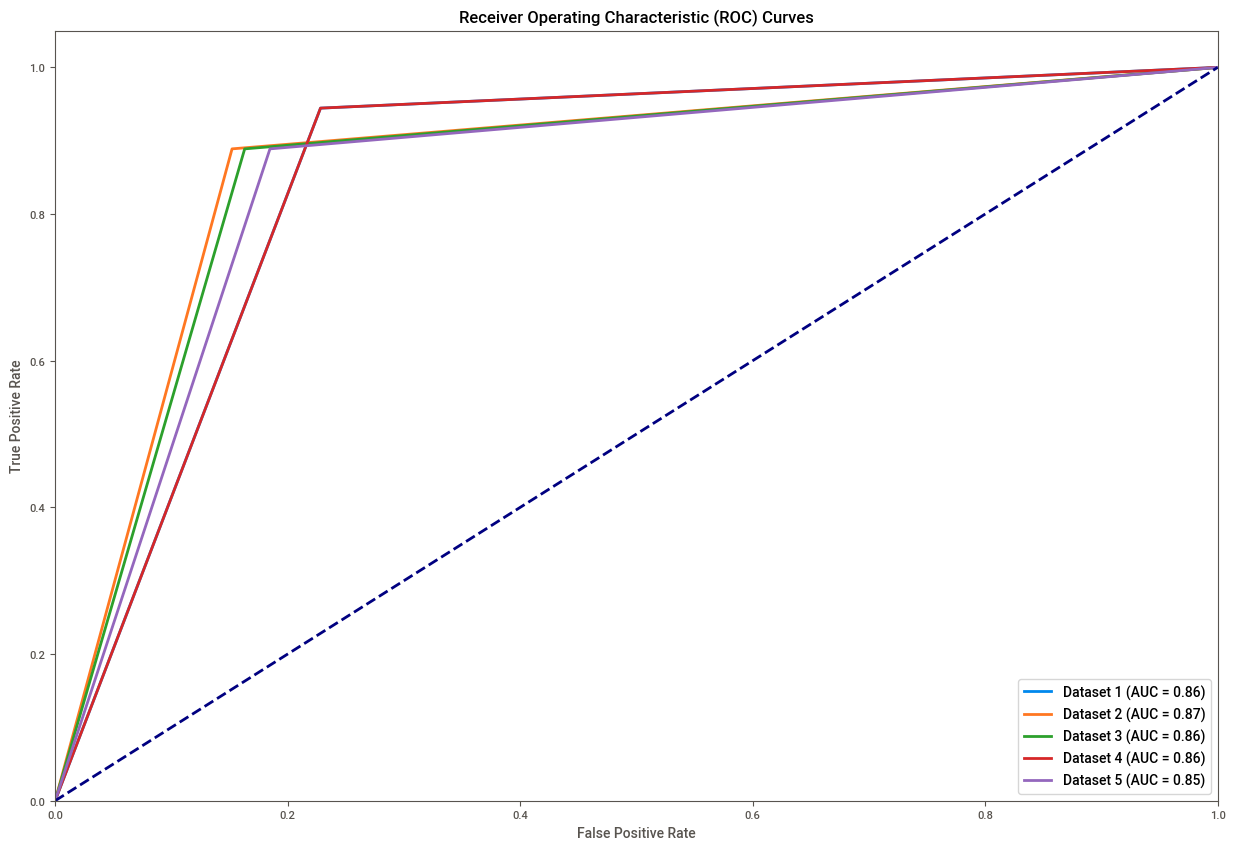

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.800000           0.751351   
1                       10_KNN5_SMOTE          0.854545           0.767568   
2                      10_KNN10_SMOTE          0.845455           0.772973   
3  10_RegressionBasedImputation_SMOTE          0.800000           0.755405   
4                        10_SVD_SMOTE          0.827273           0.759459   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.745946           0.858092     0.986111     0.447368  0.771739   
1     0.764865           0.868357     0.975000     0.533333  0.847826   
2     0.768919           0.862923     0.974684     0.516129  0.836957   
3     0.754054           0.858092     0.986111     0.447368  0.771739   
4     0.763514           0.852053     0.974026     0.484848  0.815217   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.944444  [0.8658536585365854, 0.6071428571428572]  0.800000     0.823519   
1  0.888889  [0.9069767441860466, 0.6666666666666667]  0.854545     0.867653   
2  0.888889  [0.9005847953216375, 0.6530612244897959]  0.845455     0.860081   
3  0.944444  [0.8658536585365854, 0.6071428571428572]  0.800000     0.823519   
4  0.888889  [0.8875739644970413, 0.6274509803921569]  0.827273     0.845008   

    ROC AUC  
0  0.858092  
1  0.868357  
2  0.862923  
3  0.858092  
4  0.852053

In [ ]:
clf1 = SVC(random_state=0)
clf2 = BaggingClassifier(base_estimator=SVC(random_state=0), random_state=0)
vote = ['hard']

Voting_summarry, voting = VotingClassifier_model(clf1, clf2, vote[0], modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Voting_summarry

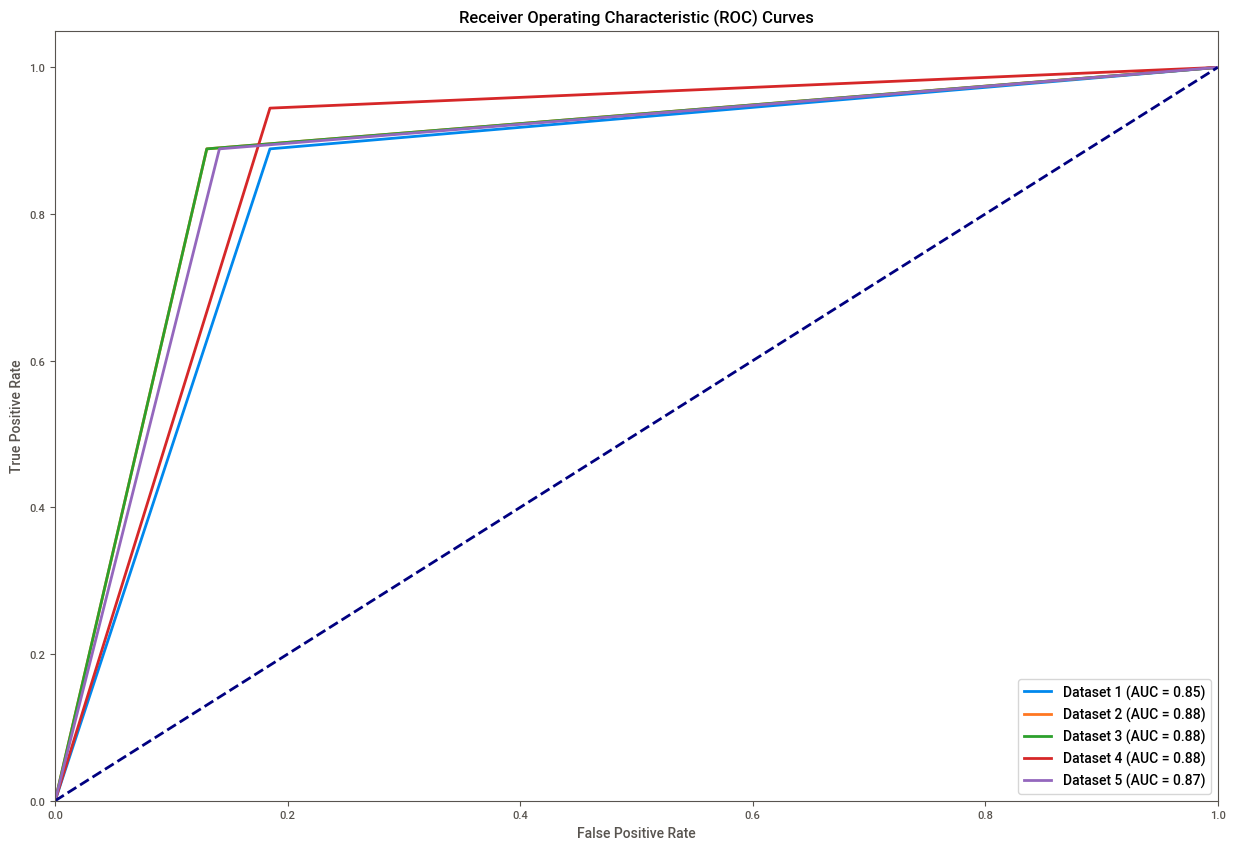

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.827273           0.729730   
1                       10_KNN5_SMOTE          0.872727           0.743243   
2                      10_KNN10_SMOTE          0.872727           0.736486   
3  10_RegressionBasedImputation_SMOTE          0.836364           0.732432   
4                        10_SVD_SMOTE          0.863636           0.731081   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.727027           0.852053     0.974026     0.484848  0.815217   
1     0.739189           0.879227     0.975610     0.571429  0.869565   
2     0.733784           0.879227     0.975610     0.571429  0.869565   
3     0.729730           0.879831     0.986842     0.500000  0.815217   
4     0.735135           0.873792     0.975309     0.551724  0.858696   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.888889  [0.8875739644970413, 0.6274509803921569]  0.827273     0.845008   
1  0.888889  [0.9195402298850575, 0.6956521739130435]  0.872727     0.882904   
2  0.888889  [0.9195402298850575, 0.6956521739130435]  0.872727     0.882904   
3  0.944444  [0.8928571428571429, 0.6538461538461539]  0.836364     0.853746   
4  0.888889  [0.9132947976878614, 0.6808510638297872]  0.863636     0.875259   

    ROC AUC  
0  0.852053  
1  0.879227  
2  0.879227  
3  0.879831  
4  0.873792

In [ ]:
clf3 = KNeighborsClassifier(n_neighbors=opt_n_neighbors)
clf2 = BaggingClassifier(base_estimator=SVC(random_state=0), random_state=0)
vote = ['hard']

Voting_summarry__, voting__ = VotingClassifier_model(clf3, clf2, vote[0], modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Voting_summarry__

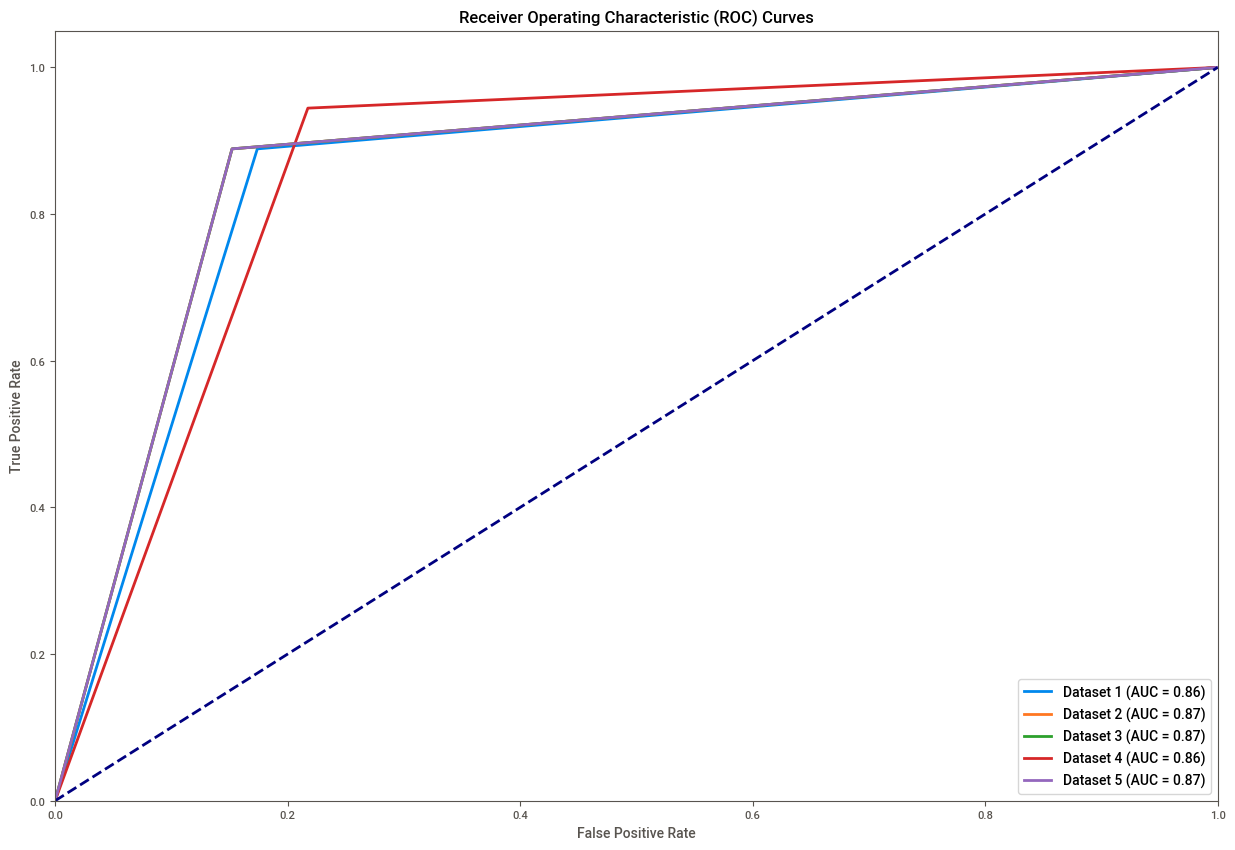

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.836364           0.724324   
1                       10_KNN5_SMOTE          0.854545           0.733784   
2                      10_KNN10_SMOTE          0.854545           0.731081   
3  10_RegressionBasedImputation_SMOTE          0.809091           0.728378   
4                        10_SVD_SMOTE          0.854545           0.724324   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.722973           0.857488     0.974359     0.500000  0.826087   
1     0.731081           0.868357     0.975000     0.533333  0.847826   
2     0.725676           0.868357     0.975000     0.533333  0.847826   
3     0.722973           0.863527     0.986301     0.459459  0.782609   
4     0.729730           0.868357     0.975000     0.533333  0.847826   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.888889                [0.8941176470588235, 0.64]  0.836364     0.852535   
1  0.888889  [0.9069767441860466, 0.6666666666666667]  0.854545     0.867653   
2  0.888889  [0.9069767441860466, 0.6666666666666667]  0.854545     0.867653   
3  0.944444  [0.8727272727272728, 0.6181818181818182]  0.809091     0.831074   
4  0.888889  [0.9069767441860466, 0.6666666666666667]  0.854545     0.867653   

    ROC AUC  
0  0.857488  
1  0.868357  
2  0.868357  
3  0.863527  
4  0.868357

In [ ]:
clf3 = KNeighborsClassifier(n_neighbors=opt_n_neighbors)
clf4 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=opt_n_neighbors), random_state=0)
vote = ['hard']

Voting_summarry_, voting_ = VotingClassifier_model(clf3, clf4, vote[0], modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Voting_summarry_

### Stacking Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def StackingClassifier_model(C1, C2, modeling_data, X_train, y_train, X_test, y_test):
    stacking = StackingClassifier(estimators=[(f'{C1}', C1), (f'{C2}', C2)], final_estimator=C1)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []

    plt.figure(figsize=(15, 10))

    for i in range(len(X_train)):
        # Fit model
        Stacking = stacking.fit(X_train[i], y_train[i])
        y_pred = Stacking.predict(X_test[i])

        # Check if final_estimator supports probability prediction
        if hasattr(Stacking, "predict_proba"):
            y_prob = Stacking.predict_proba(X_test[i])[:, 1]
        else:
            # If probability prediction is not available, use the decision function
            y_prob = Stacking.decision_function(X_test[i])

        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], Stacking.predict(X_train[i]))

        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')

        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)

        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(Stacking, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc

    return Summary, stacking


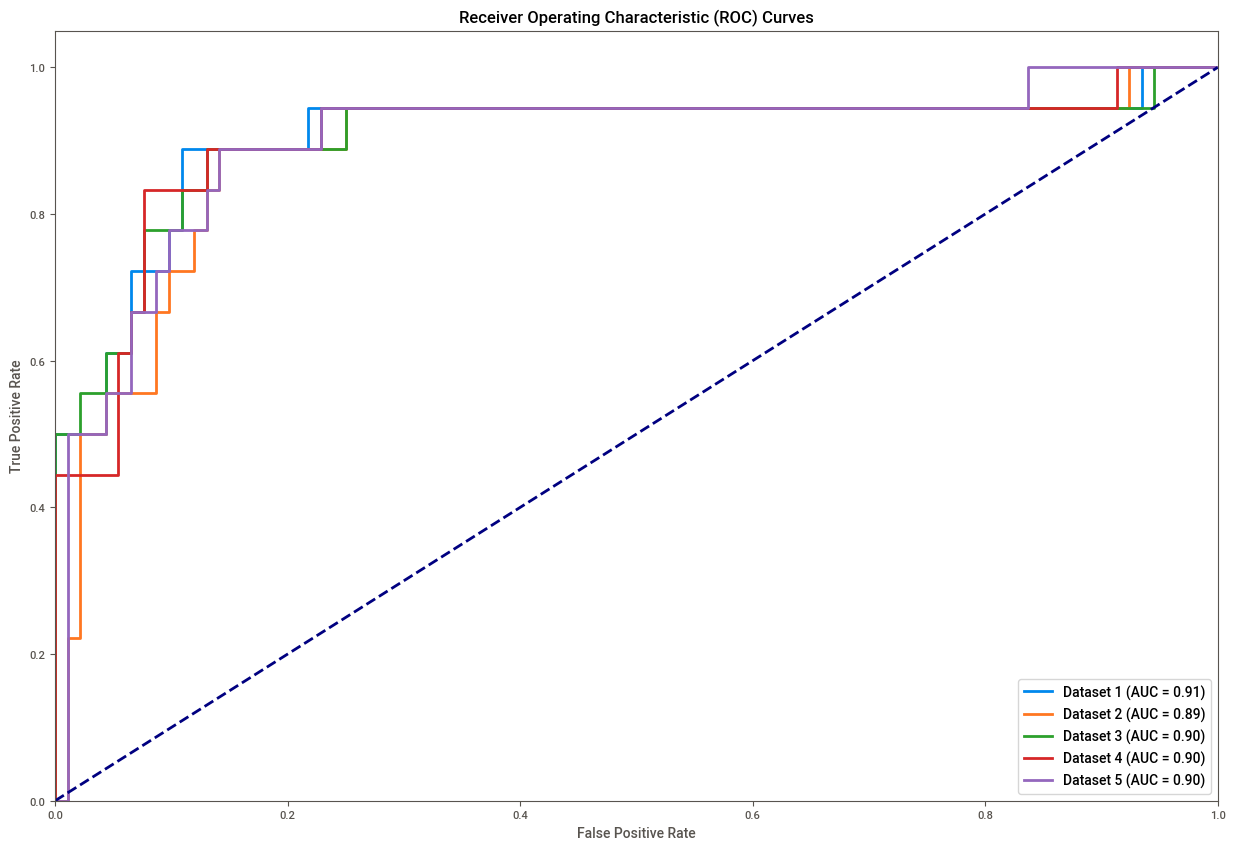

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.781818           0.759459   
1                       10_KNN5_SMOTE          0.790909           0.779730   
2                      10_KNN10_SMOTE          0.790909           0.778378   
3  10_RegressionBasedImputation_SMOTE          0.790909           0.760811   
4                        10_SVD_SMOTE          0.800000           0.775676   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.747297           0.847222     0.985714     0.425000  0.750000   
1     0.771622           0.830314     0.972603     0.432432  0.771739   
2     0.771622           0.830314     0.972603     0.432432  0.771739   
3     0.754054           0.852657     0.985915     0.435897  0.760870   
4     0.766216           0.858092     0.986111     0.447368  0.771739   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.944444  [0.8518518518518519, 0.5862068965517241]  0.781818     0.808383   
1  0.888889  [0.8606060606060606, 0.5818181818181818]  0.790909     0.814986   
2  0.888889  [0.8606060606060606, 0.5818181818181818]  0.790909     0.814986   
3  0.944444  [0.8588957055214724, 0.5964912280701755]  0.790909     0.815957   
4  0.944444  [0.8658536585365854, 0.6071428571428572]  0.800000     0.823519   

    ROC AUC  
0  0.906401  
1  0.887077  
2  0.904589  
3  0.903986  
4  0.900362

In [ ]:
cl1 = SVC(random_state=0)
cl2 = BaggingClassifier(base_estimator=SVC(random_state=0), random_state=0)

Stacking_summarry, stacking = StackingClassifier_model(cl1, cl2, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry

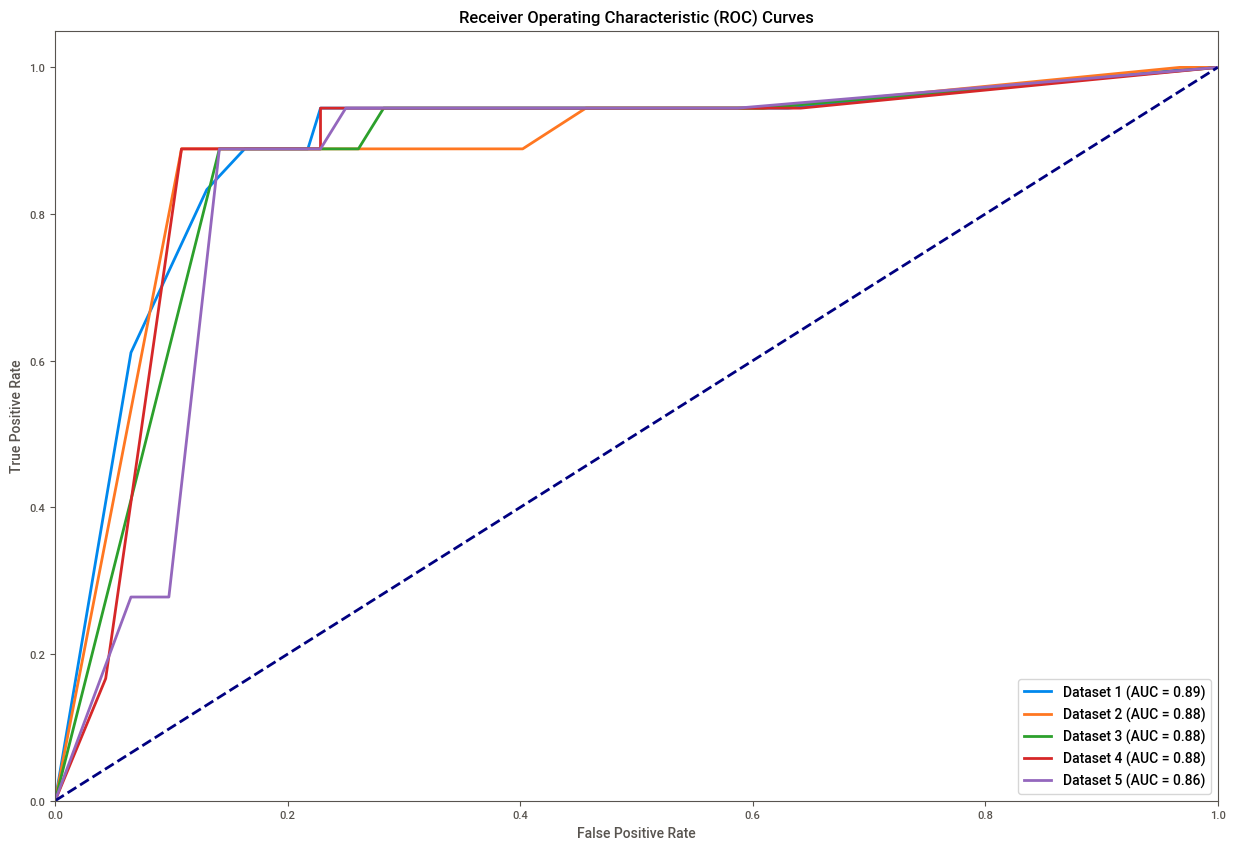

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.800000           0.752703   
1                       10_KNN5_SMOTE          0.836364           0.764865   
2                      10_KNN10_SMOTE          0.827273           0.774324   
3  10_RegressionBasedImputation_SMOTE          0.800000           0.756757   
4                        10_SVD_SMOTE          0.818182           0.762162   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.747297           0.858092     0.986111     0.447368  0.771739   
1     0.763514           0.857488     0.974359     0.500000  0.826087   
2     0.771622           0.852053     0.974026     0.484848  0.815217   
3     0.756757           0.858092     0.986111     0.447368  0.771739   
4     0.763514           0.846618     0.973684     0.470588  0.804348   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.944444  [0.8658536585365854, 0.6071428571428572]  0.800000     0.823519   
1  0.888889                [0.8941176470588235, 0.64]  0.836364     0.852535   
2  0.888889  [0.8875739644970413, 0.6274509803921569]  0.827273     0.845008   
3  0.944444  [0.8658536585365854, 0.6071428571428572]  0.800000     0.823519   
4  0.888889  [0.8809523809523809, 0.6153846153846153]  0.818182     0.837496   

    ROC AUC  
0  0.892814  
1  0.884058  
2  0.877415  
3  0.883152  
4  0.860507

In [ ]:
cl3 = KNeighborsClassifier(n_neighbors=opt_n_neighbors)
cl2 = BaggingClassifier(base_estimator=SVC(random_state=0), random_state=0)

Stacking_summarry___, stacking___ = StackingClassifier_model(cl3, cl2, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry___

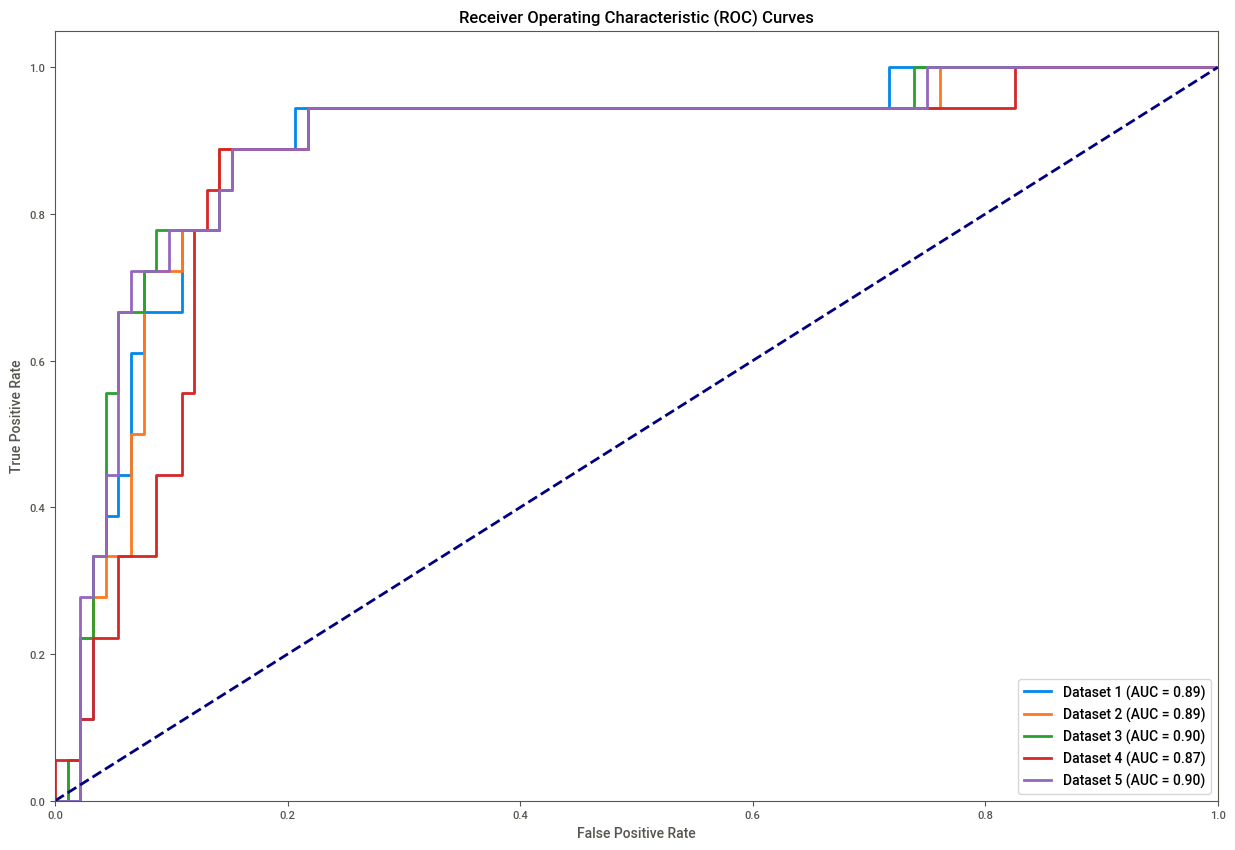

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.772727           0.755405   
1                       10_KNN5_SMOTE          0.772727           0.781081   
2                      10_KNN10_SMOTE          0.781818           0.782432   
3  10_RegressionBasedImputation_SMOTE          0.772727           0.760811   
4                        10_SVD_SMOTE          0.772727           0.777027   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.747297           0.841787     0.985507     0.414634   0.73913   
1     0.778378           0.841787     0.985507     0.414634   0.73913   
2     0.779730           0.847222     0.985714     0.425000   0.75000   
3     0.752703           0.841787     0.985507     0.414634   0.73913   
4     0.774324           0.841787     0.985507     0.414634   0.73913   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.944444     [0.84472049689441, 0.576271186440678]  0.772727     0.800792   
1  0.944444     [0.84472049689441, 0.576271186440678]  0.772727     0.800792   
2  0.944444  [0.8518518518518519, 0.5862068965517241]  0.781818     0.808383   
3  0.944444     [0.84472049689441, 0.576271186440678]  0.772727     0.800792   
4  0.944444     [0.84472049689441, 0.576271186440678]  0.772727     0.800792   

    ROC AUC  
0  0.890700  
1  0.887681  
2  0.897947  
3  0.867754  
4  0.896135

In [ ]:
cl1 = SVC(random_state=0)
cl4 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=opt_n_neighbors), random_state=0)

Stacking_summarry_, stacking_ = StackingClassifier_model(cl1, cl4, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry_

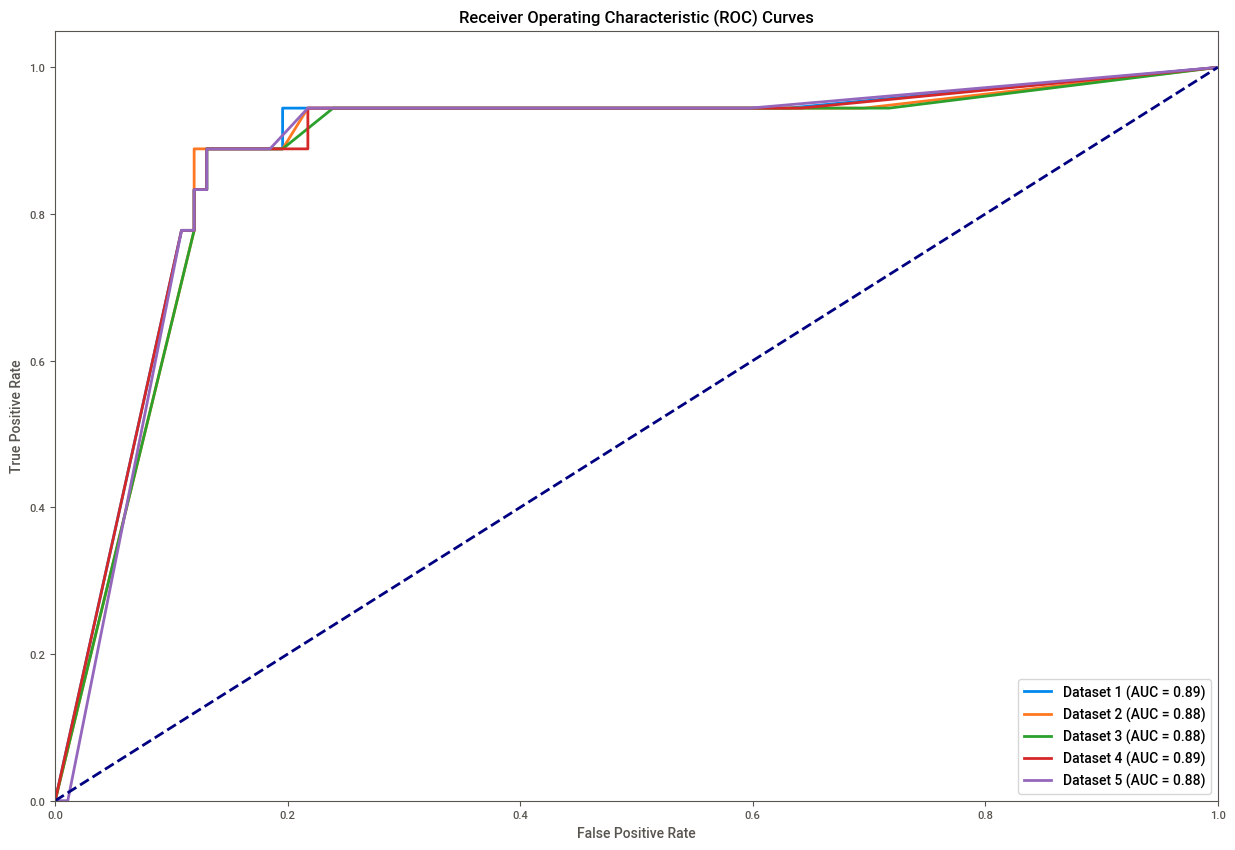

dataset  Accuracy on test  Accuracy on train  \
0                       10_KNN2_SMOTE          0.872727           0.721622   
1                       10_KNN5_SMOTE          0.863636           0.732432   
2                      10_KNN10_SMOTE          0.863636           0.733784   
3  10_RegressionBasedImputation_SMOTE          0.818182           0.725676   
4                        10_SVD_SMOTE          0.863636           0.736486   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.718919           0.879227     0.975610     0.571429  0.869565   
1     0.736486           0.873792     0.975309     0.551724  0.858696   
2     0.733784           0.873792     0.975309     0.551724  0.858696   
3     0.714865           0.846618     0.973684     0.470588  0.804348   
4     0.733784           0.873792     0.975309     0.551724  0.858696   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.888889  [0.9195402298850575, 0.6956521739130435]  0.872727     0.882904   
1  0.888889  [0.9132947976878614, 0.6808510638297872]  0.863636     0.875259   
2  0.888889  [0.9132947976878614, 0.6808510638297872]  0.863636     0.875259   
3  0.888889  [0.8809523809523809, 0.6153846153846153]  0.818182     0.837496   
4  0.888889  [0.9132947976878614, 0.6808510638297872]  0.863636     0.875259   

    ROC AUC  
0  0.887681  
1  0.881643  
2  0.879831  
3  0.886171  
4  0.884058

In [ ]:
cl3 = KNeighborsClassifier(n_neighbors=opt_n_neighbors)
cl4 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=opt_n_neighbors), random_state=0)

Stacking_summarry__, stacking__ = StackingClassifier_model(cl3, cl4, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry__

### Results Summary


Descriptioin of the evaluation metrics and their concepts, particularly focusing on their relevance when working with imbalanced datasets in predicting ASD in people.

1. **KFold Score**: This refers to the performance score obtained through k-fold cross-validation, where the dataset is divided into k subsets, and the model is trained and evaluated k times, using each subset as a testing set exactly once. KFold score provides an average performance across all folds, reducing the variance of the evaluation.

2. **Balanced Accuracy**: Balanced accuracy takes into account the imbalance in the dataset by calculating the average of recall obtained on each class. It is defined as the arithmetic mean of sensitivity (true positive rate) for each class.

3. **Precision 0**: Precision for class 0 (non-disease group) measures the proportion of true negative predictions among all instances predicted as negative. In the context of predicting ASD, it represents the accuracy of predicting individuals who do not have the disease.

4. **Precision 1**: Precision for class 1 (disease group) measures the proportion of true positive predictions among all instances predicted as positive. In the context of predicting ASD, it represents the accuracy of predicting individuals who actually have the disease.

5. **Recall 0**: Recall for class 0 (non-disease group) measures the proportion of true negative predictions among all actual negative instances. In the context of predicting ASD, it represents the ability to correctly identify individuals who do not have the disease.

6. **Recall 1**: Recall for class 1 (disease group) measures the proportion of true positive predictions among all actual positive instances. In the context of predicting ASD, it represents the ability to correctly identify individuals who actually have the disease.

7. **F1 Score**: F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when there is an imbalance between the classes.

8. **F1 Micro**: F1 micro computes the F1 score globally by counting the total true positives, false negatives, and false positives. It treats all classes equally and is suitable for imbalanced datasets.

9. **F1 Weighted**: F1 weighted calculates the F1 score for each class independently and then takes the weighted average based on the number of instances of each class. It is useful when there is an imbalance between classes and you want to give more weight to the performance of the minority class.

10. **ROC AUC (Receiver Operating Characteristic - Area Under the Curve)**: ROC AUC represents the area under the ROC curve, which is a plot of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. It is suitable for evaluating binary classification models and is insensitive to class imbalance.


**Metrics to Follow for Imbalanced Datasets in Predicting ASD**:

- **Balanced Accuracy**: It gives a fair assessment of the model's performance by considering both classes equally, making it suitable for imbalanced datasets.
- **Precision 1, Recall 1, and F1 Score for Class 1**: Since the minority class (individuals with ASD) is of particular interest, metrics specifically focused on this class (precision, recall, and F1 score for class 1) should also be considered.
- **ROC AUC**: It is a reliable metric for evaluating binary classifiers, especially when dealing with imbalanced datasets, as it considers the trade-off between true positive rate and false positive rate across different thresholds.


#### KFold Score

In [ ]:
import pandas as pd

SUM_KFOLD_ = pd.DataFrame()

SUM_KFOLD_['KNN'] = KNN_summarry['KFold score']
SUM_KFOLD_['SVC'] = SVC_summarry['KFold score']

SUM_KFOLD_['BaggingClassifier (est: SVC)'] = Bagging_summarry['KFold score']
SUM_KFOLD_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['KFold score']

SUM_KFOLD_['Voting (SVC, BaggingClassifier (est: SVC))'] = Voting_summarry['KFold score']
SUM_KFOLD_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry__['KFold score']
SUM_KFOLD_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['KFold score']

SUM_KFOLD_['Stacking (SVC, BaggingClassifier (est: SVC))'] = Stacking_summarry['KFold score']
SUM_KFOLD_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry___['KFold score']
SUM_KFOLD_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['KFold score']
SUM_KFOLD_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['KFold score']

# Transpose the DataFrame
SUM_KFOLD = SUM_KFOLD_.T

# Rename the columns
SUM_KFOLD.columns = [
    '10_KNN2', '10_KNN5', '10_KNN10', '10_RegressionBasedImputation', '10_SVD',
]

SUM_KFOLD

10_KNN2   10_KNN5  10_KNN10  \
KNN                                           0.732432  0.731081  0.725676   
SVC                                           0.951351  0.951351  0.950000   
BaggingClassifier (est: SVC)                  0.748649  0.764865  0.770270   
BaggingClassifier (est: KNN)                  0.722973  0.729730  0.727027   
Voting (SVC, BaggingClassifier (est: SVC))    0.745946  0.764865  0.768919   
Voting (KNN, BaggingClassifier (est: SVC))    0.727027  0.739189  0.733784   
Voting (KNN, BaggingClassifier (est: KNN))    0.722973  0.731081  0.725676   
Stacking (SVC, BaggingClassifier (est: SVC))  0.747297  0.771622  0.771622   
Stacking (KNN, BaggingClassifier (est: SVC))  0.747297  0.763514  0.771622   
Stacking (SVC, BaggingClassifier (est: KNN))  0.747297  0.778378  0.779730   
Stacking (KNN, BaggingClassifier (est: KNN))  0.718919  0.736486  0.733784   

                                              10_RegressionBasedImputation  \
KNN                                                               0.725676   
SVC                                                               0.951351   
BaggingClassifier (est: SVC)                                      0.756757   
BaggingClassifier (est: KNN)                                      0.725676   
Voting (SVC, BaggingClassifier (est: SVC))                        0.754054   
Voting (KNN, BaggingClassifier (est: SVC))                        0.729730   
Voting (KNN, BaggingClassifier (est: KNN))                        0.722973   
Stacking (SVC, BaggingClassifier (est: SVC))                      0.754054   
Stacking (KNN, BaggingClassifier (est: SVC))                      0.756757   
Stacking (SVC, BaggingClassifier (est: KNN))                      0.752703   
Stacking (KNN, BaggingClassifier (est: KNN))                      0.714865   

                                                10_SVD  
KNN                                           0.729730  
SVC                                           0.945946  
BaggingClassifier (est: SVC)                  0.764865  
BaggingClassifier (est: KNN)                  0.728378  
Voting (SVC, BaggingClassifier (est: SVC))    0.763514  
Voting (KNN, BaggingClassifier (est: SVC))    0.735135  
Voting (KNN, BaggingClassifier (est: KNN))    0.729730  
Stacking (SVC, BaggingClassifier (est: SVC))  0.766216  
Stacking (KNN, BaggingClassifier (est: SVC))  0.763514  
Stacking (SVC, BaggingClassifier (est: KNN))  0.774324  
Stacking (KNN, BaggingClassifier (est: KNN))  0.733784

#### Balanced Accuracy

In [ ]:
import pandas as pd

SUM_BALANCED_ACCURACY_ = pd.DataFrame()

SUM_BALANCED_ACCURACY_['KNN'] = KNN_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['SVC'] = SVC_summarry['Balanced Accuracy']

SUM_BALANCED_ACCURACY_['BaggingClassifier (est: SVC)'] = Bagging_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['Balanced Accuracy']

SUM_BALANCED_ACCURACY_['Voting (SVC, BaggingClassifier (est: SVC))'] = Voting_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry__['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['Balanced Accuracy']

SUM_BALANCED_ACCURACY_['Stacking (SVC, BaggingClassifier (est: SVC))'] = Stacking_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry___['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['Balanced Accuracy']

# Transpose the DataFrame
SUM_BALANCED_ACCURACY = SUM_BALANCED_ACCURACY_.T

# Rename the columns
SUM_BALANCED_ACCURACY.columns = [
    '10_KNN2', '10_KNN5', '10_KNN10', '10_RegressionBasedImputation', '10_SVD',
]

SUM_BALANCED_ACCURACY

10_KNN2   10_KNN5  10_KNN10  \
KNN                                           0.846618  0.868357  0.862923   
SVC                                           0.928140  0.900362  0.894928   
BaggingClassifier (est: SVC)                  0.858092  0.857488  0.857488   
BaggingClassifier (est: KNN)                  0.857488  0.868357  0.868357   
Voting (SVC, BaggingClassifier (est: SVC))    0.858092  0.868357  0.862923   
Voting (KNN, BaggingClassifier (est: SVC))    0.852053  0.879227  0.879227   
Voting (KNN, BaggingClassifier (est: KNN))    0.857488  0.868357  0.868357   
Stacking (SVC, BaggingClassifier (est: SVC))  0.847222  0.830314  0.830314   
Stacking (KNN, BaggingClassifier (est: SVC))  0.858092  0.857488  0.852053   
Stacking (SVC, BaggingClassifier (est: KNN))  0.841787  0.841787  0.847222   
Stacking (KNN, BaggingClassifier (est: KNN))  0.879227  0.873792  0.873792   

                                              10_RegressionBasedImputation  \
KNN                                                               0.863527   
SVC                                                               0.950483   
BaggingClassifier (est: SVC)                                      0.858092   
BaggingClassifier (est: KNN)                                      0.863527   
Voting (SVC, BaggingClassifier (est: SVC))                        0.858092   
Voting (KNN, BaggingClassifier (est: SVC))                        0.879831   
Voting (KNN, BaggingClassifier (est: KNN))                        0.863527   
Stacking (SVC, BaggingClassifier (est: SVC))                      0.852657   
Stacking (KNN, BaggingClassifier (est: SVC))                      0.858092   
Stacking (SVC, BaggingClassifier (est: KNN))                      0.841787   
Stacking (KNN, BaggingClassifier (est: KNN))                      0.846618   

                                                10_SVD  
KNN                                           0.868357  
SVC                                           0.900362  
BaggingClassifier (est: SVC)                  0.852053  
BaggingClassifier (est: KNN)                  0.868357  
Voting (SVC, BaggingClassifier (est: SVC))    0.852053  
Voting (KNN, BaggingClassifier (est: SVC))    0.873792  
Voting (KNN, BaggingClassifier (est: KNN))    0.868357  
Stacking (SVC, BaggingClassifier (est: SVC))  0.858092  
Stacking (KNN, BaggingClassifier (est: SVC))  0.846618  
Stacking (SVC, BaggingClassifier (est: KNN))  0.841787  
Stacking (KNN, BaggingClassifier (est: KNN))  0.873792

In [ ]:
SUM_BALANCED_ACCURACY_.describe()

KNN       SVC  BaggingClassifier (est: SVC)  \
count  5.000000  5.000000                      5.000000   
mean   0.861957  0.914855                      0.856643   
std    0.008953  0.023786                      0.002583   
min    0.846618  0.894928                      0.852053   
25%    0.862923  0.900362                      0.857488   
50%    0.863527  0.900362                      0.857488   
75%    0.868357  0.928140                      0.858092   
max    0.868357  0.950483                      0.858092   

       BaggingClassifier (est: KNN)  \
count                      5.000000   
mean                       0.865217   
std                        0.004801   
min                        0.857488   
25%                        0.863527   
50%                        0.868357   
75%                        0.868357   
max                        0.868357   

       Voting (SVC, BaggingClassifier (est: SVC))  \
count                                    5.000000   
mean                                     0.859903   
std                                      0.006099   
min                                      0.852053   
25%                                      0.858092   
50%                                      0.858092   
75%                                      0.862923   
max                                      0.868357   

       Voting (KNN, BaggingClassifier (est: SVC))  \
count                                    5.000000   
mean                                     0.872826   
std                                      0.011869   
min                                      0.852053   
25%                                      0.873792   
50%                                      0.879227   
75%                                      0.879227   
max                                      0.879831   

       Voting (KNN, BaggingClassifier (est: KNN))  \
count                                    5.000000   
mean                                     0.865217   
std                                      0.004801   
min                                      0.857488   
25%                                      0.863527   
50%                                      0.868357   
75%                                      0.868357   
max                                      0.868357   

       Stacking (SVC, BaggingClassifier (est: SVC))  \
count                                      5.000000   
mean                                       0.843720   
std                                        0.012827   
min                                        0.830314   
25%                                        0.830314   
50%                                        0.847222   
75%                                        0.852657   
max                                        0.858092   

       Stacking (KNN, BaggingClassifier (est: SVC))  \
count                                      5.000000   
mean                                       0.854469   
std                                        0.005070   
min                                        0.846618   
25%                                        0.852053   
50%                                        0.857488   
75%                                        0.858092   
max                                        0.858092   

       Stacking (SVC, BaggingClassifier (est: KNN))  \
count                                      5.000000   
mean                                       0.842874   
std                                        0.002431   
min                                        0.841787   
25%                                        0.841787   
50%                                        0.841787   
75%                                        0.841787   
max                                        0.847222   

       Stacking (KNN, BaggingClassifier (est: KNN))  
count                                      5.000000  
mean                                       0.869444  
std                                        0

#### F1 Scoree for class 1 and class 0

In [ ]:
import pandas as pd

SUM_F1_0_1_ = pd.DataFrame()

SUM_F1_0_1_['KNN'] = KNN_summarry['F1 score 0, 1']
SUM_F1_0_1_['SVC'] = SVC_summarry['F1 score 0, 1']

SUM_F1_0_1_['BaggingClassifier (est: SVC)'] = Bagging_summarry['F1 score 0, 1']
SUM_F1_0_1_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['F1 score 0, 1']

SUM_F1_0_1_['Voting (SVC, BaggingClassifier (est: SVC))'] = Voting_summarry['F1 score 0, 1']
SUM_F1_0_1_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry__['F1 score 0, 1']
SUM_F1_0_1_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['F1 score 0, 1']

SUM_F1_0_1_['Stacking (SVC, BaggingClassifier (est: SVC))'] = Stacking_summarry['F1 score 0, 1']
SUM_F1_0_1_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry___['F1 score 0, 1']
SUM_F1_0_1_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['F1 score 0, 1']
SUM_F1_0_1_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['F1 score 0, 1']

# Transpose the DataFrame
SUM_F1_0_1 = SUM_F1_0_1_.T

# Rename the columns
SUM_F1_0_1.columns = [
    '10_KNN2', '10_KNN5', '10_KNN10', '10_RegressionBasedImputation', '10_SVD',
]

SUM_F1_0_1

10_KNN2  \
KNN                                           [0.8809523809523809, 0.6153846153846153]   
SVC                                           [0.9726775956284153, 0.8648648648648649]   
BaggingClassifier (est: SVC)                  [0.8658536585365854, 0.6071428571428572]   
BaggingClassifier (est: KNN)                                [0.8941176470588235, 0.64]   
Voting (SVC, BaggingClassifier (est: SVC))    [0.8658536585365854, 0.6071428571428572]   
Voting (KNN, BaggingClassifier (est: SVC))    [0.8875739644970413, 0.6274509803921569]   
Voting (KNN, BaggingClassifier (est: KNN))                  [0.8941176470588235, 0.64]   
Stacking (SVC, BaggingClassifier (est: SVC))  [0.8518518518518519, 0.5862068965517241]   
Stacking (KNN, BaggingClassifier (est: SVC))  [0.8658536585365854, 0.6071428571428572]   
Stacking (SVC, BaggingClassifier (est: KNN))     [0.84472049689441, 0.576271186440678]   
Stacking (KNN, BaggingClassifier (est: KNN))  [0.9195402298850575, 0.6956521739130435]   

                                                                               10_KNN5  \
KNN                                           [0.9069767441860466, 0.6666666666666667]   
SVC                                            [0.967391304347826, 0.8333333333333334]   
BaggingClassifier (est: SVC)                                [0.8941176470588235, 0.64]   
BaggingClassifier (est: KNN)                  [0.9069767441860466, 0.6666666666666667]   
Voting (SVC, BaggingClassifier (est: SVC))    [0.9069767441860466, 0.6666666666666667]   
Voting (KNN, BaggingClassifier (est: SVC))    [0.9195402298850575, 0.6956521739130435]   
Voting (KNN, BaggingClassifier (est: KNN))    [0.9069767441860466, 0.6666666666666667]   
Stacking (SVC, BaggingClassifier (est: SVC))  [0.8606060606060606, 0.5818181818181818]   
Stacking (KNN, BaggingClassifier (est: SVC))                [0.8941176470588235, 0.64]   
Stacking (SVC, BaggingClassifier (est: KNN))     [0.84472049689441, 0.576271186440678]   
Stacking (KNN, BaggingClassifier (est: KNN))  [0.9132947976878614, 0.6808510638297872]   

                                                                              10_KNN10  \
KNN                                           [0.9005847953216375, 0.6530612244897959]   
SVC                                           [0.9617486338797815, 0.8108108108108109]   
BaggingClassifier (est: SVC)                                [0.8941176470588235, 0.64]   
BaggingClassifier (est: KNN)                  [0.9069767441860466, 0.6666666666666667]   
Voting (SVC, BaggingClassifier (est: SVC))    [0.9005847953216375, 0.6530612244897959]   
Voting (KNN, BaggingClassifier (est: SVC))    [0.9195402298850575, 0.6956521739130435]   
Voting (KNN, BaggingClassifier (est: KNN))    [0.9069767441860466, 0.6666666666666667]   
Stacking (SVC, BaggingClassifier (est: SVC))  [0.8606060606060606, 0.5818181818181818]   
Stacking (KNN, BaggingClassifier (est: SVC))  [0.8875739644970413, 0.6274509803921569]   
Stacking (SVC, BaggingClassifier (est: KNN))  [0.8518518518518519, 0.5862068965517241]   
Stacking (KNN, BaggingClassifier (est: KNN))  [0.9132947976878614, 0.6808510638297872]   

                                                          10_RegressionBasedImputation  \
KNN                                           [0.8727272727272728, 0.6181818181818182]   
SVC                                           [0.9723756906077348, 0.8717948717948718]   
BaggingClassifier (est: SVC)                  [0.8658536585365854, 0.6071428571428572]   
BaggingClassifier (est: KNN)                  [0.8727272727272728, 0.6181818181818182]   
Voting (SVC, BaggingClassifier (est: SVC))    [0.8658536585365854, 0.6071428571428572]   
Voting (KNN, BaggingClassifier (est: SVC))    [0.8928571428571429, 0.6538461538461539]   
Voting (KNN, BaggingClassifier (est: KNN))    [0.8727272727272728, 0.6181818181818182]   
Stacking (SVC, BaggingClassifier (est: SVC))  [0.8588957055214724, 0.5964912280701755]   
Stacking (KNN, BaggingClas

#### Recall 1

In [ ]:
import pandas as pd

SUM_RECALL_1_ = pd.DataFrame()

SUM_RECALL_1_['KNN'] = KNN_summarry['Recall 1']
SUM_RECALL_1_['SVC'] = SVC_summarry['Recall 1']

SUM_RECALL_1_['BaggingClassifier (est: SVC)'] = Bagging_summarry['Recall 1']
SUM_RECALL_1_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['Recall 1']

SUM_RECALL_1_['Voting (SVC, BaggingClassifier (est: SVC))'] = Voting_summarry['Recall 1']
SUM_RECALL_1_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry__['Recall 1']
SUM_RECALL_1_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['Recall 1']

SUM_RECALL_1_['Stacking (SVC, BaggingClassifier (est: SVC))'] = Stacking_summarry['Recall 1']
SUM_RECALL_1_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry___['Recall 1']
SUM_RECALL_1_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['Recall 1']
SUM_RECALL_1_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['Recall 1']

# Transpose the DataFrame
SUM_RECALL_1 = SUM_RECALL_1_.T

# Rename the columns
SUM_RECALL_1.columns = [
    '10_KNN2', '10_KNN5', '10_KNN10', '10_RegressionBasedImputation', '10_SVD',
]

SUM_RECALL_1



10_KNN2   10_KNN5  10_KNN10  \
KNN                                           0.888889  0.888889  0.888889   
SVC                                           0.888889  0.833333  0.833333   
BaggingClassifier (est: SVC)                  0.944444  0.888889  0.888889   
BaggingClassifier (est: KNN)                  0.888889  0.888889  0.888889   
Voting (SVC, BaggingClassifier (est: SVC))    0.944444  0.888889  0.888889   
Voting (KNN, BaggingClassifier (est: SVC))    0.888889  0.888889  0.888889   
Voting (KNN, BaggingClassifier (est: KNN))    0.888889  0.888889  0.888889   
Stacking (SVC, BaggingClassifier (est: SVC))  0.944444  0.888889  0.888889   
Stacking (KNN, BaggingClassifier (est: SVC))  0.944444  0.888889  0.888889   
Stacking (SVC, BaggingClassifier (est: KNN))  0.944444  0.944444  0.944444   
Stacking (KNN, BaggingClassifier (est: KNN))  0.888889  0.888889  0.888889   

                                              10_RegressionBasedImputation  \
KNN                                                               0.944444   
SVC                                                               0.944444   
BaggingClassifier (est: SVC)                                      0.944444   
BaggingClassifier (est: KNN)                                      0.944444   
Voting (SVC, BaggingClassifier (est: SVC))                        0.944444   
Voting (KNN, BaggingClassifier (est: SVC))                        0.944444   
Voting (KNN, BaggingClassifier (est: KNN))                        0.944444   
Stacking (SVC, BaggingClassifier (est: SVC))                      0.944444   
Stacking (KNN, BaggingClassifier (est: SVC))                      0.944444   
Stacking (SVC, BaggingClassifier (est: KNN))                      0.944444   
Stacking (KNN, BaggingClassifier (est: KNN))                      0.888889   

                                                10_SVD  
KNN                                           0.888889  
SVC                                           0.833333  
BaggingClassifier (est: SVC)                  0.888889  
BaggingClassifier (est: KNN)                  0.888889  
Voting (SVC, BaggingClassifier (est: SVC))    0.888889  
Voting (KNN, BaggingClassifier (est: SVC))    0.888889  
Voting (KNN, BaggingClassifier (est: KNN))    0.888889  
Stacking (SVC, BaggingClassifier (est: SVC))  0.944444  
Stacking (KNN, BaggingClassifier (est: SVC))  0.888889  
Stacking (SVC, BaggingClassifier (est: KNN))  0.944444  
Stacking (KNN, BaggingClassifier (est: KNN))  0.888889

#### Precision 1

In [ ]:
import pandas as pd

SUM_PRECISION_1_ = pd.DataFrame()

SUM_PRECISION_1_['KNN'] = KNN_summarry['Precision 1']
SUM_PRECISION_1_['SVC'] = SVC_summarry['Precision 1']

SUM_PRECISION_1_['BaggingClassifier (est: SVC)'] = Bagging_summarry['Precision 1']
SUM_PRECISION_1_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['Precision 1']

SUM_PRECISION_1_['Voting (SVC, BaggingClassifier (est: SVC))'] = Voting_summarry['Precision 1']
SUM_PRECISION_1_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry__['Precision 1']
SUM_PRECISION_1_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['Precision 1']

SUM_PRECISION_1_['Stacking (SVC, BaggingClassifier (est: SVC))'] = Stacking_summarry['Precision 1']
SUM_PRECISION_1_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry___['Precision 1']
SUM_PRECISION_1_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['Precision 1']
SUM_PRECISION_1_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['Precision 1']

# Transpose the DataFrame
SUM_PRECISION_1 = SUM_PRECISION_1_.T

# Rename the columns
SUM_PRECISION_1.columns = [
    '10_KNN2', '10_KNN5', '10_KNN10', '10_RegressionBasedImputation', '10_SVD',
]

SUM_PRECISION_1


10_KNN2   10_KNN5  10_KNN10  \
KNN                                           0.470588  0.533333  0.516129   
SVC                                           0.842105  0.833333  0.789474   
BaggingClassifier (est: SVC)                  0.447368  0.500000  0.500000   
BaggingClassifier (est: KNN)                  0.500000  0.533333  0.533333   
Voting (SVC, BaggingClassifier (est: SVC))    0.447368  0.533333  0.516129   
Voting (KNN, BaggingClassifier (est: SVC))    0.484848  0.571429  0.571429   
Voting (KNN, BaggingClassifier (est: KNN))    0.500000  0.533333  0.533333   
Stacking (SVC, BaggingClassifier (est: SVC))  0.425000  0.432432  0.432432   
Stacking (KNN, BaggingClassifier (est: SVC))  0.447368  0.500000  0.484848   
Stacking (SVC, BaggingClassifier (est: KNN))  0.414634  0.414634  0.425000   
Stacking (KNN, BaggingClassifier (est: KNN))  0.571429  0.551724  0.551724   

                                              10_RegressionBasedImputation  \
KNN                                                               0.459459   
SVC                                                               0.809524   
BaggingClassifier (est: SVC)                                      0.447368   
BaggingClassifier (est: KNN)                                      0.459459   
Voting (SVC, BaggingClassifier (est: SVC))                        0.447368   
Voting (KNN, BaggingClassifier (est: SVC))                        0.500000   
Voting (KNN, BaggingClassifier (est: KNN))                        0.459459   
Stacking (SVC, BaggingClassifier (est: SVC))                      0.435897   
Stacking (KNN, BaggingClassifier (est: SVC))                      0.447368   
Stacking (SVC, BaggingClassifier (est: KNN))                      0.414634   
Stacking (KNN, BaggingClassifier (est: KNN))                      0.470588   

                                                10_SVD  
KNN                                           0.533333  
SVC                                           0.833333  
BaggingClassifier (est: SVC)                  0.484848  
BaggingClassifier (est: KNN)                  0.533333  
Voting (SVC, BaggingClassifier (est: SVC))    0.484848  
Voting (KNN, BaggingClassifier (est: SVC))    0.551724  
Voting (KNN, BaggingClassifier (est: KNN))    0.533333  
Stacking (SVC, BaggingClassifier (est: SVC))  0.447368  
Stacking (KNN, BaggingClassifier (est: SVC))  0.470588  
Stacking (SVC, BaggingClassifier (est: KNN))  0.414634  
Stacking (KNN, BaggingClassifier (est: KNN))  0.551724

#### ROC AUC

In [ ]:
import pandas as pd

SUM_ROC_AUC_ = pd.DataFrame()

SUM_ROC_AUC_['KNN'] = KNN_summarry['ROC AUC']
SUM_ROC_AUC_['SVC'] = SVC_summarry['ROC AUC']

SUM_ROC_AUC_['BaggingClassifier (est: SVC)'] = Bagging_summarry['ROC AUC']
SUM_ROC_AUC_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['ROC AUC']

SUM_ROC_AUC_['Voting (SVC, BaggingClassifier (est: SVC))'] = Voting_summarry['ROC AUC']
SUM_ROC_AUC_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry__['ROC AUC']
SUM_ROC_AUC_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['ROC AUC']

SUM_ROC_AUC_['Stacking (SVC, BaggingClassifier (est: SVC))'] = Stacking_summarry['ROC AUC']
SUM_ROC_AUC_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry___['ROC AUC']
SUM_ROC_AUC_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['ROC AUC']
SUM_ROC_AUC_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['ROC AUC']

# Transpose the DataFrame
SUM_ROC_AUC = SUM_ROC_AUC_.T

# Rename the columns
SUM_ROC_AUC.columns = [
    '10_KNN2', '10_KNN5', '10_KNN10', '10_RegressionBasedImputation', '10_SVD',
]

SUM_ROC_AUC


10_KNN2   10_KNN5  10_KNN10  \
KNN                                           0.916365  0.919988  0.919384   
SVC                                           0.986111  0.983092  0.984300   
BaggingClassifier (est: SVC)                  0.880435  0.872585  0.863527   
BaggingClassifier (est: KNN)                  0.916667  0.920894  0.920894   
Voting (SVC, BaggingClassifier (est: SVC))    0.858092  0.868357  0.862923   
Voting (KNN, BaggingClassifier (est: SVC))    0.852053  0.879227  0.879227   
Voting (KNN, BaggingClassifier (est: KNN))    0.857488  0.868357  0.868357   
Stacking (SVC, BaggingClassifier (est: SVC))  0.906401  0.887077  0.904589   
Stacking (KNN, BaggingClassifier (est: SVC))  0.892814  0.884058  0.877415   
Stacking (SVC, BaggingClassifier (est: KNN))  0.890700  0.887681  0.897947   
Stacking (KNN, BaggingClassifier (est: KNN))  0.887681  0.881643  0.879831   

                                              10_RegressionBasedImputation  \
KNN                                                               0.919384   
SVC                                                               0.990338   
BaggingClassifier (est: SVC)                                      0.874698   
BaggingClassifier (est: KNN)                                      0.918478   
Voting (SVC, BaggingClassifier (est: SVC))                        0.858092   
Voting (KNN, BaggingClassifier (est: SVC))                        0.879831   
Voting (KNN, BaggingClassifier (est: KNN))                        0.863527   
Stacking (SVC, BaggingClassifier (est: SVC))                      0.903986   
Stacking (KNN, BaggingClassifier (est: SVC))                      0.883152   
Stacking (SVC, BaggingClassifier (est: KNN))                      0.867754   
Stacking (KNN, BaggingClassifier (est: KNN))                      0.886171   

                                                10_SVD  
KNN                                           0.918176  
SVC                                           0.984903  
BaggingClassifier (est: SVC)                  0.889191  
BaggingClassifier (est: KNN)                  0.917874  
Voting (SVC, BaggingClassifier (est: SVC))    0.852053  
Voting (KNN, BaggingClassifier (est: SVC))    0.873792  
Voting (KNN, BaggingClassifier (est: KNN))    0.868357  
Stacking (SVC, BaggingClassifier (est: SVC))  0.900362  
Stacking (KNN, BaggingClassifier (est: SVC))  0.860507  
Stacking (SVC, BaggingClassifier (est: KNN))  0.896135  
Stacking (KNN, BaggingClassifier (est: KNN))  0.884058

#### Scores' plot

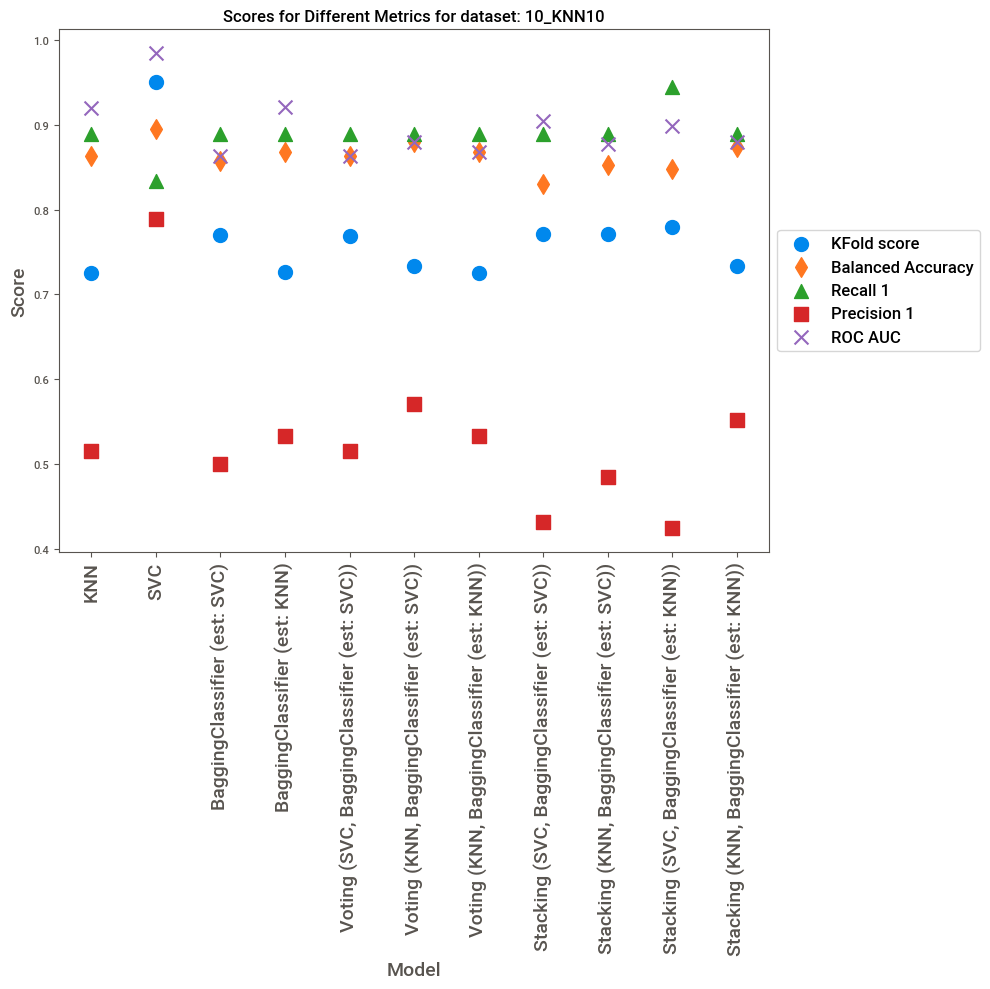

In [ ]:
import matplotlib.pyplot as plt

# Define the scores obtained from each metric
scores = {
    'KFold score': SUM_KFOLD,
    'Balanced Accuracy': SUM_BALANCED_ACCURACY,
    # 'F1 score 0, 1': SUM_F1_0_1,
    'Recall 1': SUM_RECALL_1,
    'Precision 1': SUM_PRECISION_1,
    'ROC AUC': SUM_ROC_AUC
}

# Define point styles and sizes for the metrics
point_styles = ['o', 'd', '^', 's', 'x']  # Different point styles for each metric
point_sizes = [100, 100, 100, 100, 100]  # Adjustable point sizes for each style

# Create a scatter plot for each metric
plt.figure(figsize=(10, 10))
for i, (metric, data) in enumerate(scores.items()):
    plt.scatter(range(len(data)), data['10_KNN10'], label=f'{metric}', marker=point_styles[i], s=point_sizes[i])

plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Scores for Different Metrics for dataset: 10_KNN10')
plt.xticks(range(len(data)), data.index, rotation=90, fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
plt.show()


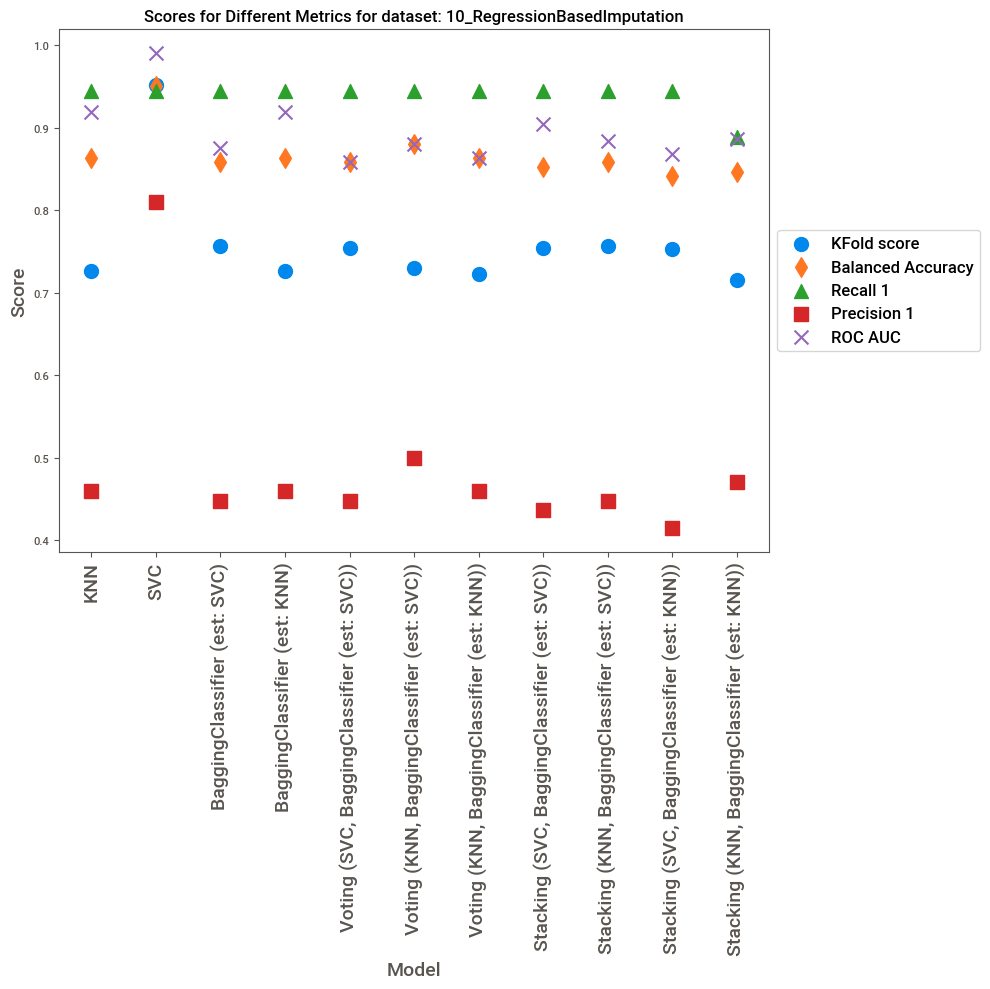

In [ ]:
import matplotlib.pyplot as plt

# Define the scores obtained from each metric
scores = {
    'KFold score': SUM_KFOLD,
    'Balanced Accuracy': SUM_BALANCED_ACCURACY,
    # 'F1 score 0, 1': SUM_F1_0_1,
    'Recall 1': SUM_RECALL_1,
    'Precision 1': SUM_PRECISION_1,
    'ROC AUC': SUM_ROC_AUC
}

# Define point styles and sizes for the metrics
point_styles = ['o', 'd', '^', 's', 'x']  # Different point styles for each metric
point_sizes = [100, 100, 100, 100, 100]  # Adjustable point sizes for each style

# Create a scatter plot for each metric
plt.figure(figsize=(10, 10))
for i, (metric, data) in enumerate(scores.items()):
    plt.scatter(range(len(data)), data['10_RegressionBasedImputation'], label=f'{metric}', marker=point_styles[i], s=point_sizes[i])

plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Scores for Different Metrics for dataset: 10_RegressionBasedImputation')
plt.xticks(range(len(data)), data.index, rotation=90, fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
plt.show()


# Validation by gender

### Read dataset

In [ ]:
import pandas as pd

# Actual file path of the CSV file
file_path_10 = 'DF_less_10.csv'

# Read the CSV file into a DataFrame
df_less_10 = pd.read_csv(file_path_10)

In [ ]:
# Drop column "Identifiers"
df_less_10 = df_less_10.drop(columns=["Identifiers"], axis='columns')

### Selecting validation dataset

In [ ]:
import pandas as pd
import numpy as np

# Shuffle the dataset
df_shuffled = df_less_10.sample(frac=1, random_state=42)  # Random state for reproducibility

# Calculate the number of rows for 10% of the dataset
num_samples = int(len(df_less_10) * 0.1)

# Select 20% of the dataset
df_validation = df_shuffled.head(num_samples)

# Remaining dataset after selecting 10%
df_tt = df_shuffled.tail(len(df_less_10) - num_samples)

# # Save the selected and remaining datasets
# df_selected.to_csv('selected_data.csv', index=False)
# df_remaining.to_csv('remaining_data.csv', index=False)


#### Split Validation dataset by Gender

In [ ]:
import pandas as pd

df_F_val = df_validation[df_validation['Gender_dummy'] == 1]
df_M_val = df_validation[df_validation['Gender_dummy'] == 0]

print(f"Original dataset shape: {df_less_10.shape}")
print(f"Validation dataset shape: {df_validation.shape}")
print(f"Validation Female dataset shape: {df_F_val.shape}")
print(f"Validation Male dataset shape: {df_M_val.shape}")

Original dataset shape: (550, 11)
Validation dataset shape: (55, 11)
Validation Female dataset shape: (27, 11)
Validation Male dataset shape: (28, 11)


In [ ]:
X_F_val = df_F_val.drop(columns=['V24_Dx_Dummy'], axis='columns')
y_F_val = df_F_val['V24_Dx_Dummy']

X_M_val = df_M_val.drop(columns=['V24_Dx_Dummy'], axis='columns')
y_M_val = df_M_val['V24_Dx_Dummy']

In [ ]:
print(f"X Validation Female dataset shape: {X_F_val.shape}")
print(f"y Validation Female dataset shape: {y_F_val.shape}")
print(f"X Validation Male dataset shape: {X_M_val.shape}")
print(f"y Validation Male dataset shape: {y_M_val.shape}")

X Validation Female dataset shape: (27, 10)
y Validation Female dataset shape: (27,)
X Validation Male dataset shape: (28, 10)
y Validation Male dataset shape: (28,)


### Split non-valiation dataset into train-test sets

In [ ]:
from sklearn.model_selection import train_test_split

def split_dataframe(df):
    # Target Feature
    y = df['V24_Dx_Dummy']
    print("y_shape: ", y.shape)
    print(" ")

    # Feature columns
    X = df.drop(columns=['V24_Dx_Dummy'], axis='columns')
    print("X_shape: ", X.shape)
    print(" ")

    # Train and Test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [ ]:
# Split datasets
X_train, X_test, y_train, y_test = split_dataframe(df_tt)

y_shape:  (495,)
 
X_shape:  (495, 10)
 


### Handling missing values

#### Split dataset into train/test sets

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from fancyimpute import SoftImpute  # For SVD imputation

# Datasets with missing values and their original names
train_data_dict = {'X_train': X_train}
test_data_dict = {'X_test': X_test, 'X_F_val_10': X_F_val, 'X_M_val_10': X_M_val}

# Imputation techniques
imput_list = [
    ('Regression-Based Imputation', IterativeImputer(max_iter=15, random_state=42))
    ]

# Dictionary to store imputed datasets
imputed_train_datasets = {}
imputed_test_datasets = {}

# List to store new dataset names
new_train_dataset_names = []
new_test_dataset_names = []

# Fit imputer on the train data
imputer = KNNImputer(n_neighbors=10)  # Change to the desired imputer
imputer.fit(X_train)

# Apply imputation techniques to the train and test datasets simultaneously
for (train_name, train_data) in train_data_dict.items():
    for imput_name, imputer in imput_list:
        # Impute train data
        imputed_train_data = imputer.fit_transform(train_data)

        # Convert numpy array back to DataFrame
        imputed_train_df = pd.DataFrame(imputed_train_data, columns=train_data.columns)

        # Store the imputed DataFrame in the dictionary
        imputed_train_datasets[(train_name, imput_name)] = imputed_train_df

        # Save the imputed DataFrame to CSV
        new_train_dataset_name = f"Imputed_less10_{train_name}_{imput_name}.csv"
        imputed_train_df.to_csv(new_train_dataset_name, index=False)
        new_train_dataset_names.append(new_train_dataset_name)

        # Impute test data
        for (test_name, test_data) in test_data_dict.items():
            imputed_test_data = imputer.transform(test_data)

            # Convert numpy array back to DataFrame
            imputed_test_df = pd.DataFrame(imputed_test_data, columns=test_data.columns)

            # Store the imputed DataFrame in the dictionary
            imputed_test_datasets[(test_name, imput_name)] = imputed_test_df

            # Save the imputed DataFrame to CSV
            new_test_dataset_name = f"Imputed_less10_{test_name}_{imput_name}.csv"
            imputed_test_df.to_csv(new_test_dataset_name, index=False)
            new_test_dataset_names.append(new_test_dataset_name)


# Print list of all new TRAIN dataset names
print("\nList of all new TRAIN dataset names:")
for name in new_train_dataset_names:
    print(name)

# Print list of all new TEST dataset names
print("\nList of all new TEST dataset names:")
for name in new_test_dataset_names:
    print(name)



List of all new TRAIN dataset names:
Imputed_less10_X_train_Regression-Based Imputation.csv

List of all new TEST dataset names:
Imputed_less10_X_test_Regression-Based Imputation.csv
Imputed_less10_X_F_val_10_Regression-Based Imputation.csv
Imputed_less10_X_M_val_10_Regression-Based Imputation.csv


In [ ]:
import pandas as pd

# List of imputed dataset names
imput_train_dataset_names = [
                            "Imputed_less10_X_train_Regression-Based Imputation.csv",
                            ]

imput_test_dataset_names = [
                            "Imputed_less10_X_test_Regression-Based Imputation.csv",
                            "Imputed_less10_X_F_val_10_Regression-Based Imputation.csv",
                            "Imputed_less10_X_M_val_10_Regression-Based Imputation.csv"
                            ]


# Dictionary to store DataFrames
imputed_train_datasets = {}
imputed_test_datasets = {}

# Read all files and store DataFrames in the dictionary
for filename in imput_train_dataset_names:
    df_name = filename.split('.')[0]  # Extract DataFrame name from filename
    df = pd.read_csv(filename)
    imputed_train_datasets[df_name] = df

# Read all files and store DataFrames in the dictionary
for filename in imput_test_dataset_names:
    df_name = filename.split('.')[0]  # Extract DataFrame name from filename
    df = pd.read_csv(filename)
    imputed_test_datasets[df_name] = df

In [ ]:
# Accessing the TRAIN DataFrames
Imp_X_train = imputed_train_datasets["Imputed_less10_X_train_Regression-Based Imputation"]

# Accessing the TEST DataFrames
Imp_X_test = imputed_test_datasets["Imputed_less10_X_test_Regression-Based Imputation"]
Imp_X_F_val = imputed_test_datasets["Imputed_less10_X_F_val_10_Regression-Based Imputation"]
Imp_X_M_val = imputed_test_datasets["Imputed_less10_X_M_val_10_Regression-Based Imputation"]

In [ ]:
# Datasets list
X_train_list = [
                Imp_X_train, Imp_X_train, Imp_X_train,
                ]

y_train_list = [
                y_train, y_train, y_train,
                ]

X_test_list = [
                Imp_X_test, Imp_X_F_val, Imp_X_M_val,
                ]

y_test_list = [
                y_test, y_F_val, y_M_val,
                ]


### Balancing dataset

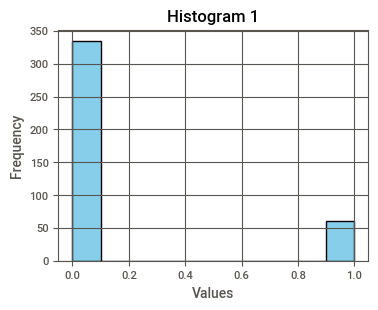

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example list of dataframes
list_of_dfs = [y_train]

# Plotting histograms for each dataframe in the list
for i, df in enumerate(list_of_dfs):
    plt.figure(figsize=(4, 3))
    plt.hist(df, bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram {i+1}')
    plt.grid(True)
    plt.show()


#### Synthehtic data generation to overcome imbalanced target feature

SMOTE:
Synthetic Minority Over-sampling Technique for Nominal and Continuous - for datasets with numerical and categorical features.

In [ ]:
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

def oversampling(algorithm, X_train, X_test, y_train, y_test):
    # Apply oversample algorithm to the training data
    oversample = algorithm(random_state=42)
    X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)
    X_train_oversampled_shape = X_train_oversampled.shape
    y_train_oversampled_shape = y_train_oversampled.shape

    # # Create and display a bar plot for class distribution
    # y_train_oversample.value_counts(normalize=True).plot.bar(title='Class Distribution After oversampling')
    # plt.show()

    # Dummy Classifier on dataset
    dummy_classifier = DummyClassifier()
    dummy_classifier.fit(X_train_oversampled, y_train_oversampled)
    y_pred_Dummy_oversample = dummy_classifier.predict(X_test)

    # Calculate and print the accuracy score
    score_Dummy_oversample = dummy_classifier.score(X_test, y_test)

    print(f"{name}_{algorithm.__name__}")
    print("X_train oversampled shape", X_train_oversampled_shape)
    print("y_train oversampled shape", y_train_oversampled_shape)
    print("DummyClassifier score: ", score_Dummy_oversample)
    print(" ")

    # return X_train_oversampled_shape, y_train_oversampled_shape, y_pred_Dummy_oversample, score_Dummy_oversample, X_train_oversampled, y_train_oversampled
    return X_train_oversampled, y_train_oversampled, X_train_oversampled.shape, y_train_oversampled.shape


In [ ]:
from imblearn.over_sampling import SMOTE

# List of oversampling algorithms to test
oversampling_algorithms = [SMOTE]

# Dictionary of train/test datasets
datasets = {
    "Test Dataset": {'X_train': Imp_X_train, 'y_train': y_train, 'X_test': Imp_X_test, 'y_test': y_test},
    "Female Validation Dataset": {'X_train': Imp_X_train, 'y_train': y_train, 'X_test': Imp_X_F_val, 'y_test': y_F_val},
    "Male Validation Dataset": {'X_train': Imp_X_train, 'y_train': y_train, 'X_test': Imp_X_M_val, 'y_test': y_M_val},
}

# Create a dictionary to store the oversampled datasets
oversampled_datasets = {}

# Run oversampling for each algorithm and dataset
for algorithm in oversampling_algorithms:
    print(f"Running Oversampling for Algorithm: {algorithm.__name__}")
    for name, data in datasets.items():
        X_train_oversampled, y_train_oversampled, _, _ = oversampling(algorithm, data['X_train'], data['X_test'], data['y_train'], data['y_test'])
        dataset_name = f"{name}_{algorithm.__name__}_oversampled"
        oversampled_datasets[dataset_name] = (X_train_oversampled, y_train_oversampled)

Running Oversampling for Algorithm: SMOTE
Test Dataset_SMOTE
X_train oversampled shape (670, 10)
y_train oversampled shape (670,)
DummyClassifier score:  0.8181818181818182
 
Female Validation Dataset_SMOTE
X_train oversampled shape (670, 10)
y_train oversampled shape (670,)
DummyClassifier score:  0.8888888888888888
 
Male Validation Dataset_SMOTE
X_train oversampled shape (670, 10)
y_train oversampled shape (670,)
DummyClassifier score:  0.7857142857142857
 


## Modeling on dataset with <10% missing values

### Training datasets

In [ ]:
# Recall all oversampled datasets
X_train_list = []
y_train_list = []

for name, data in datasets.items():
    for algorithm in oversampling_algorithms:
        dataset_name = f"{name}_{algorithm.__name__}_oversampled"
        X_train, y_train = oversampled_datasets[dataset_name]
        X_train_list.append(X_train)
        y_train_list.append(y_train)


### Test datasets

In [ ]:
# Test datasets lists
X_test_list = [Imp_X_test, Imp_X_F_val, Imp_X_M_val
               ]


y_test_list = [ y_test, y_F_val, y_M_val
                ]

In [ ]:
import numpy as np

# Convert datasets into arrays
def array_process_datasets(dataset_list):
    X_train_list = []
    y_train_list = []
    X_test_list = []
    y_test_list = []

    for dataset in dataset_list:
        # Convert to NumPy arrays if they are not already
        X_train = np.array(dataset['X_train'])
        y_train = np.array(dataset['y_train'])
        X_test = np.array(dataset['X_test'])
        y_test = np.array(dataset['y_test'])

        X_train_list.append(X_train)
        y_train_list.append(y_train)
        X_test_list.append(X_test)
        y_test_list.append(y_test)

    return X_train_list, y_train_list, X_test_list, y_test_list

In [ ]:
# Array datasts:
array_dataset_list = [
    {'X_train': X_train_list[0], 'y_train': y_train_list[0], 'X_test': Imp_X_test, 'y_test': y_test},
    {'X_train': X_train_list[0], 'y_train': y_train_list[0], 'X_test': Imp_X_F_val, 'y_test': y_F_val},
    {'X_train': X_train_list[0], 'y_train': y_train_list[0], 'X_test': Imp_X_M_val, 'y_test': y_M_val},
]

X_train_list, y_train_list, X_test_list, y_test_list = array_process_datasets(array_dataset_list)


In [ ]:
# Datasets Name lists

modeling_data_list = [
                        "Test Dataset",
                        "Female Validation Dataset",
                        "Male Validation Dataset",
]


### Dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

def Dummy_model(modeling_data, X_train, y_train, X_test, y_test):
    dummy = DummyClassifier(strategy= "most_frequent", random_state = 0)
    score_Dummy = []
    for i in range(0,len(X_train)):
        dummy = dummy.fit(X_train[i], y_train[i])
        score_dummy = dummy.score(X_train[i], y_train[i])
        score_Dummy.append(score_dummy)
        y_pred_Dummy = dummy.predict(X_test[i])
    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Dummy score'] = score_Dummy
    return Summary

In [ ]:
Dummy_summary = Dummy_model(modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Dummy_summary

dataset  Dummy score
0               Test Dataset          0.5
1  Female Validation Dataset          0.5
2    Male Validation Dataset          0.5

### KNN classifier

Max KNN scores is 0.7878787878787878 for k_neighbors: 2



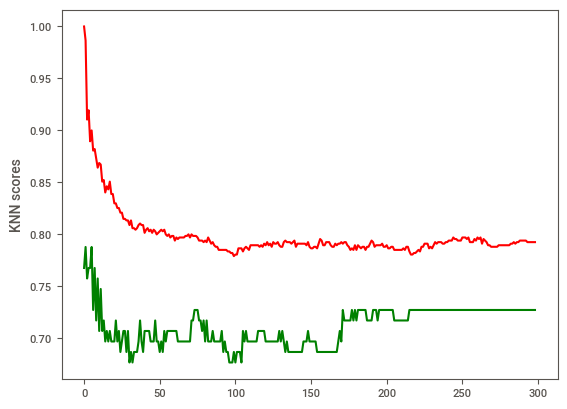

In [ ]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Train the model for various depths - FOR loop
score_KNN_ = []
score_KNN_train_ = []
for k in range(1,300):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn_model.fit(X_train_list[0], y_train_list[0])
    y_pred_KNN_ = knn_model.predict(Imp_X_test)
    #Evaluate the model (Accuracy)
    score_knn = metrics.accuracy_score(y_test, y_pred_KNN_)
    score_KNN_.append(score_knn)
    #Check accuracy on train data (NOT VALID!)
    score_knn_train = metrics.accuracy_score(y_train_list[0], knn_model.predict(X_train_list[0]))
    score_KNN_train_.append(score_knn_train)
    KNN_dict = {k+1:v for k,v in enumerate(score_KNN_)}
    opt_n_neighbors_ = max(KNN_dict, key=KNN_dict.get)

print(f"Max KNN scores is {max(score_KNN_)} for k_neighbors: {opt_n_neighbors_}")
print()

plt.plot(score_KNN_, color="g", label='Acc. on test')
plt.plot(score_KNN_train_, color="r", label='Acc. on train')
plt.ylabel('KNN scores');

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def KNN_model(dataset_list, N_neighbors, X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=N_neighbors)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []

    plt.figure(figsize=(15, 10))

    for i in range(0, len(X_train)):
        # Fit model
        KNN = knn.fit(X_train[i], y_train[i])
        y_pred = KNN.predict(X_test[i])
        y_prob = KNN.predict_proba(X_test[i])[:, 1]  # Get probability scores for the positive class

        accuracy_test_ = metrics.accuracy_score(y_test[i], y_pred)
        accuracy_train_ = metrics.accuracy_score(y_train[i], KNN.predict(np.ascontiguousarray(X_train[i])))

        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')

        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)

        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(KNN, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    Summary = pd.DataFrame()
    Summary['dataset'] = dataset_list
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc

    return Summary, knn


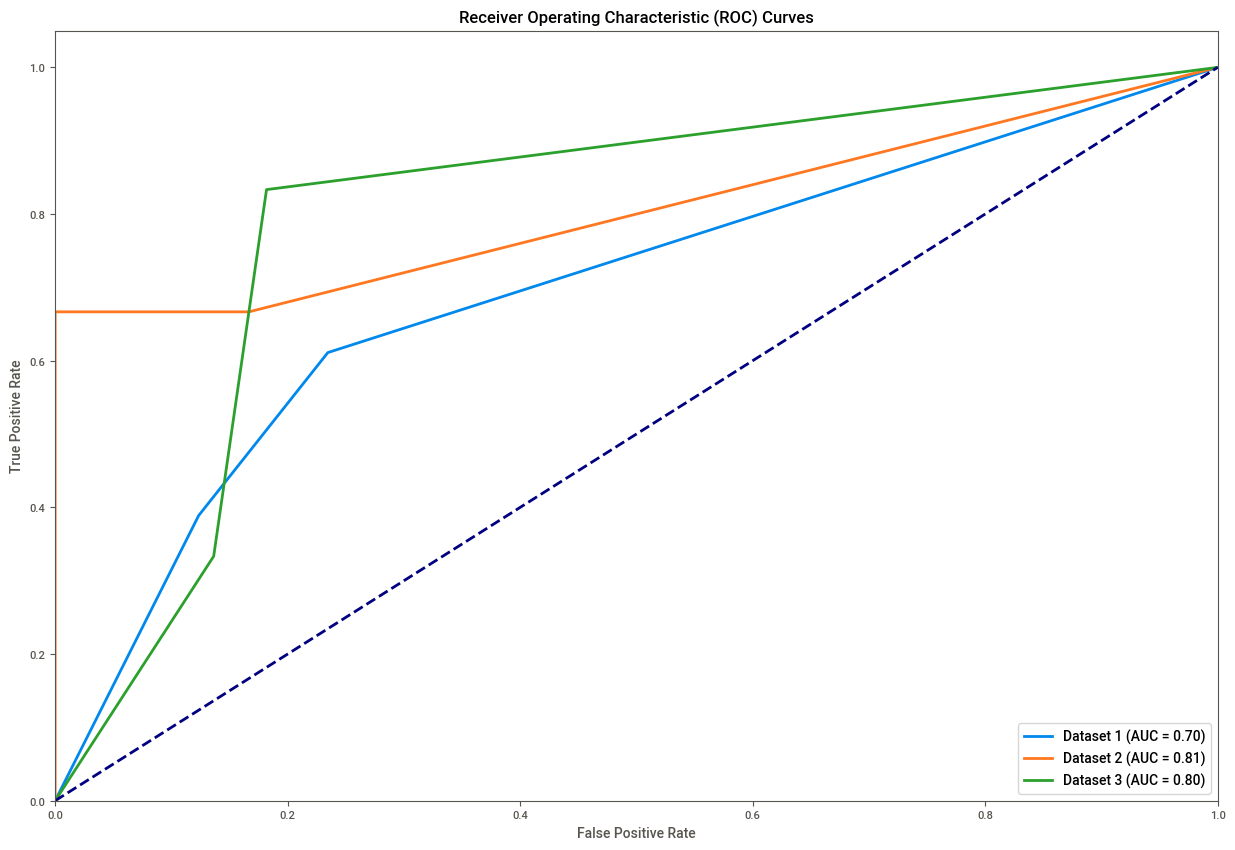

dataset  Accuracy on test  Accuracy on train  \
0               Test Dataset          0.787879           0.986567   
1  Female Validation Dataset          0.962963           0.986567   
2    Male Validation Dataset          0.750000           0.986567   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.876119           0.632716     0.865854     0.411765  0.876543   
1     0.876119           0.833333     0.960000     1.000000  1.000000   
2     0.876119           0.598485     0.826087     0.400000  0.863636   

   Recall 1                              F1 score 0, 1  F1 micro  F1 weighted  \
0  0.388889  [0.8711656441717791, 0.39999999999999997]  0.787879     0.785499   
1  0.666667                  [0.9795918367346939, 0.8]  0.962963     0.959637   
2  0.333333   [0.8444444444444444, 0.3636363636363636]  0.750000     0.741414   

    ROC AUC  
0  0.696159  
1  0.805556  
2  0.799242

In [ ]:
N = opt_n_neighbors_

KNN_summarry, knn = KNN_model(modeling_data_list, N, X_train_list, y_train_list, X_test_list, y_test_list)
KNN_summarry

### SVC Classifier

Max SVC scores is 0.9090909090909091 for C = 0.01, kernel = sigmoid and gamma = 0.001



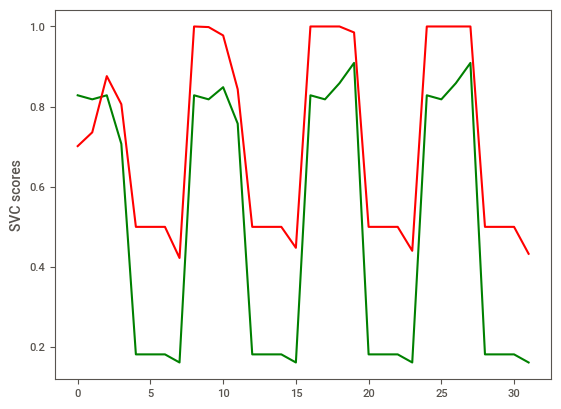

In [ ]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")


import itertools

from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

#Train the model for various depths - FOR loop
parameters = []
c_krn_g = [(0.001, 0.01, 0.1, 1, 10, 100), ('rbf', 'sigmoid'), (10, 1, 0.1, 0.01, 0.001)]
for i in itertools.product(*c_krn_g):
         parameters.append(i)


score_SVC_le = []
score_SVC_train_le = []
for c in [0.1, 1, 10, 100]:
    for krn in ['rbf', 'sigmoid']:
        for g in [1, 0.1, 0.01, 0.001]:
            svc_model_le = SVC(C=c, kernel =krn, gamma=g, random_state=0)
            svc_model_le = svc_model_le.fit(X_train_list[0], y_train_list[0])
            y_pred_svc_le = svc_model_le.predict(Imp_X_test)
            #Evaluate the model (Accuracy)
            score_svc = accuracy_score(y_test, y_pred_svc_le)
            score_SVC_le.append(score_svc)
            #Check accuracy on train data
            score_svc_train = accuracy_score(y_train_list[0], svc_model_le.predict(X_train_list[0]))
            score_SVC_train_le.append(score_svc_train)
            SVC_dict = {c+1:v for c,v in enumerate(score_SVC_le)}
            opt_parameters = max(SVC_dict, key=SVC_dict.get)
            opt_C = parameters[opt_parameters-1][0]
            opt_kernel = parameters[opt_parameters-1][1]
            opt_gamma = parameters[opt_parameters-1][2]

print(f"Max SVC scores is {max(score_SVC_le)} for C = {opt_C}, kernel = {opt_kernel} and gamma = {opt_gamma}")
print()

plt.plot(score_SVC_le, color="g", label='Acc. on test')
plt.plot(score_SVC_train_le, color="r", label='Acc. on train')
plt.ylabel('SVC scores');

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def SVC_model(dataset_list, c, Kernel, Gamma, X_train, y_train, X_test, y_test):
    svc = SVC(C=c, kernel=Kernel, gamma=Gamma, probability=True, random_state=0)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []

    plt.figure(figsize=(15, 10))

    for i in range(len(X_train)):
        # Fit model
        SVC_model = svc.fit(X_train[i], y_train[i])
        y_pred = SVC_model.predict(X_test[i])
        y_prob = SVC_model.predict_proba(X_test[i])[:, 1]  # Get probability scores for the positive class

        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], SVC_model.predict(X_train[i]))

        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')

        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)

        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(SVC_model, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    Summary = pd.DataFrame()
    Summary['dataset'] = dataset_list
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc

    return Summary, svc


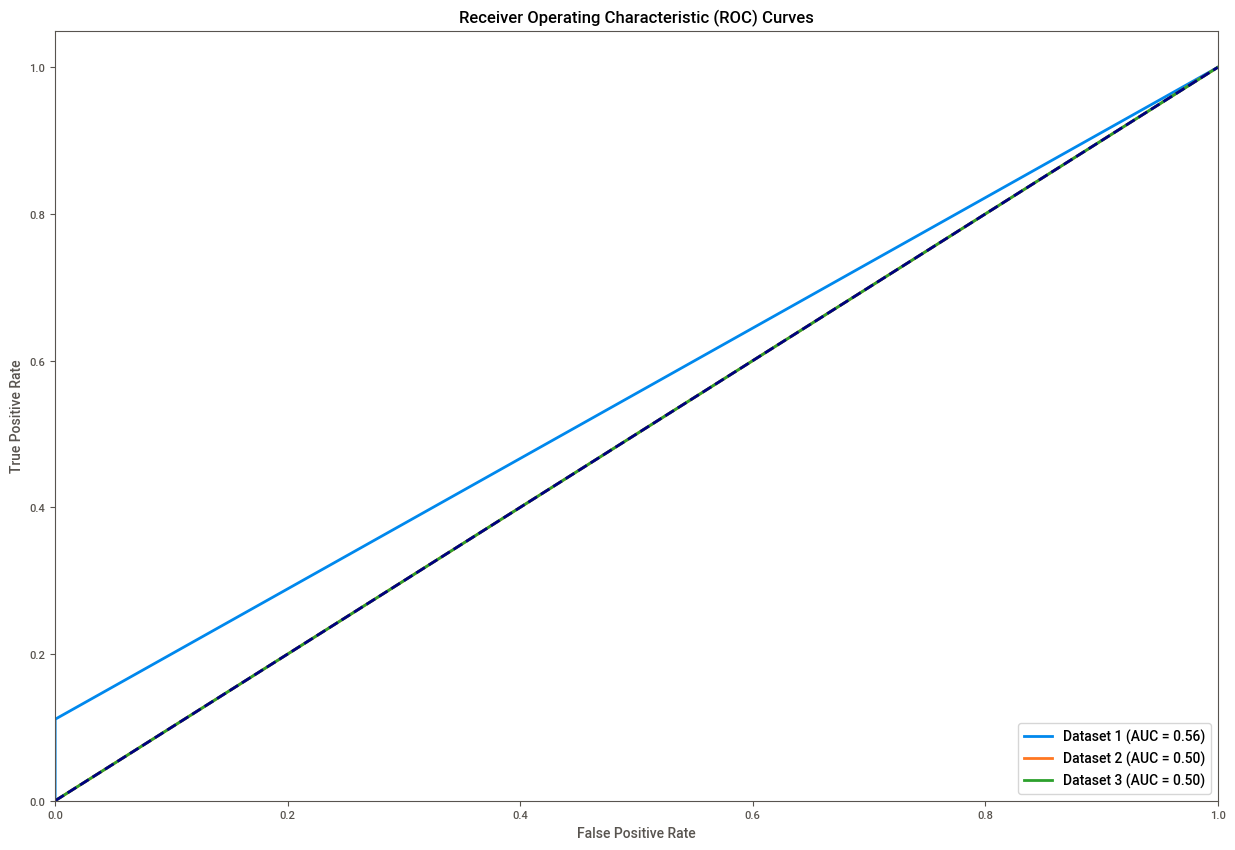

dataset  Accuracy on test  Accuracy on train  \
0               Test Dataset          0.161616           0.449254   
1  Female Validation Dataset          0.111111           0.449254   
2    Male Validation Dataset          0.214286           0.449254   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.462687           0.444444          0.0     0.164948       0.0   
1     0.462687           0.500000          0.0     0.111111       0.0   
2     0.462687           0.500000          0.0     0.214286       0.0   

   Recall 1               F1 score 0, 1  F1 micro  F1 weighted   ROC AUC  
0  0.888889  [0.0, 0.27826086956521734]  0.161616     0.050593  0.555556  
1  1.000000  [0.0, 0.19999999999999998]  0.111111     0.022222  0.500000  
2  1.000000  [0.0, 0.35294117647058826]  0.214286     0.075630  0.500000

In [ ]:
Dataset_list, C, Kernel, Gamma = modeling_data_list, opt_C, opt_kernel, opt_gamma

SVC_summarry, svc = SVC_model(Dataset_list, C, Kernel, Gamma, X_train_list, y_train_list, X_test_list, y_test_list)
SVC_summarry

### Bagging Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings("ignore")

def BaggingClassifier_model(estimator, modeling_data, X_train, y_train, X_test, y_test):
    bag = BaggingClassifier(base_estimator=estimator, n_estimators=10, random_state=0)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []

    plt.figure(figsize=(15, 10))

    for i in range(len(X_train)):
        # Fit model
        BAG = bag.fit(X_train[i], y_train[i])
        y_pred = BAG.predict(X_test[i])
        y_prob = BAG.predict_proba(X_test[i])[:, 1]  # Get probability scores for the positive class

        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], BAG.predict(X_train[i]))

        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')

        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)

        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(BAG, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc

    return Summary, bag


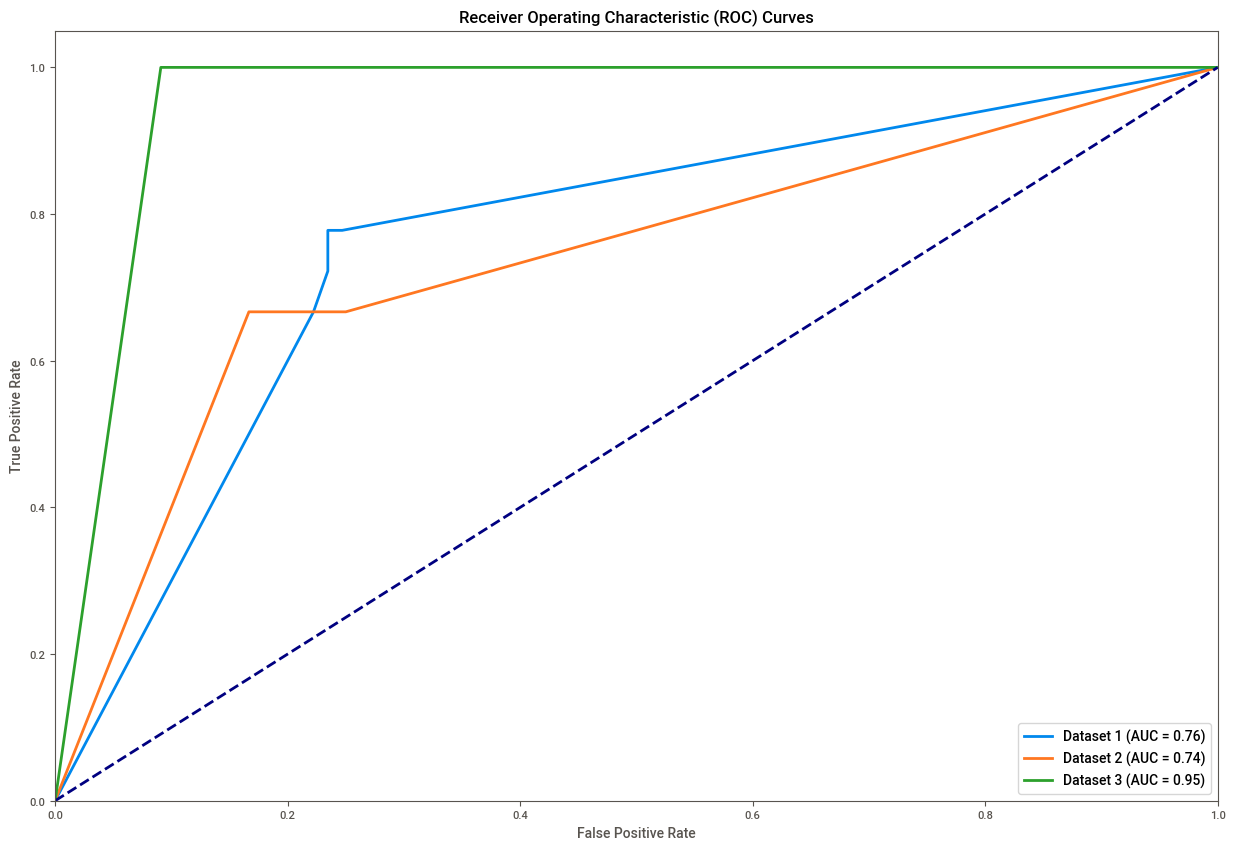

dataset  Accuracy on test  Accuracy on train  \
0               Test Dataset          0.767677           0.807463   
1  Female Validation Dataset          0.814815           0.807463   
2    Male Validation Dataset          0.785714           0.807463   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.797015           0.771605     0.939394     0.424242  0.765432   
1     0.797015           0.750000     0.952381     0.333333  0.833333   
2     0.797015           0.863636     1.000000     0.500000  0.727273   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.777778  [0.8435374149659863, 0.5490196078431373]  0.767677     0.789989   
1  0.666667   [0.888888888888889, 0.4444444444444444]  0.814815     0.839506   
2  1.000000  [0.8421052631578948, 0.6666666666666666]  0.785714     0.804511   

    ROC AUC  
0  0.761660  
1  0.736111  
2  0.954545

In [ ]:
from sklearn.svm import SVC

Estimator = SVC(random_state=0)

Bagging_summarry, bag = BaggingClassifier_model(Estimator, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Bagging_summarry

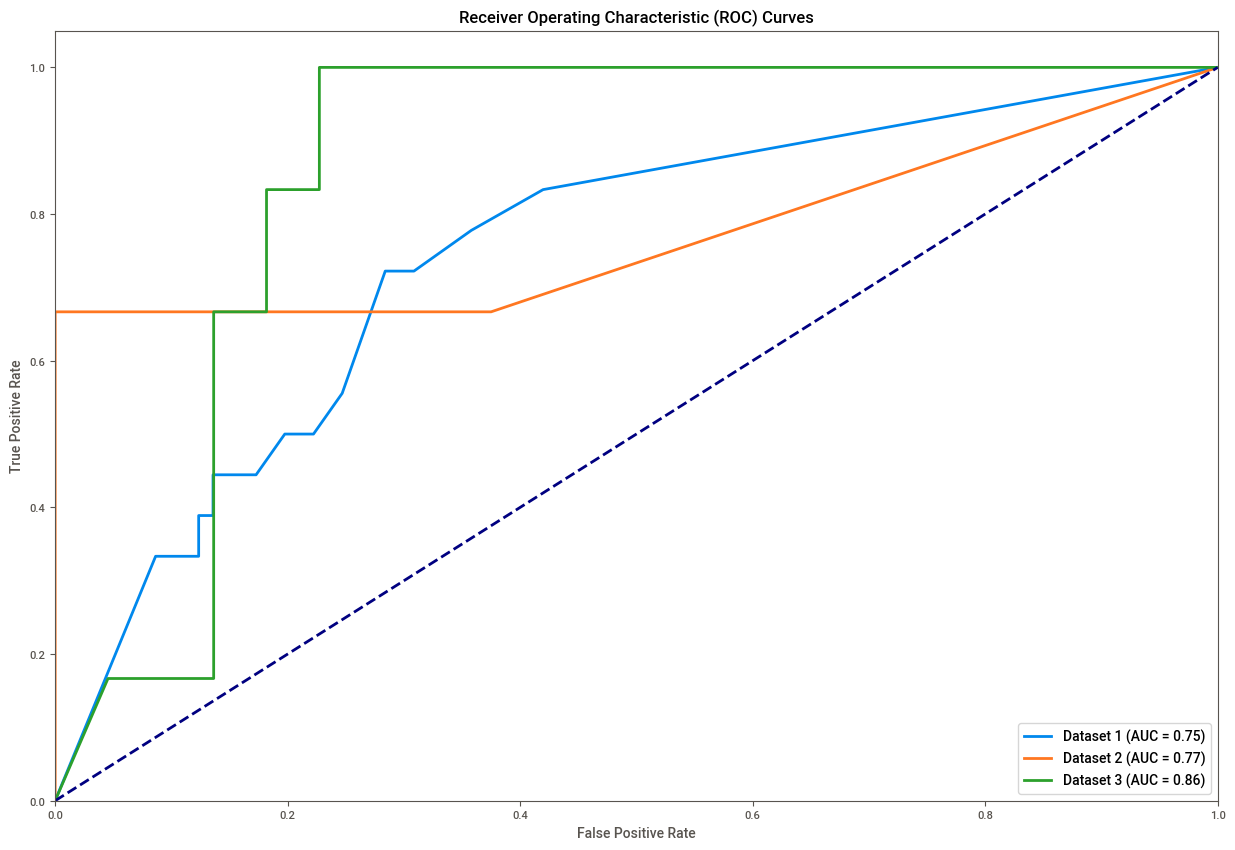

dataset  Accuracy on test  Accuracy on train  \
0               Test Dataset          0.757576           0.961194   
1  Female Validation Dataset          0.888889           0.961194   
2    Male Validation Dataset          0.821429           0.961194   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.879104           0.635802     0.870130     0.363636  0.827160   
1     0.879104           0.791667     0.956522     0.500000  0.916667   
2     0.879104           0.765152     0.904762     0.571429  0.863636   

   Recall 1                              F1 score 0, 1  F1 micro  F1 weighted  \
0  0.444444  [0.8481012658227849, 0.39999999999999997]  0.757576     0.766628   
1  0.666667   [0.9361702127659574, 0.5714285714285715]  0.888889     0.895643   
2  0.666667   [0.8837209302325582, 0.6153846153846153]  0.821429     0.826220   

    ROC AUC  
0  0.745199  
1  0.770833  
2  0.859848

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Estimator = KNeighborsClassifier(n_neighbors=opt_n_neighbors_)

Bagging_summarry_KNN, bag_knn = BaggingClassifier_model(Estimator, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Bagging_summarry_KNN

### Voting Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def VotingClassifier_model(C1, C2, Vote, modeling_data, X_train, y_train, X_test, y_test):
    voting = VotingClassifier(estimators=[(f'{C1}', C1), (f'{C2}', C2)], voting=Vote)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []

    plt.figure(figsize=(15, 10))

    for i in range(len(X_train)):
        # Fit model
        Voting = voting.fit(X_train[i], y_train[i])
        y_pred = Voting.predict(X_test[i])

        # Check if voting is 'soft' to get probabilities
        if Vote == 'soft':
            y_prob = Voting.predict_proba(X_test[i])[:, 1]
        else:
            # For 'hard' voting, we cannot get probabilities, hence using predictions for ROC curve
            y_prob = y_pred

        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], Voting.predict(X_train[i]))

        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')

        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)

        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(Voting, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc

    return Summary, voting


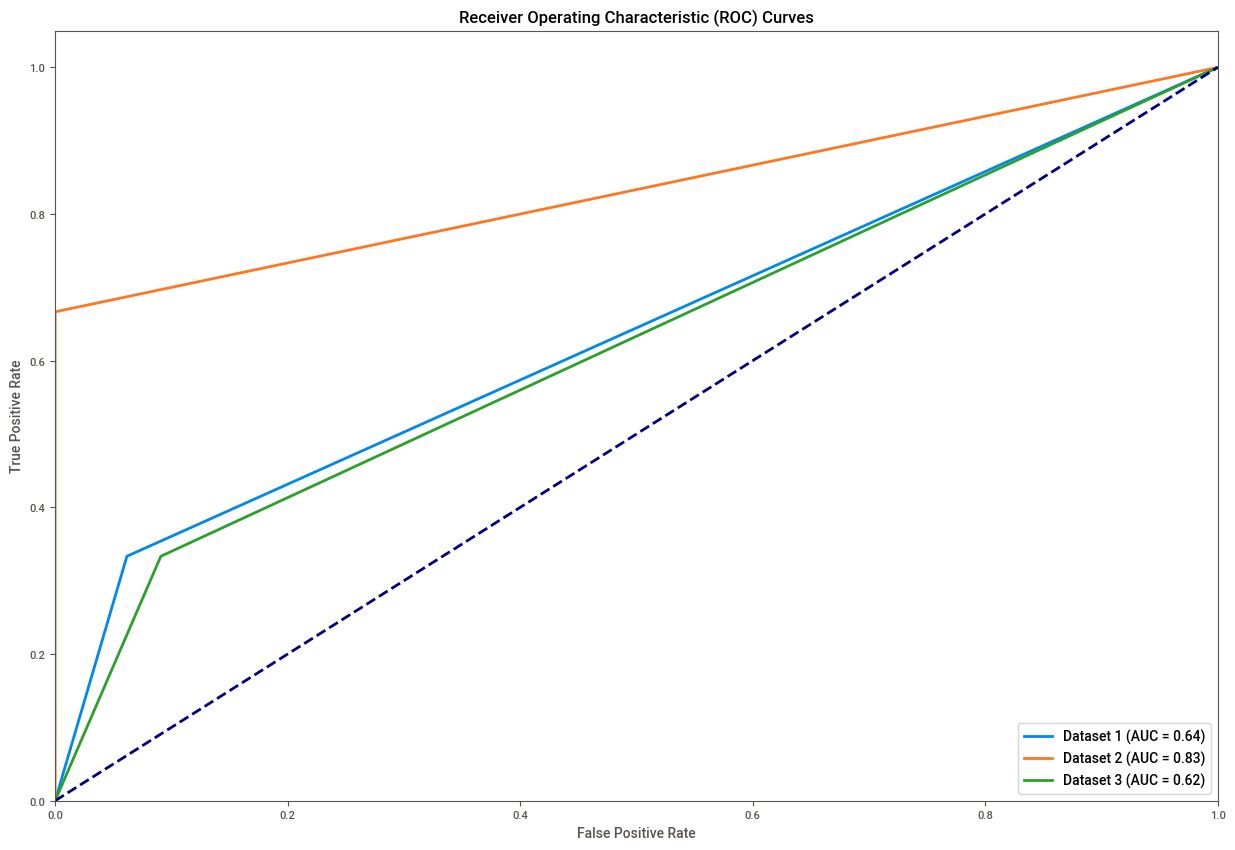

dataset  Accuracy on test  Accuracy on train  \
0               Test Dataset          0.828283           0.898507   
1  Female Validation Dataset          0.962963           0.898507   
2    Male Validation Dataset          0.785714           0.898507   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.828358           0.635802     0.863636     0.545455  0.938272   
1     0.828358           0.833333     0.960000     1.000000  1.000000   
2     0.828358           0.621212     0.833333     0.500000  0.909091   

   Recall 1                              F1 score 0, 1  F1 micro  F1 weighted  \
0  0.333333  [0.8994082840236687, 0.41379310344827586]  0.828283     0.811115   
1  0.666667                  [0.9795918367346939, 0.8]  0.962963     0.959637   
2  0.333333                  [0.8695652173913043, 0.4]  0.785714     0.768944   

    ROC AUC  
0  0.635802  
1  0.833333  
2  0.621212

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=opt_n_neighbors_)
clf2 = BaggingClassifier(base_estimator=SVC(random_state=0), random_state=0)
vote = ['hard']

Voting_summarry, voting = VotingClassifier_model(clf1, clf2, vote[0], modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Voting_summarry

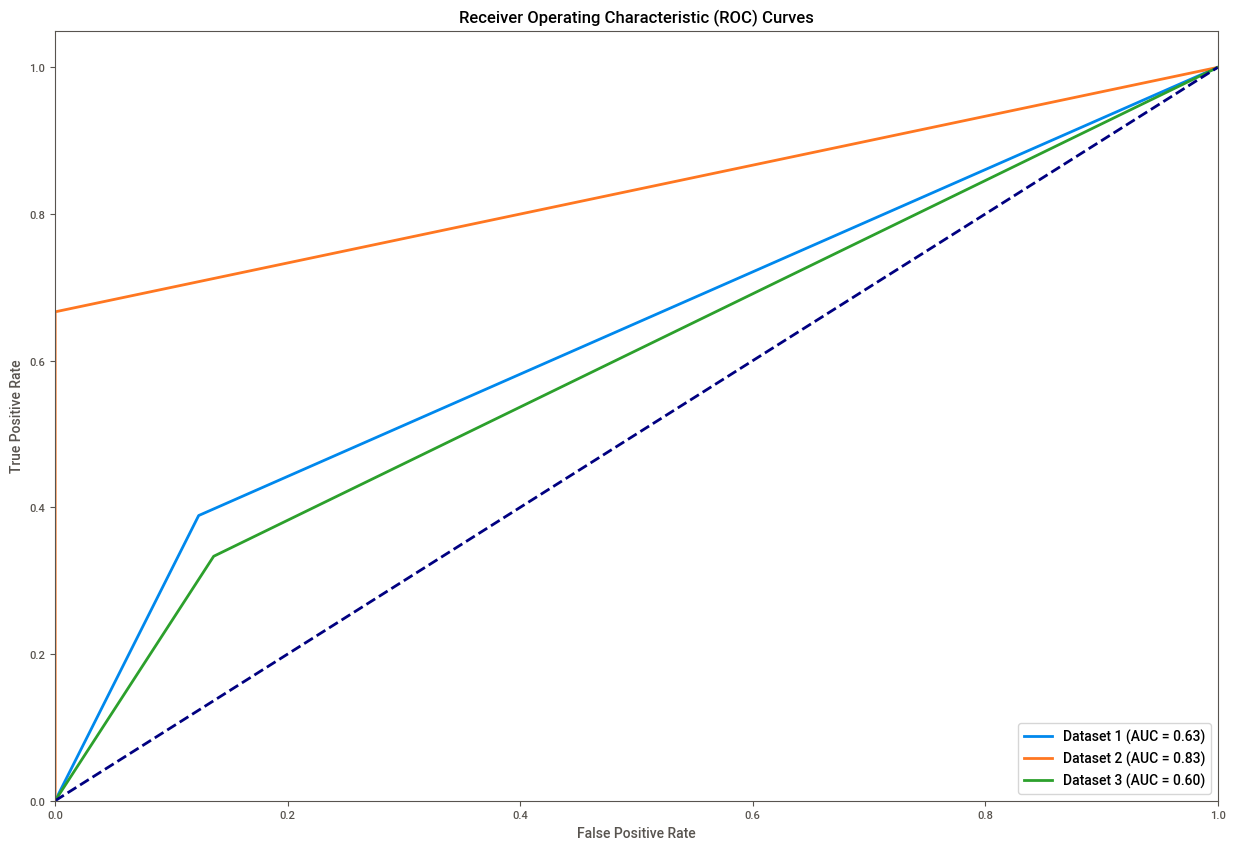

dataset  Accuracy on test  Accuracy on train  \
0               Test Dataset          0.787879           0.986567   
1  Female Validation Dataset          0.962963           0.986567   
2    Male Validation Dataset          0.750000           0.986567   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.876119           0.632716     0.865854     0.411765  0.876543   
1     0.876119           0.833333     0.960000     1.000000  1.000000   
2     0.876119           0.598485     0.826087     0.400000  0.863636   

   Recall 1                              F1 score 0, 1  F1 micro  F1 weighted  \
0  0.388889  [0.8711656441717791, 0.39999999999999997]  0.787879     0.785499   
1  0.666667                  [0.9795918367346939, 0.8]  0.962963     0.959637   
2  0.333333   [0.8444444444444444, 0.3636363636363636]  0.750000     0.741414   

    ROC AUC  
0  0.632716  
1  0.833333  
2  0.598485

In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=opt_n_neighbors_)
clf2_ = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=opt_n_neighbors_), random_state=0)
vote = ['hard']

Voting_summarry_, voting_ = VotingClassifier_model(clf1, clf2_, vote[0], modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Voting_summarry_

### Stacking Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

def StackingClassifier_model(C1, C2, modeling_data, X_train, y_train, X_test, y_test):
    stacking = StackingClassifier(estimators=[(f'{C1}', C1), (f'{C2}', C2)], final_estimator=C1)
    accuracy_train = []
    accuracy_test = []
    balanced_accuracy = []
    precision_0 = []
    precision_1 = []
    recall_0 = []
    recall_1 = []
    f1_score = []
    f1_micro = []
    f1_weighted = []
    roc_auc = []
    kf_scores = []

    plt.figure(figsize=(15, 10))

    for i in range(len(X_train)):
        # Fit model
        Stacking = stacking.fit(X_train[i], y_train[i])
        y_pred = Stacking.predict(X_test[i])

        # Check if final_estimator supports probability prediction
        if hasattr(Stacking, "predict_proba"):
            y_prob = Stacking.predict_proba(X_test[i])[:, 1]
        else:
            # If probability prediction is not available, use the decision function
            y_prob = Stacking.decision_function(X_test[i])

        accuracy_test_ = accuracy_score(y_test[i], y_pred)
        accuracy_train_ = accuracy_score(y_train[i], Stacking.predict(X_train[i]))

        # Performance Metrics and Evaluation
        balanced_accuracy_ = balanced_accuracy_score(y_test[i], y_pred)
        precision_0_ = metrics.precision_score(y_test[i], y_pred, pos_label=0)
        recall_0_ = metrics.recall_score(y_test[i], y_pred, pos_label=0)
        precision_1_ = metrics.precision_score(y_test[i], y_pred, pos_label=1)
        recall_1_ = metrics.recall_score(y_test[i], y_pred, pos_label=1)
        f1_score_ = metrics.f1_score(y_test[i], y_pred, average=None)
        f1_micro_ = metrics.f1_score(y_test[i], y_pred, average='micro')
        f1_weighted_ = metrics.f1_score(y_test[i], y_pred, average='weighted')

        # ROC curve
        fpr, tpr, _ = roc_curve(y_test[i], y_prob)
        roc_auc_ = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, lw=2, label=f'Dataset {i + 1} (AUC = {roc_auc_:.2f})')

        # Append all
        accuracy_train.append(accuracy_train_)
        accuracy_test.append(accuracy_test_)
        balanced_accuracy.append(balanced_accuracy_)
        precision_0.append(precision_0_)
        precision_1.append(precision_1_)
        recall_0.append(recall_0_)
        recall_1.append(recall_1_)
        f1_score.append(f1_score_)
        f1_micro.append(f1_micro_)
        f1_weighted.append(f1_weighted_)
        roc_auc.append(roc_auc_)

        # K-Fold
        kf = KFold(n_splits=10, shuffle=True, random_state=0)
        kf_scores_ = cross_val_score(Stacking, X_train[i], y_train[i], cv=kf)
        kf_scores.append(kf_scores_.mean())

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.show()

    Summary = pd.DataFrame()
    Summary['dataset'] = modeling_data
    Summary['Accuracy on test'] = accuracy_test
    Summary['Accuracy on train'] = accuracy_train
    Summary['KFold score'] = kf_scores
    Summary['Balanced Accuracy'] = balanced_accuracy
    Summary['Precision 0'] = precision_0
    Summary['Precision 1'] = precision_1
    Summary['Recall 0'] = recall_0
    Summary['Recall 1'] = recall_1
    Summary['F1 score 0, 1'] = f1_score
    Summary['F1 micro'] = f1_micro
    Summary['F1 weighted'] = f1_weighted
    Summary['ROC AUC'] = roc_auc

    return Summary, stacking


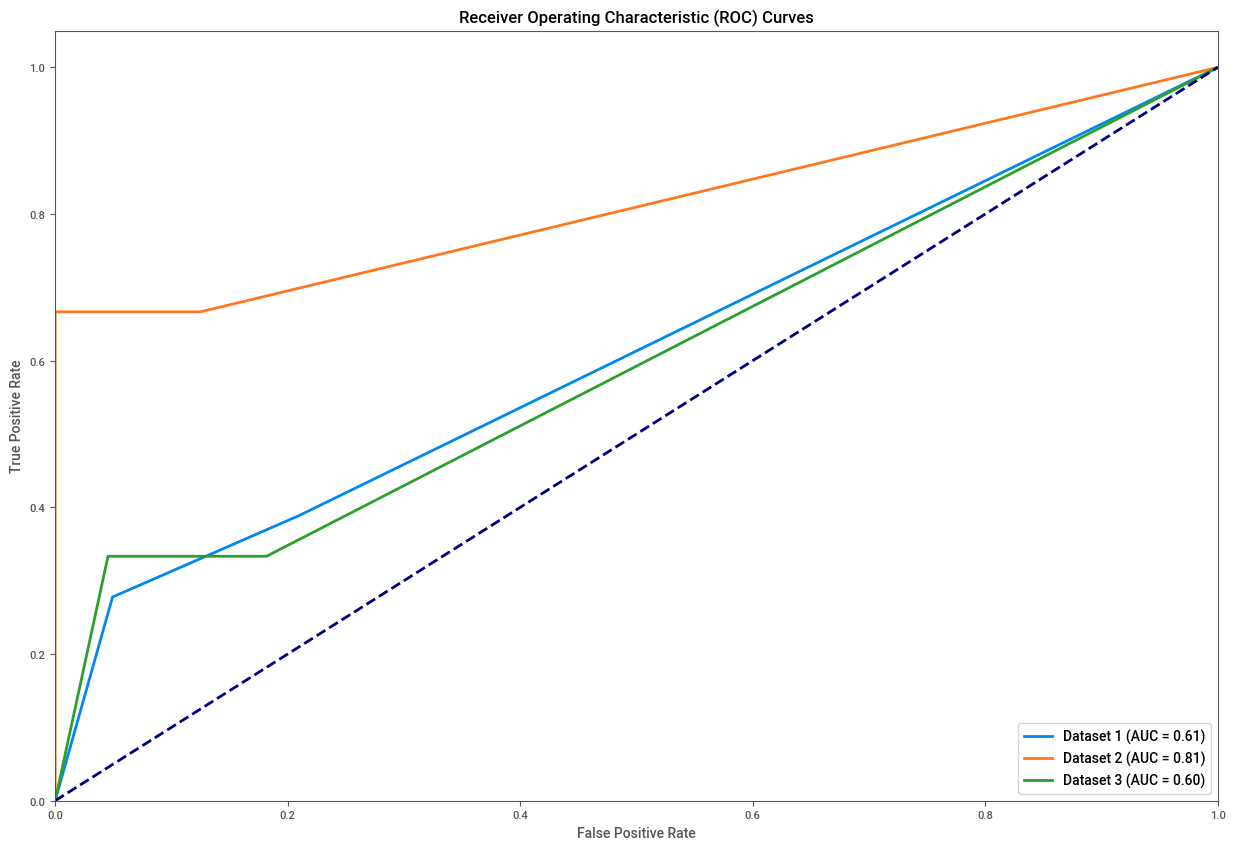

dataset  Accuracy on test  Accuracy on train  \
0               Test Dataset          0.828283           0.871642   
1  Female Validation Dataset          0.962963           0.871642   
2    Male Validation Dataset          0.821429           0.871642   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.674627           0.614198     0.855556     0.555556  0.950617   
1     0.674627           0.833333     0.960000     1.000000  1.000000   
2     0.674627           0.643939     0.840000     0.666667  0.954545   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.277778  [0.9005847953216374, 0.3703703703703704]  0.828283     0.804182   
1  0.666667                 [0.9795918367346939, 0.8]  0.962963     0.959637   
2  0.333333  [0.8936170212765958, 0.4444444444444444]  0.821429     0.797366   

    ROC AUC  
0  0.609053  
1  0.812500  
2  0.598485

In [ ]:
cl1 = KNeighborsClassifier(n_neighbors=opt_n_neighbors_)
cl2 = BaggingClassifier(base_estimator=SVC(random_state=0), random_state=0)

Stacking_summarry, stacking = StackingClassifier_model(cl1, cl2, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry

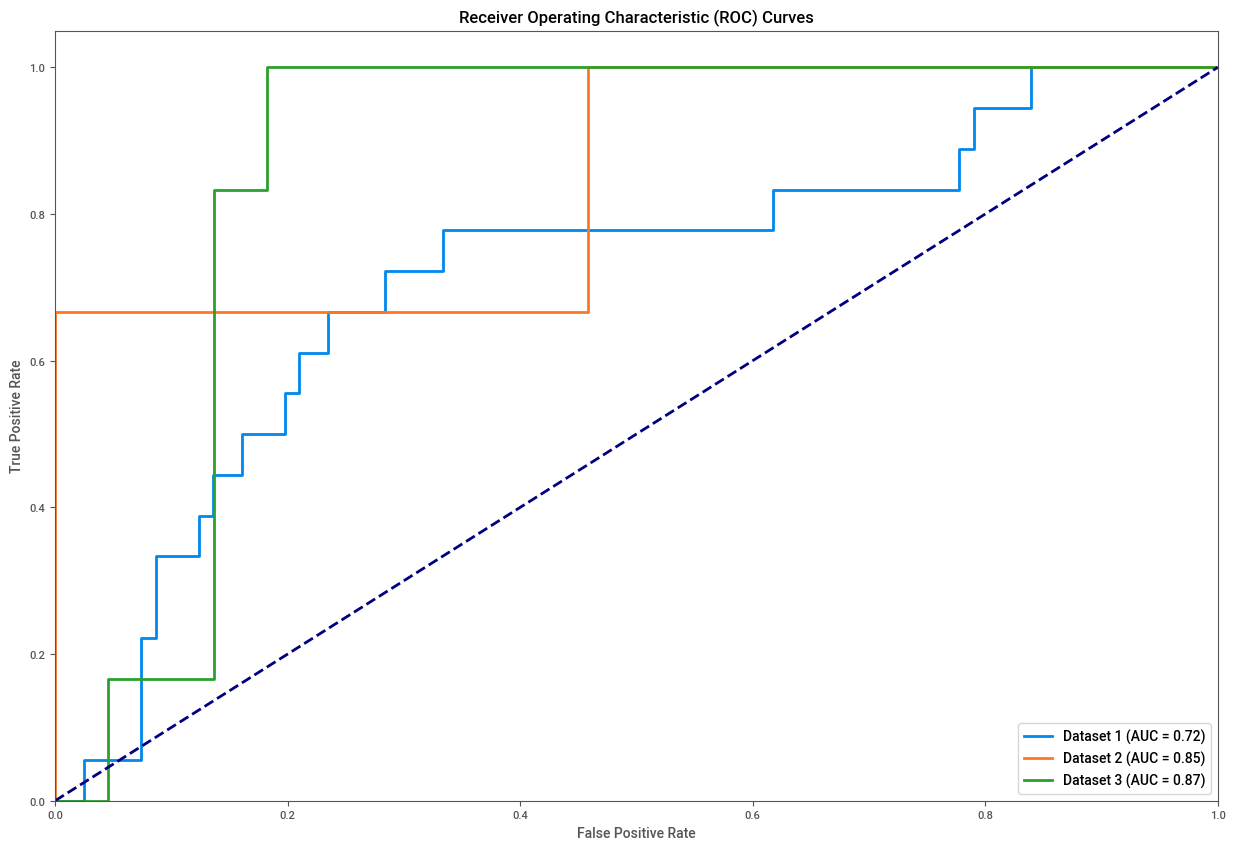

dataset  Accuracy on test  Accuracy on train  \
0               Test Dataset          0.777778           0.959701   
1  Female Validation Dataset          0.888889           0.959701   
2    Male Validation Dataset          0.821429           0.959701   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.874627           0.669753     0.883117     0.409091  0.839506   
1     0.874627           0.791667     0.956522     0.500000  0.916667   
2     0.874627           0.765152     0.904762     0.571429  0.863636   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.500000                 [0.860759493670886, 0.45]  0.777778     0.786076   
1  0.666667  [0.9361702127659574, 0.5714285714285715]  0.888889     0.895643   
2  0.666667  [0.8837209302325582, 0.6153846153846153]  0.821429     0.826220   

    ROC AUC  
0  0.715364  
1  0.847222  
2  0.871212

In [ ]:
cl1_ = SVC(random_state=0)
cl2_ = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=opt_n_neighbors_), random_state=0)

Stacking_summarry_, stacking_ = StackingClassifier_model(cl1_, cl2_, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry_

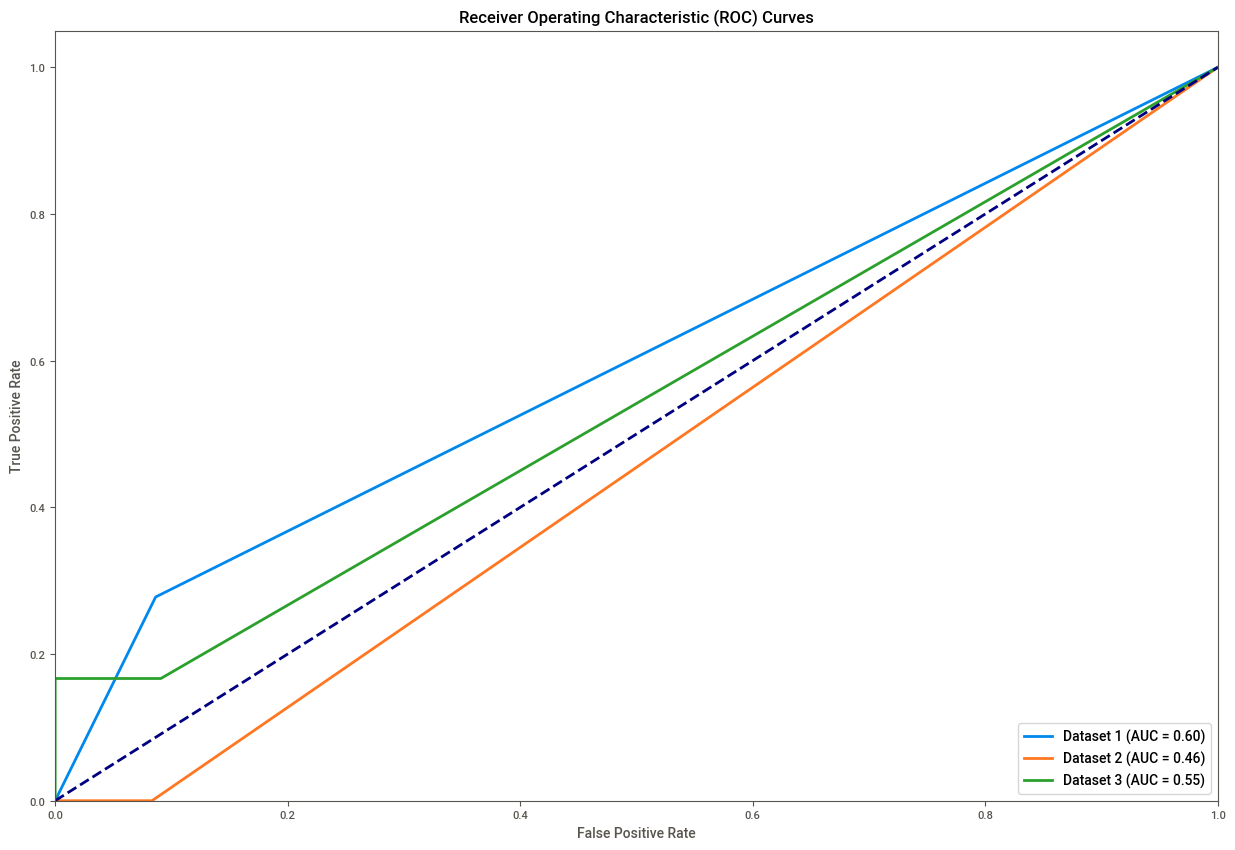

dataset  Accuracy on test  Accuracy on train  \
0               Test Dataset          0.818182           0.504478   
1  Female Validation Dataset          0.851852           0.504478   
2    Male Validation Dataset          0.821429           0.504478   

   KFold score  Balanced Accuracy  Precision 0  Precision 1  Recall 0  \
0     0.535821           0.500000     0.818182          0.0  1.000000   
1     0.535821           0.479167     0.884615          0.0  0.958333   
2     0.535821           0.583333     0.814815          1.0  1.000000   

   Recall 1                             F1 score 0, 1  F1 micro  F1 weighted  \
0  0.000000                                [0.9, 0.0]  0.818182     0.736364   
1  0.000000                 [0.9199999999999999, 0.0]  0.851852     0.817778   
2  0.166667  [0.8979591836734693, 0.2857142857142857]  0.821429     0.766764   

    ROC AUC  
0  0.595679  
1  0.458333  
2  0.545455

In [ ]:
cl1 = KNeighborsClassifier(n_neighbors=opt_n_neighbors_)
cl2_ = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=opt_n_neighbors_), random_state=0)

Stacking_summarry__, stacking__ = StackingClassifier_model(cl1, cl2_, modeling_data_list, X_train_list, y_train_list, X_test_list, y_test_list)
Stacking_summarry__

### Results Summary


Descriptioin of the evaluation metrics and their concepts, particularly focusing on their relevance when working with imbalanced datasets in predicting ASD in people.

1. **KFold Score**: This refers to the performance score obtained through k-fold cross-validation, where the dataset is divided into k subsets, and the model is trained and evaluated k times, using each subset as a testing set exactly once. KFold score provides an average performance across all folds, reducing the variance of the evaluation.

2. **Balanced Accuracy**: Balanced accuracy takes into account the imbalance in the dataset by calculating the average of recall obtained on each class. It is defined as the arithmetic mean of sensitivity (true positive rate) for each class.

3. **Precision 0**: Precision for class 0 (non-disease group) measures the proportion of true negative predictions among all instances predicted as negative. In the context of predicting ASD, it represents the accuracy of predicting individuals who do not have the disease.

4. **Precision 1**: Precision for class 1 (disease group) measures the proportion of true positive predictions among all instances predicted as positive. In the context of predicting ASD, it represents the accuracy of predicting individuals who actually have the disease.

5. **Recall 0**: Recall for class 0 (non-disease group) measures the proportion of true negative predictions among all actual negative instances. In the context of predicting ASD, it represents the ability to correctly identify individuals who do not have the disease.

6. **Recall 1**: Recall for class 1 (disease group) measures the proportion of true positive predictions among all actual positive instances. In the context of predicting ASD, it represents the ability to correctly identify individuals who actually have the disease.

7. **F1 Score**: F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is especially useful when there is an imbalance between the classes.

8. **F1 Micro**: F1 micro computes the F1 score globally by counting the total true positives, false negatives, and false positives. It treats all classes equally and is suitable for imbalanced datasets.

9. **F1 Weighted**: F1 weighted calculates the F1 score for each class independently and then takes the weighted average based on the number of instances of each class. It is useful when there is an imbalance between classes and you want to give more weight to the performance of the minority class.

10. **ROC AUC (Receiver Operating Characteristic - Area Under the Curve)**: ROC AUC represents the area under the ROC curve, which is a plot of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. It is suitable for evaluating binary classification models and is insensitive to class imbalance.


**Metrics to Follow for Imbalanced Datasets in Predicting ASD**:

- **Balanced Accuracy**: It gives a fair assessment of the model's performance by considering both classes equally, making it suitable for imbalanced datasets.
- **Precision 1, Recall 1, and F1 Score for Class 1**: Since the minority class (individuals with ASD) is of particular interest, metrics specifically focused on this class (precision, recall, and F1 score for class 1) should also be considered.
- **ROC AUC**: It is a reliable metric for evaluating binary classifiers, especially when dealing with imbalanced datasets, as it considers the trade-off between true positive rate and false positive rate across different thresholds.


#### KFold Score

In [ ]:
import pandas as pd

SUM_KFOLD_ = pd.DataFrame()

SUM_KFOLD_['KNN'] = KNN_summarry['KFold score']
SUM_KFOLD_['SVC'] = SVC_summarry['KFold score']
SUM_KFOLD_['BaggingClassifier (est: SVC)'] = Bagging_summarry['KFold score']
SUM_KFOLD_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['KFold score']

SUM_KFOLD_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['KFold score']
SUM_KFOLD_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['KFold score']

SUM_KFOLD_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['KFold score']
SUM_KFOLD_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['KFold score']
SUM_KFOLD_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['KFold score']

# Transpose the DataFrame
SUM_KFOLD = SUM_KFOLD_.T

# Rename the columns
SUM_KFOLD.columns = [
                    'Test Dataset',
                    'Female Validation Dataset',
                    'Male Validation Dataset'
                    ]

SUM_KFOLD

Test Dataset  \
KNN                                               0.876119   
SVC                                               0.462687   
BaggingClassifier (est: SVC)                      0.797015   
BaggingClassifier (est: KNN)                      0.879104   
Voting (KNN, BaggingClassifier (est: SVC))        0.828358   
Voting (KNN, BaggingClassifier (est: KNN))        0.876119   
Stacking (KNN, BaggingClassifier (est: SVC))      0.674627   
Stacking (SVC, BaggingClassifier (est: KNN))      0.874627   
Stacking (KNN, BaggingClassifier (est: KNN))      0.535821   

                                              Female Validation Dataset  \
KNN                                                            0.876119   
SVC                                                            0.462687   
BaggingClassifier (est: SVC)                                   0.797015   
BaggingClassifier (est: KNN)                                   0.879104   
Voting (KNN, BaggingClassifier (est: SVC))                     0.828358   
Voting (KNN, BaggingClassifier (est: KNN))                     0.876119   
Stacking (KNN, BaggingClassifier (est: SVC))                   0.674627   
Stacking (SVC, BaggingClassifier (est: KNN))                   0.874627   
Stacking (KNN, BaggingClassifier (est: KNN))                   0.535821   

                                              Male Validation Dataset  
KNN                                                          0.876119  
SVC                                                          0.462687  
BaggingClassifier (est: SVC)                                 0.797015  
BaggingClassifier (est: KNN)                                 0.879104  
Voting (KNN, BaggingClassifier (est: SVC))                   0.828358  
Voting (KNN, BaggingClassifier (est: KNN))                   0.876119  
Stacking (KNN, BaggingClassifier (est: SVC))                 0.674627  
Stacking (SVC, BaggingClassifier (est: KNN))                 0.874627  
Stacking (KNN, BaggingClassifier (est: KNN))                 0.535821

#### Balanced Accuracy

In [ ]:
import pandas as pd

SUM_BALANCED_ACCURACY_ = pd.DataFrame()

SUM_BALANCED_ACCURACY_['KNN'] = KNN_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['SVC'] = SVC_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['BaggingClassifier (est: SVC)'] = Bagging_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['Balanced Accuracy']

SUM_BALANCED_ACCURACY_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['Balanced Accuracy']

SUM_BALANCED_ACCURACY_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['Balanced Accuracy']
SUM_BALANCED_ACCURACY_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['Balanced Accuracy']

# Transpose the DataFrame
SUM_BALANCED_ACCURACY = SUM_BALANCED_ACCURACY_.T

# Rename the columns
SUM_BALANCED_ACCURACY.columns = [
                    'Test Dataset',
                    'Female Validation Dataset',
                    'Male Validation Dataset'
                    ]

SUM_BALANCED_ACCURACY

Test Dataset  \
KNN                                               0.632716   
SVC                                               0.444444   
BaggingClassifier (est: SVC)                      0.771605   
BaggingClassifier (est: KNN)                      0.635802   
Voting (KNN, BaggingClassifier (est: SVC))        0.635802   
Voting (KNN, BaggingClassifier (est: KNN))        0.632716   
Stacking (KNN, BaggingClassifier (est: SVC))      0.614198   
Stacking (SVC, BaggingClassifier (est: KNN))      0.669753   
Stacking (KNN, BaggingClassifier (est: KNN))      0.500000   

                                              Female Validation Dataset  \
KNN                                                            0.833333   
SVC                                                            0.500000   
BaggingClassifier (est: SVC)                                   0.750000   
BaggingClassifier (est: KNN)                                   0.791667   
Voting (KNN, BaggingClassifier (est: SVC))                     0.833333   
Voting (KNN, BaggingClassifier (est: KNN))                     0.833333   
Stacking (KNN, BaggingClassifier (est: SVC))                   0.833333   
Stacking (SVC, BaggingClassifier (est: KNN))                   0.791667   
Stacking (KNN, BaggingClassifier (est: KNN))                   0.479167   

                                              Male Validation Dataset  
KNN                                                          0.598485  
SVC                                                          0.500000  
BaggingClassifier (est: SVC)                                 0.863636  
BaggingClassifier (est: KNN)                                 0.765152  
Voting (KNN, BaggingClassifier (est: SVC))                   0.621212  
Voting (KNN, BaggingClassifier (est: KNN))                   0.598485  
Stacking (KNN, BaggingClassifier (est: SVC))                 0.643939  
Stacking (SVC, BaggingClassifier (est: KNN))                 0.765152  
Stacking (KNN, BaggingClassifier (est: KNN))                 0.583333

#### F1 Scoree for class 1 and class 0

In [ ]:
import pandas as pd

SUM_F1_0_1_ = pd.DataFrame()

SUM_F1_0_1_['KNN'] = KNN_summarry['F1 score 0, 1']
SUM_F1_0_1_['SVC'] = SVC_summarry['F1 score 0, 1']
SUM_F1_0_1_['BaggingClassifier (est: SVC)'] = Bagging_summarry['F1 score 0, 1']
SUM_F1_0_1_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['F1 score 0, 1']

SUM_F1_0_1_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['F1 score 0, 1']
SUM_F1_0_1_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['F1 score 0, 1']

SUM_F1_0_1_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['F1 score 0, 1']
SUM_F1_0_1_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['F1 score 0, 1']
SUM_F1_0_1_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['F1 score 0, 1']

# Transpose the DataFrame
SUM_F1_0_1 = SUM_F1_0_1_.T

# Rename the columns
SUM_F1_0_1.columns = [
                    'Test Dataset',
                    'Female Validation Dataset',
                    'Male Validation Dataset'
                    ]

SUM_F1_0_1

Test Dataset  \
KNN                                           [0.8711656441717791, 0.39999999999999997]   
SVC                                                          [0.0, 0.27826086956521734]   
BaggingClassifier (est: SVC)                   [0.8435374149659863, 0.5490196078431373]   
BaggingClassifier (est: KNN)                  [0.8481012658227849, 0.39999999999999997]   
Voting (KNN, BaggingClassifier (est: SVC))    [0.8994082840236687, 0.41379310344827586]   
Voting (KNN, BaggingClassifier (est: KNN))    [0.8711656441717791, 0.39999999999999997]   
Stacking (KNN, BaggingClassifier (est: SVC))   [0.9005847953216374, 0.3703703703703704]   
Stacking (SVC, BaggingClassifier (est: KNN))                  [0.860759493670886, 0.45]   
Stacking (KNN, BaggingClassifier (est: KNN))                                 [0.9, 0.0]   

                                                             Female Validation Dataset  \
KNN                                                          [0.9795918367346939, 0.8]   
SVC                                                         [0.0, 0.19999999999999998]   
BaggingClassifier (est: SVC)                   [0.888888888888889, 0.4444444444444444]   
BaggingClassifier (est: KNN)                  [0.9361702127659574, 0.5714285714285715]   
Voting (KNN, BaggingClassifier (est: SVC))                   [0.9795918367346939, 0.8]   
Voting (KNN, BaggingClassifier (est: KNN))                   [0.9795918367346939, 0.8]   
Stacking (KNN, BaggingClassifier (est: SVC))                 [0.9795918367346939, 0.8]   
Stacking (SVC, BaggingClassifier (est: KNN))  [0.9361702127659574, 0.5714285714285715]   
Stacking (KNN, BaggingClassifier (est: KNN))                 [0.9199999999999999, 0.0]   

                                                               Male Validation Dataset  
KNN                                           [0.8444444444444444, 0.3636363636363636]  
SVC                                                         [0.0, 0.35294117647058826]  
BaggingClassifier (est: SVC)                  [0.8421052631578948, 0.6666666666666666]  
BaggingClassifier (est: KNN)                  [0.8837209302325582, 0.6153846153846153]  
Voting (KNN, BaggingClassifier (est: SVC))                   [0.8695652173913043, 0.4]  
Voting (KNN, BaggingClassifier (est: KNN))    [0.8444444444444444, 0.3636363636363636]  
Stacking (KNN, BaggingClassifier (est: SVC))  [0.8936170212765958, 0.4444444444444444]  
Stacking (SVC, BaggingClassifier (est: KNN))  [0.8837209302325582, 0.6153846153846153]  
Stacking (KNN, BaggingClassifier (est: KNN))  [0.8979591836734693, 0.2857142857142857]

#### Recall 1

In [ ]:
import pandas as pd

SUM_RECALL_1_ = pd.DataFrame()

SUM_RECALL_1_['KNN'] = KNN_summarry['Recall 1']
SUM_RECALL_1_['SVC'] = SVC_summarry['Recall 1']
SUM_RECALL_1_['BaggingClassifier (est: SVC)'] = Bagging_summarry['Recall 1']
SUM_RECALL_1_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['Recall 1']

SUM_RECALL_1_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['Recall 1']
SUM_RECALL_1_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['Recall 1']

SUM_RECALL_1_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['Recall 1']
SUM_RECALL_1_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['Recall 1']
SUM_RECALL_1_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['Recall 1']

# Transpose the DataFrame
SUM_RECALL_1 = SUM_RECALL_1_.T

# Rename the columns
SUM_RECALL_1.columns = [
                    'Test Dataset',
                    'Female Validation Dataset',
                    'Male Validation Dataset'
                    ]

SUM_RECALL_1

Test Dataset  \
KNN                                               0.388889   
SVC                                               0.888889   
BaggingClassifier (est: SVC)                      0.777778   
BaggingClassifier (est: KNN)                      0.444444   
Voting (KNN, BaggingClassifier (est: SVC))        0.333333   
Voting (KNN, BaggingClassifier (est: KNN))        0.388889   
Stacking (KNN, BaggingClassifier (est: SVC))      0.277778   
Stacking (SVC, BaggingClassifier (est: KNN))      0.500000   
Stacking (KNN, BaggingClassifier (est: KNN))      0.000000   

                                              Female Validation Dataset  \
KNN                                                            0.666667   
SVC                                                            1.000000   
BaggingClassifier (est: SVC)                                   0.666667   
BaggingClassifier (est: KNN)                                   0.666667   
Voting (KNN, BaggingClassifier (est: SVC))                     0.666667   
Voting (KNN, BaggingClassifier (est: KNN))                     0.666667   
Stacking (KNN, BaggingClassifier (est: SVC))                   0.666667   
Stacking (SVC, BaggingClassifier (est: KNN))                   0.666667   
Stacking (KNN, BaggingClassifier (est: KNN))                   0.000000   

                                              Male Validation Dataset  
KNN                                                          0.333333  
SVC                                                          1.000000  
BaggingClassifier (est: SVC)                                 1.000000  
BaggingClassifier (est: KNN)                                 0.666667  
Voting (KNN, BaggingClassifier (est: SVC))                   0.333333  
Voting (KNN, BaggingClassifier (est: KNN))                   0.333333  
Stacking (KNN, BaggingClassifier (est: SVC))                 0.333333  
Stacking (SVC, BaggingClassifier (est: KNN))                 0.666667  
Stacking (KNN, BaggingClassifier (est: KNN))                 0.166667

#### Precision 1

In [ ]:
import pandas as pd

SUM_PRECISION_1_ = pd.DataFrame()

SUM_PRECISION_1_['KNN'] = KNN_summarry['Precision 1']
SUM_PRECISION_1_['SVC'] = SVC_summarry['Precision 1']
SUM_PRECISION_1_['BaggingClassifier (est: SVC)'] = Bagging_summarry['Precision 1']
SUM_PRECISION_1_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['Precision 1']

SUM_PRECISION_1_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['Precision 1']
SUM_PRECISION_1_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['Precision 1']

SUM_PRECISION_1_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['Precision 1']
SUM_PRECISION_1_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['Precision 1']
SUM_PRECISION_1_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['Precision 1']

# Transpose the DataFrame
SUM_PRECISION_1 = SUM_PRECISION_1_.T

# Rename the columns
SUM_PRECISION_1.columns = [
                    'Test Dataset',
                    'Female Validation Dataset',
                    'Male Validation Dataset'
                    ]

SUM_PRECISION_1


Test Dataset  \
KNN                                               0.411765   
SVC                                               0.164948   
BaggingClassifier (est: SVC)                      0.424242   
BaggingClassifier (est: KNN)                      0.363636   
Voting (KNN, BaggingClassifier (est: SVC))        0.545455   
Voting (KNN, BaggingClassifier (est: KNN))        0.411765   
Stacking (KNN, BaggingClassifier (est: SVC))      0.555556   
Stacking (SVC, BaggingClassifier (est: KNN))      0.409091   
Stacking (KNN, BaggingClassifier (est: KNN))      0.000000   

                                              Female Validation Dataset  \
KNN                                                            1.000000   
SVC                                                            0.111111   
BaggingClassifier (est: SVC)                                   0.333333   
BaggingClassifier (est: KNN)                                   0.500000   
Voting (KNN, BaggingClassifier (est: SVC))                     1.000000   
Voting (KNN, BaggingClassifier (est: KNN))                     1.000000   
Stacking (KNN, BaggingClassifier (est: SVC))                   1.000000   
Stacking (SVC, BaggingClassifier (est: KNN))                   0.500000   
Stacking (KNN, BaggingClassifier (est: KNN))                   0.000000   

                                              Male Validation Dataset  
KNN                                                          0.400000  
SVC                                                          0.214286  
BaggingClassifier (est: SVC)                                 0.500000  
BaggingClassifier (est: KNN)                                 0.571429  
Voting (KNN, BaggingClassifier (est: SVC))                   0.500000  
Voting (KNN, BaggingClassifier (est: KNN))                   0.400000  
Stacking (KNN, BaggingClassifier (est: SVC))                 0.666667  
Stacking (SVC, BaggingClassifier (est: KNN))                 0.571429  
Stacking (KNN, BaggingClassifier (est: KNN))                 1.000000

#### ROC AUC

In [ ]:
import pandas as pd

SUM_ROC_AUC_ = pd.DataFrame()

SUM_ROC_AUC_['KNN'] = KNN_summarry['ROC AUC']
SUM_ROC_AUC_['SVC'] = SVC_summarry['ROC AUC']
SUM_ROC_AUC_['BaggingClassifier (est: SVC)'] = Bagging_summarry['ROC AUC']
SUM_ROC_AUC_['BaggingClassifier (est: KNN)'] = Bagging_summarry_KNN['ROC AUC']

SUM_ROC_AUC_['Voting (KNN, BaggingClassifier (est: SVC))'] = Voting_summarry['ROC AUC']
SUM_ROC_AUC_['Voting (KNN, BaggingClassifier (est: KNN))'] = Voting_summarry_['ROC AUC']

SUM_ROC_AUC_['Stacking (KNN, BaggingClassifier (est: SVC))'] = Stacking_summarry['ROC AUC']
SUM_ROC_AUC_['Stacking (SVC, BaggingClassifier (est: KNN))'] = Stacking_summarry_['ROC AUC']
SUM_ROC_AUC_['Stacking (KNN, BaggingClassifier (est: KNN))'] = Stacking_summarry__['ROC AUC']

# Transpose the DataFrame
SUM_ROC_AUC = SUM_ROC_AUC_.T

# Rename the columns
SUM_ROC_AUC.columns = [
                    'Test Dataset',
                    'Female Validation Dataset',
                    'Male Validation Dataset'
                    ]

SUM_ROC_AUC


Test Dataset  \
KNN                                               0.696159   
SVC                                               0.555556   
BaggingClassifier (est: SVC)                      0.761660   
BaggingClassifier (est: KNN)                      0.745199   
Voting (KNN, BaggingClassifier (est: SVC))        0.635802   
Voting (KNN, BaggingClassifier (est: KNN))        0.632716   
Stacking (KNN, BaggingClassifier (est: SVC))      0.609053   
Stacking (SVC, BaggingClassifier (est: KNN))      0.715364   
Stacking (KNN, BaggingClassifier (est: KNN))      0.595679   

                                              Female Validation Dataset  \
KNN                                                            0.805556   
SVC                                                            0.500000   
BaggingClassifier (est: SVC)                                   0.736111   
BaggingClassifier (est: KNN)                                   0.770833   
Voting (KNN, BaggingClassifier (est: SVC))                     0.833333   
Voting (KNN, BaggingClassifier (est: KNN))                     0.833333   
Stacking (KNN, BaggingClassifier (est: SVC))                   0.812500   
Stacking (SVC, BaggingClassifier (est: KNN))                   0.847222   
Stacking (KNN, BaggingClassifier (est: KNN))                   0.458333   

                                              Male Validation Dataset  
KNN                                                          0.799242  
SVC                                                          0.500000  
BaggingClassifier (est: SVC)                                 0.954545  
BaggingClassifier (est: KNN)                                 0.859848  
Voting (KNN, BaggingClassifier (est: SVC))                   0.621212  
Voting (KNN, BaggingClassifier (est: KNN))                   0.598485  
Stacking (KNN, BaggingClassifier (est: SVC))                 0.598485  
Stacking (SVC, BaggingClassifier (est: KNN))                 0.871212  
Stacking (KNN, BaggingClassifier (est: KNN))                 0.545455

#### Scores' plot

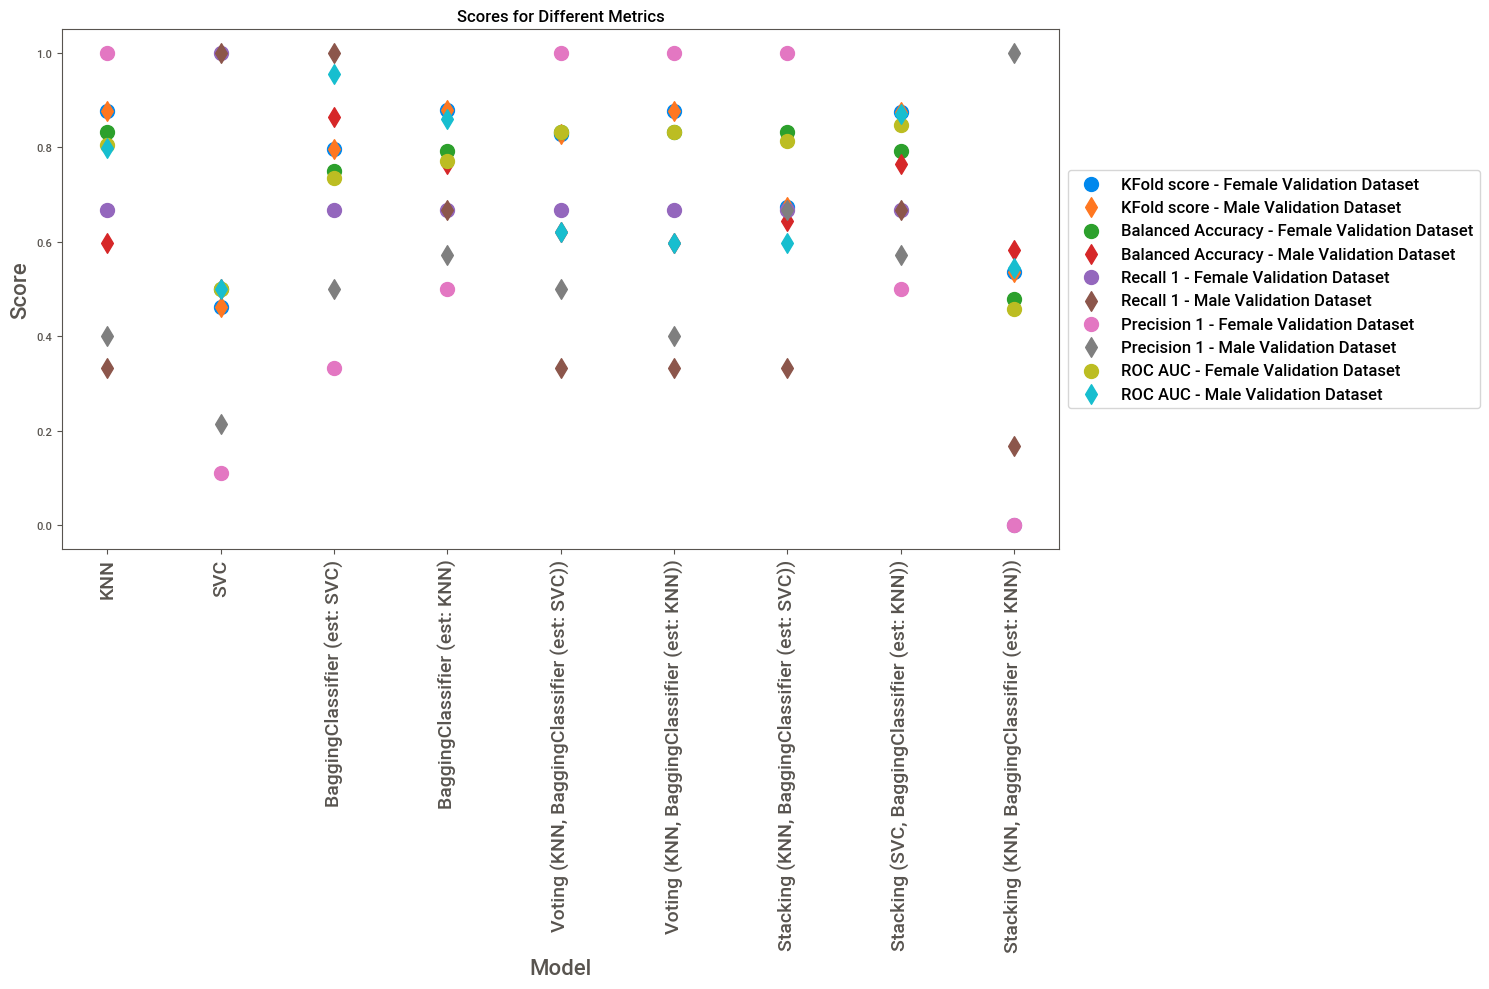

In [ ]:
import matplotlib.pyplot as plt

# Define the scores obtained from each metric
scores = {
    'KFold score': SUM_KFOLD,
    'Balanced Accuracy': SUM_BALANCED_ACCURACY,
    # 'F1 score 0, 1': SUM_F1_0_1,
    'Recall 1': SUM_RECALL_1,
    'Precision 1': SUM_PRECISION_1,
    'ROC AUC': SUM_ROC_AUC
}

# Define point styles for the datasets
point_styles = ['o', 'd']  # Circle for female, square for male
point_sizes = [100, 100]  # Adjustable point sizes for each style

# Create a scatter plot for each metric
plt.figure(figsize=(15, 10))
for metric, data in scores.items():
    for i, dataset in enumerate(['Female Validation Dataset', 'Male Validation Dataset']):
        plt.scatter(range(len(data)), data[dataset], label=f'{metric} - {dataset}', marker=point_styles[i], s=point_sizes[i])

plt.xlabel('Model', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.title('Scores for Different Metrics')
plt.xticks(range(len(data)), data.index, rotation=90, fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
plt.tight_layout()
plt.show()


### Feature importance

#### Permutation feature importance

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

df = Imp_X_train
models = [knn,
          # svc, bag, bag_knn,
          voting, voting_, stacking, stacking_, stacking__]
X_val = [Imp_X_F_val, Imp_X_M_val]
y_val = [y_F_val, y_M_val]

# Collect the feature names
feature_names = df.columns

for model in models:
    print(f"Model: {type(model).__name__}")
    for i, (X, y) in enumerate(zip(X_val, y_val)):
        print(f"Dataset {i+1}:")
        # Calculate the permutation importance
        result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
        # Sort features by their importance score
        sorted_indices = np.argsort(np.abs(result.importances_mean))[::-1]  # Sort in descending order of absolute importance
        # Print the sorted feature importance scores with actual names
        print("Sorted feature importance scores:")
        for idx in sorted_indices:
            print(f"    Feature '{feature_names[idx]}': {result.importances_mean[idx]}")
    print()


Model: KNeighborsClassifier
Dataset 1:
Sorted feature importance scores:
    Feature 'V24_mullen_cognitive_t_score_sum': 0.12592592592592589
    Feature 'V24_mullen_expressive_language_t': 0.09629629629629625
    Feature 'V24_mullen_gross_motor_t': 0.08148148148148146
    Feature 'V24_mullen_receptive_language_t': 0.08148148148148145
    Feature 'V24_mullen_composite_standard_score': 0.07777777777777775
    Feature 'V24_mullen_fine_motor_t': 0.07037037037037033
    Feature 'V24_mullen_visual_reception_t': 0.037037037037037
    Feature 'V24_Group': 0.0
    Feature 'Risk_dummy': 0.0
    Feature 'Gender_dummy': 0.0
Dataset 2:
Sorted feature importance scores:
    Feature 'V24_mullen_composite_standard_score': -0.09642857142857142
    Feature 'V24_mullen_cognitive_t_score_sum': 0.07499999999999998
    Feature 'V24_mullen_receptive_language_t': 0.06428571428571428
    Feature 'V24_mullen_expressive_language_t': -0.04999999999999999
    Feature 'V24_mullen_visual_reception_t': 0.035714285714